In [752]:
import joblib  # To save the trained model, use ltr
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
# from sklearn import metrics
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler


#Import Classification Models
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, IsolationForest
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB #Use for testing for now
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from xgboost import XGBClassifier


#Import ARIMA model for trend analysis
from statsmodels.tsa.arima.model import ARIMA
from pmdarima import auto_arima
import matplotlib.dates as mdates

#Import Clustering Models
from sklearn.cluster import KMeans, DBSCAN
from sklearn.decomposition import PCA

#Import Evaluation Metrics
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, f1_score, roc_curve, auc, precision_score, recall_score, roc_auc_score, precision_recall_curve, average_precision_score

#Import Preprocessing
from imblearn.pipeline import Pipeline
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.combine import SMOTETomek, SMOTEENN

#Import Permutation/Feature importance
from sklearn.inspection import permutation_importance

import random



In [753]:
loanFraud_dataset = pd.read_csv('account_data.csv')
creditcard_dataset = pd.read_csv('BankChurners.csv')

In [754]:
loanFraud_dataset.head(5)

Age          Occupation MaritalStatus  Dependents  ResidentialStatus  \
0   56             Teacher      Divorced           4                Own   
1   40            Engineer        Single           0               Rent   
2   25               Clerk       Married           0  Live with Parents   
3   34          Unemployed        Single           0               Rent   
4   47  Software Developer        Single           0               Rent   

   AddressDuration  CreditScore  IncomeLevel  LoanAmountRequested  LoanTerm  \
0                1          827        52033               300000        25   
1                1          830        42893                 8105         3   
2              360          809       141233                75734        19   
3               92          630         9217                 2000         1   
4               26          733        47979                67767         1   

   ... AccountActivity PaymentBehavior  Blacklists  EmploymentVerification  \
0  ...          Normal         On-time          No                Verified   
1  ...          Normal         On-time          No                Verified   
2  ...          Normal         On-time         Yes                Verified   
3  ...         Unusual       Defaulted          No            Not Verified   
4  ...          Normal         On-time          No                Verified   

   PastFinancialMalpractices DeviceInformation SocialMediaFootprint  \
0                         No            Tablet                  Yes   
1                         No            Laptop                   No   
2                         No            Laptop                   No   
3                        Yes            Mobile                   No   
4                         No            Laptop                   No   

  ConsistencyinData  Referral IsFraud  
0        Consistent  Referral      No  
1        Consistent    Online      No  
2        Consistent  Referral      No  
3      Inconsistent    Online     Yes  
4        Consistent    Online      No  

[5 rows x 29 columns]

In [755]:
creditcard_dataset.head(5)

CLIENTNUM     Attrition_Flag  Customer_Age Gender  Dependent_count  \
0  768805383  Existing Customer            45      M                3   
1  818770008  Existing Customer            49      F                5   
2  713982108  Existing Customer            51      M                3   
3  769911858  Existing Customer            40      F                4   
4  709106358  Existing Customer            40      M                3   

  Education_Level Marital_Status Income_Category Card_Category  \
0     High School        Married     $60K - $80K          Blue   
1        Graduate         Single  Less than $40K          Blue   
2        Graduate        Married    $80K - $120K          Blue   
3     High School        Unknown  Less than $40K          Blue   
4      Uneducated        Married     $60K - $80K          Blue   

   Months_on_book  ...  Credit_Limit  Total_Revolving_Bal  Avg_Open_To_Buy  \
0              39  ...       12691.0                  777          11914.0   
1              44  ...        8256.0                  864           7392.0   
2              36  ...        3418.0                    0           3418.0   
3              34  ...        3313.0                 2517            796.0   
4              21  ...        4716.0                    0           4716.0   

   Total_Amt_Chng_Q4_Q1  Total_Trans_Amt  Total_Trans_Ct  Total_Ct_Chng_Q4_Q1  \
0                 1.335             1144              42                1.625   
1                 1.541             1291              33                3.714   
2                 2.594             1887              20                2.333   
3                 1.405             1171              20                2.333   
4                 2.175              816              28                2.500   

   Avg_Utilization_Ratio  \
0                  0.061   
1                  0.105   
2                  0.000   
3                  0.760   
4                  0.000   

   Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1  \
0                                           0.000093                                                                                    
1                                           0.000057                                                                                    
2                                           0.000021                                                                                    
3                                           0.000134                                                                                    
4                                           0.000022                                                                                    

   Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2  
0                                            0.99991                                                                                   
1                                            0.99994                                                                                   
2                                            0.99998                                                                                   
3                                            0.99987                                                                                   
4                                            0.99998                                                                                   

[5 rows x 23 columns]

In [756]:
loanFraud_dataset = loanFraud_dataset.dropna()


In [757]:
loanFraud_dataset.isnull().sum()

Age                          0
Occupation                   0
MaritalStatus                0
Dependents                   0
ResidentialStatus            0
AddressDuration              0
CreditScore                  0
IncomeLevel                  0
LoanAmountRequested          0
LoanTerm                     0
PurposeoftheLoan             0
Collateral                   0
InterestRate                 0
PreviousLoans                0
ExistingLiabilities          0
ApplicationBehavior          0
LocationofApplication        0
ChangeinBehavior             0
TimeofTransaction            0
AccountActivity              0
PaymentBehavior              0
Blacklists                   0
EmploymentVerification       0
PastFinancialMalpractices    0
DeviceInformation            0
SocialMediaFootprint         0
ConsistencyinData            0
Referral                     0
IsFraud                      0
dtype: int64

In [758]:
loanFraud_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 29 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Age                        10000 non-null  int64  
 1   Occupation                 10000 non-null  object 
 2   MaritalStatus              10000 non-null  object 
 3   Dependents                 10000 non-null  int64  
 4   ResidentialStatus          10000 non-null  object 
 5   AddressDuration            10000 non-null  int64  
 6   CreditScore                10000 non-null  int64  
 7   IncomeLevel                10000 non-null  int64  
 8   LoanAmountRequested        10000 non-null  int64  
 9   LoanTerm                   10000 non-null  int64  
 10  PurposeoftheLoan           10000 non-null  object 
 11  Collateral                 10000 non-null  object 
 12  InterestRate               10000 non-null  float64
 13  PreviousLoans              10000 non-null  int6

<h1>Data Visualisation for Loan Fraud</h1>

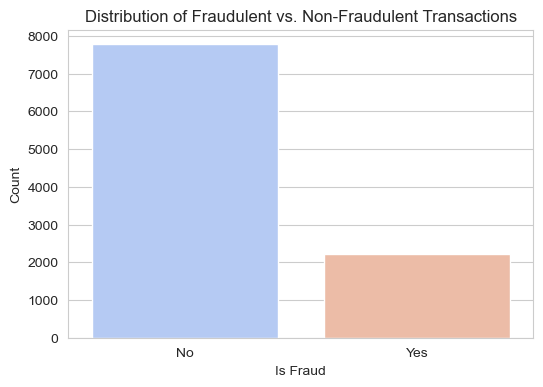

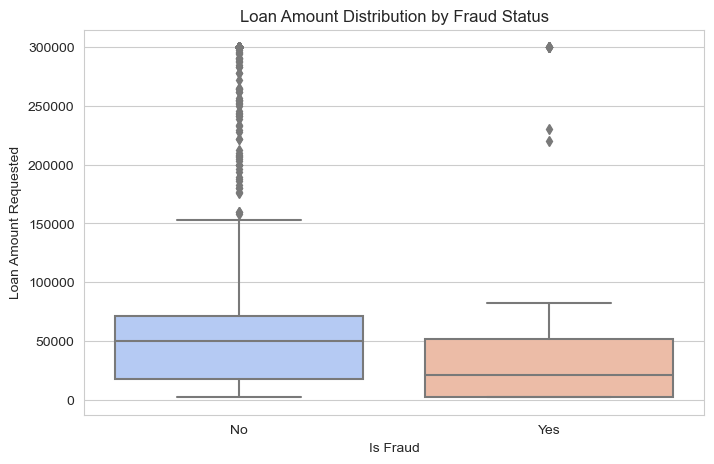

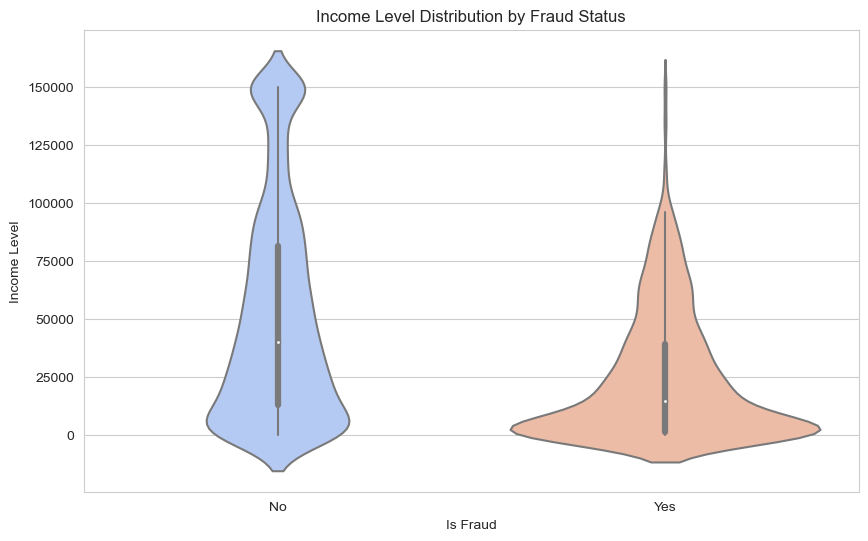

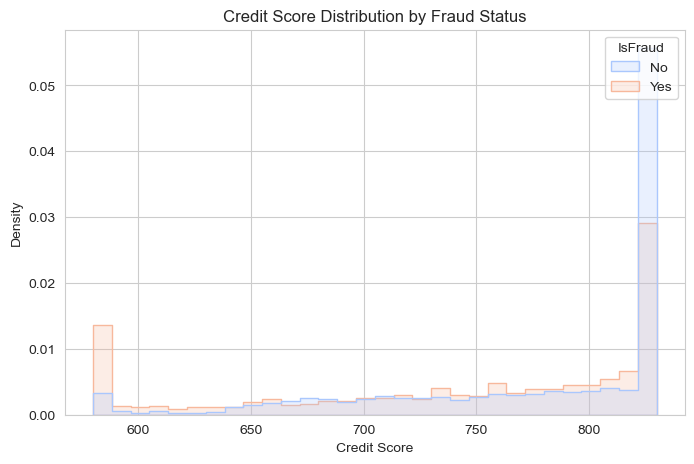

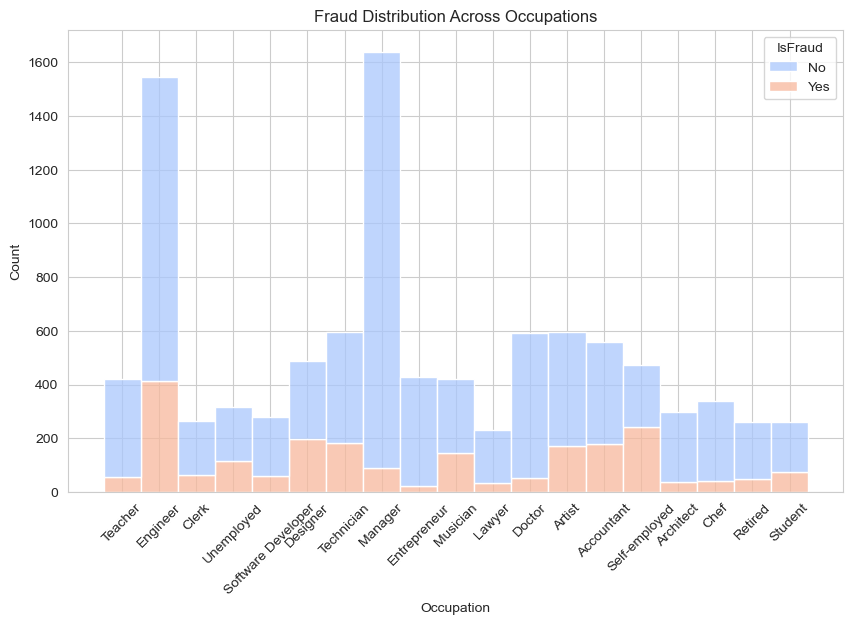

In [759]:
sns.set_style("whitegrid")

# fraud vs non-fraud
plt.figure(figsize=(6, 4))
sns.countplot(data=loanFraud_dataset, x='IsFraud', palette='coolwarm')
plt.title("Distribution of Fraudulent vs. Non-Fraudulent Transactions")
plt.xlabel("Is Fraud")
plt.ylabel("Count")
plt.show()

# loan amount distribution by fraud
plt.figure(figsize=(8, 5))
sns.boxplot(data=loanFraud_dataset, x='IsFraud', y='LoanAmountRequested', palette='coolwarm')
plt.title("Loan Amount Distribution by Fraud Status")
plt.xlabel("Is Fraud")
plt.ylabel("Loan Amount Requested")
plt.show()

# income vs fraud status
plt.figure(figsize=(10, 6))
sns.violinplot(data=loanFraud_dataset, x='IsFraud', y='IncomeLevel', palette='coolwarm')
plt.title("Income Level Distribution by Fraud Status")
plt.xlabel("Is Fraud")
plt.ylabel("Income Level")
plt.show()

# credit score vs fraud status
plt.figure(figsize=(8, 5))
sns.histplot(data=loanFraud_dataset, x='CreditScore', hue='IsFraud', element='step', stat='density', common_norm=False, palette='coolwarm', bins=30)
plt.title("Credit Score Distribution by Fraud Status")
plt.xlabel("Credit Score")
plt.ylabel("Density")
plt.show()

plt.figure(figsize=(10, 6))
sns.histplot(data=loanFraud_dataset, x='Occupation', hue='IsFraud', multiple="stack", palette="coolwarm")
plt.xticks(rotation=45)
plt.title("Fraud Distribution Across Occupations")
plt.show()


array([[<Axes: title={'center': 'Age'}>,
        <Axes: title={'center': 'Dependents'}>,
        <Axes: title={'center': 'AddressDuration'}>],
       [<Axes: title={'center': 'CreditScore'}>,
        <Axes: title={'center': 'IncomeLevel'}>,
        <Axes: title={'center': 'LoanAmountRequested'}>],
       [<Axes: title={'center': 'LoanTerm'}>,
        <Axes: title={'center': 'InterestRate'}>,
        <Axes: title={'center': 'PreviousLoans'}>],
       [<Axes: title={'center': 'ExistingLiabilities'}>, <Axes: >,
        <Axes: >]], dtype=object)

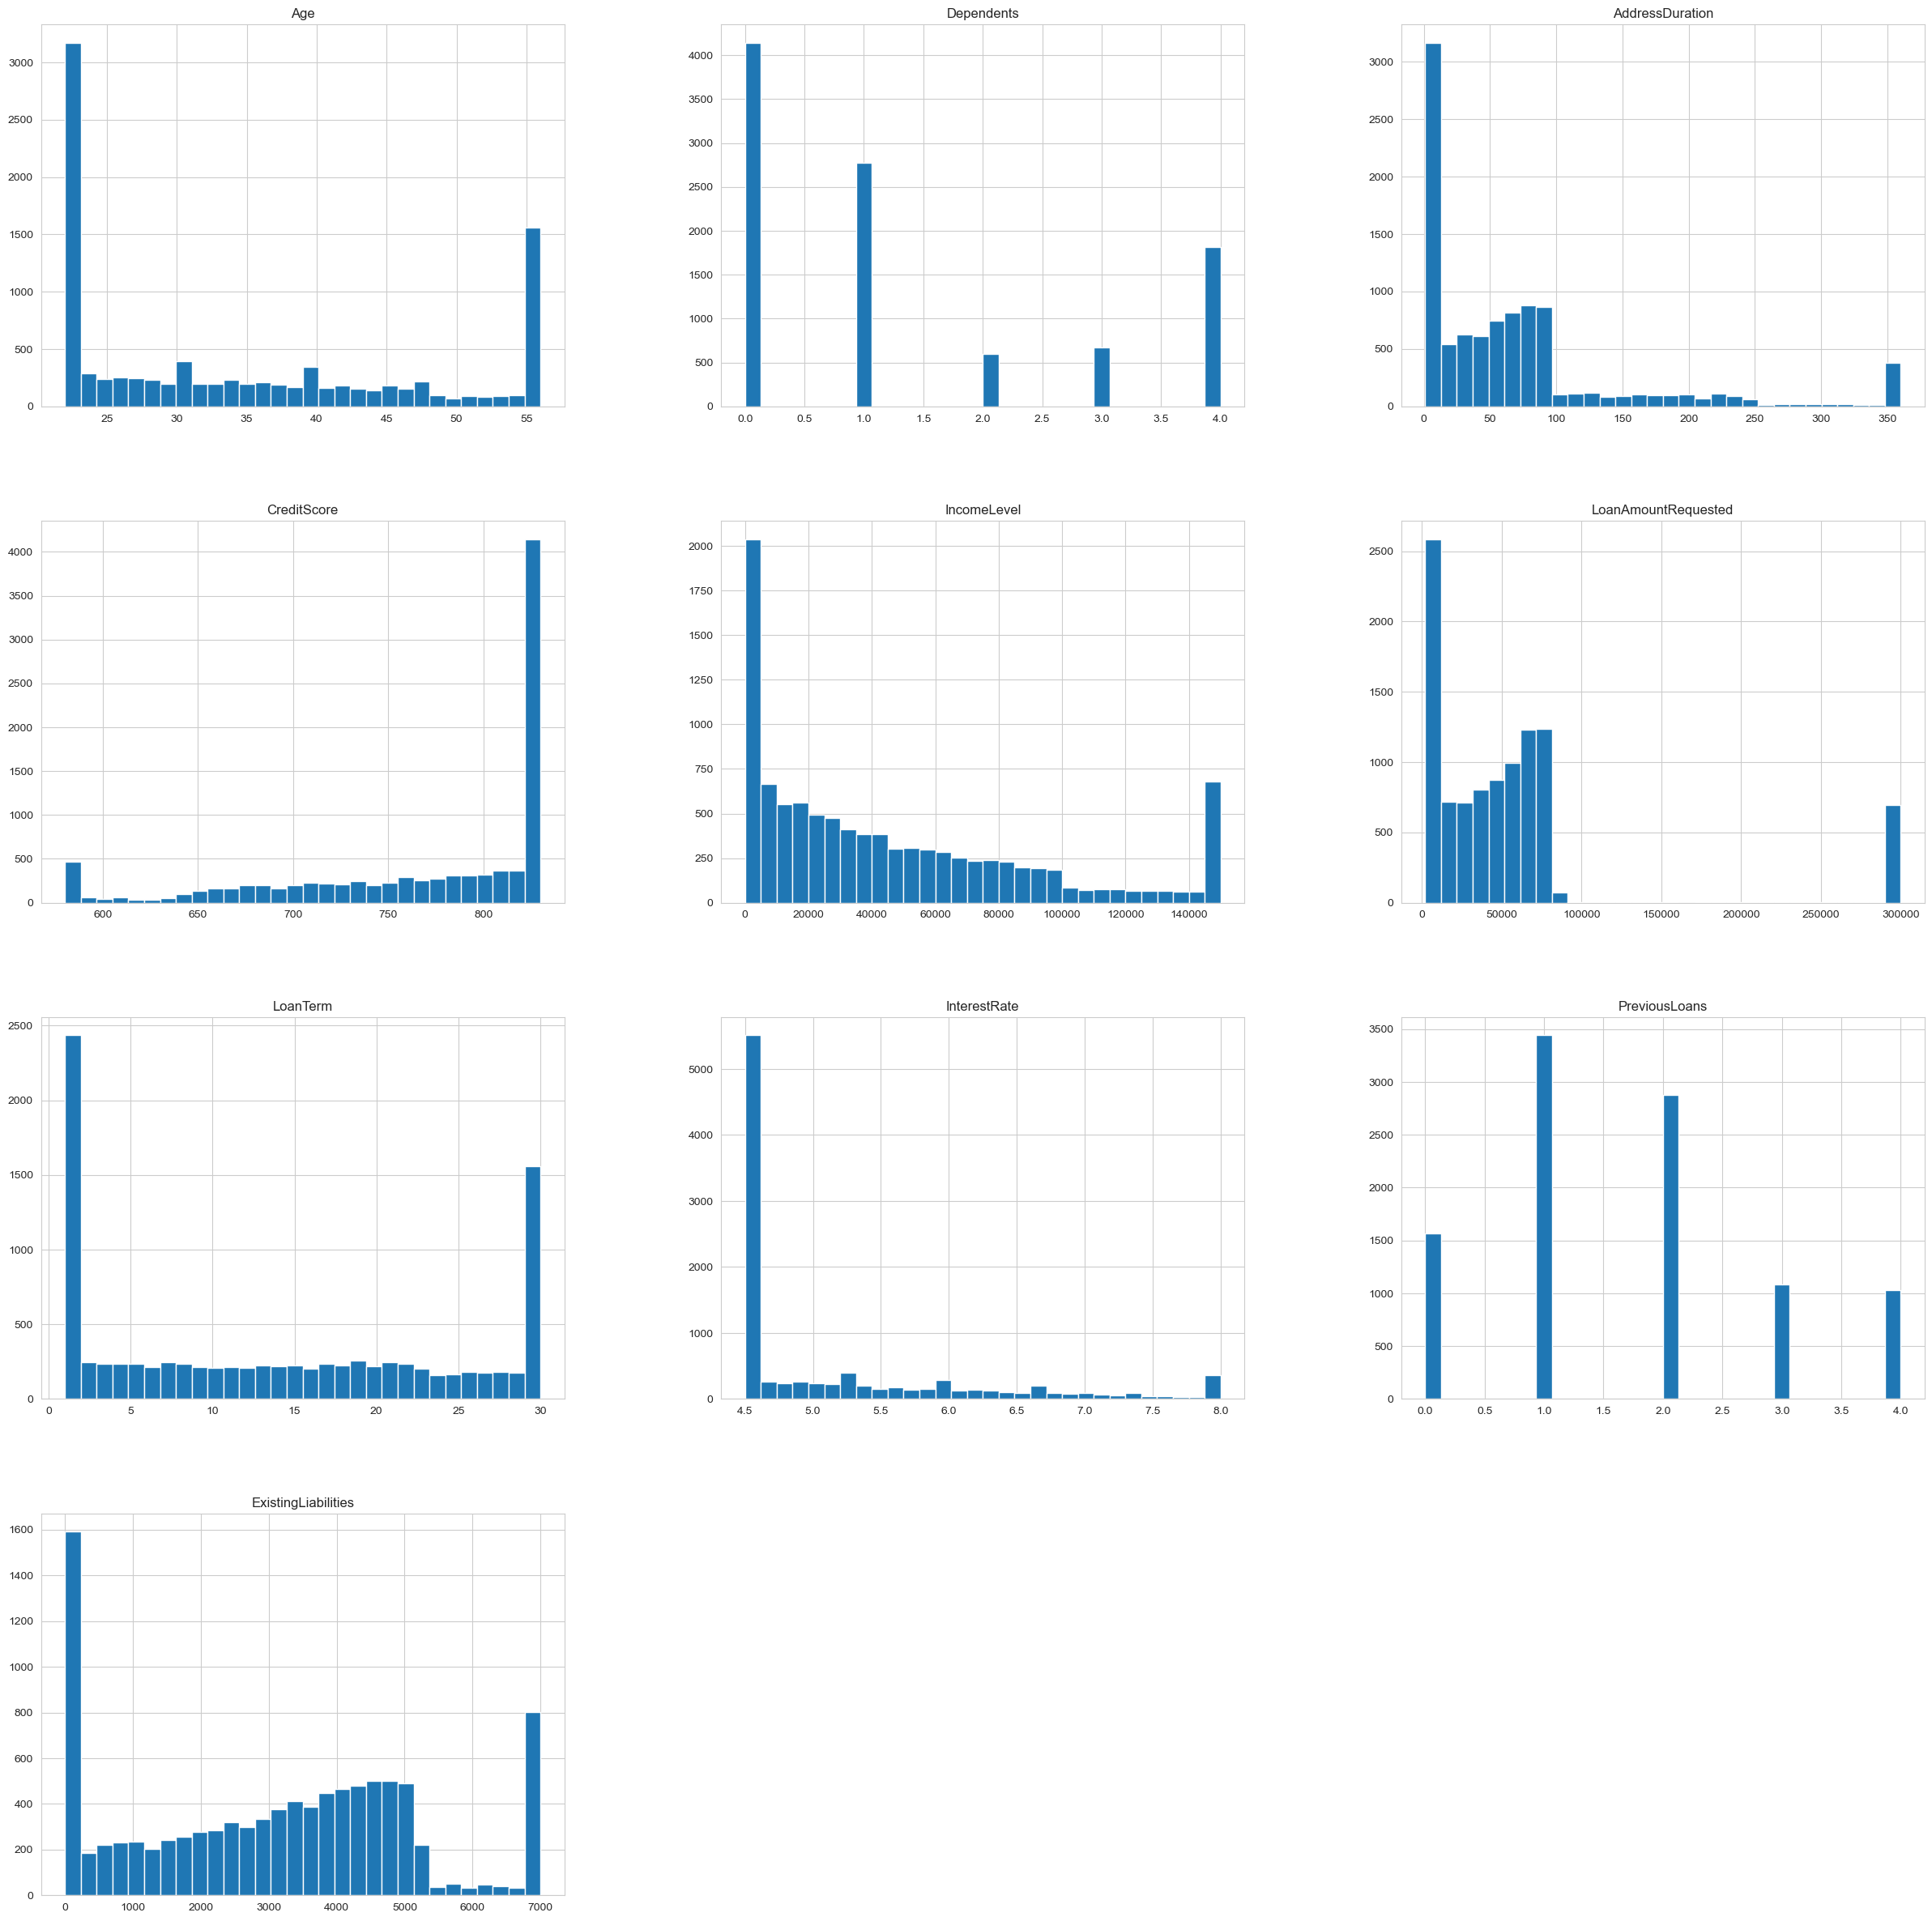

In [760]:
loanFraud_dataset.hist(bins=30, figsize=(30, 30))

<h1>Data Transformation for Loan Fraud</h1>

In [761]:
#Data Transformation for the account dataset

categorical_columns = loanFraud_dataset.select_dtypes(include=['object']).columns
exclude_column = 'TimeofTransaction'
categorical_columns = categorical_columns[categorical_columns != exclude_column]

#Transform the categorical columns into numerical values
label_encoders = {}
for column in categorical_columns:
    label_encoder = LabelEncoder()
    loanFraud_dataset[column] = label_encoder.fit_transform(loanFraud_dataset[column])
    label_encoders[column] = label_encoder

#Put values in a dictionary to compare and see what is the transformed value and original value
for column, encoder in label_encoders.items():
    print(f"\nMappings for {column}:")
    for original_value, encoded_value in zip(encoder.classes_, range(len(encoder.classes_))):
        print(f"{original_value} -> {encoded_value}")


Mappings for Occupation:
Accountant -> 0
Architect -> 1
Artist -> 2
Chef -> 3
Clerk -> 4
Designer -> 5
Doctor -> 6
Engineer -> 7
Entrepreneur -> 8
Lawyer -> 9
Manager -> 10
Musician -> 11
Retired -> 12
Self-employed -> 13
Software Developer -> 14
Student -> 15
Teacher -> 16
Technician -> 17
Unemployed -> 18

Mappings for MaritalStatus:
Divorced -> 0
Married -> 1
Single -> 2

Mappings for ResidentialStatus:
Live with Parents -> 0
Own -> 1
Rent -> 2

Mappings for PurposeoftheLoan:
auto -> 0
education -> 1
home -> 2
medical -> 3
personal -> 4
travel -> 5

Mappings for Collateral:
No -> 0
Yes -> 1

Mappings for ApplicationBehavior:
Normal -> 0
Rapid -> 1

Mappings for LocationofApplication:
Local -> 0
Unusual -> 1

Mappings for ChangeinBehavior:
No -> 0
Yes -> 1

Mappings for AccountActivity:
Normal -> 0
Unusual -> 1

Mappings for PaymentBehavior:
Defaulted -> 0
Late -> 1
On-time -> 2

Mappings for Blacklists:
No -> 0
Yes -> 1

Mappings for EmploymentVerification:
Not Verified -> 0
Verifi

<h5>One hot encoding code</h5>

In [762]:
# # Select categorical columns excluding 'TimeofTransaction' --> Too much fields to consider
# categorical_columns = loanFraud_dataset.select_dtypes(include=['object']).columns
# exclude_column = 'TimeofTransaction'
# categorical_columns = categorical_columns[categorical_columns != exclude_column]

# # Transform categorical columns
# one_hot_encoders = {}
# encoded_dfs = []

# for column in categorical_columns:
#     one_hot_encoder = OneHotEncoder(sparse=False, dtype=int)
#     transformed = one_hot_encoder.fit_transform(loanFraud_dataset[[column]])
    
#     # Store the encoder
#     one_hot_encoders[column] = one_hot_encoder
    
#     # Create a DataFrame for the encoded values
#     encoded_df = pd.DataFrame(
#         transformed,
#         columns=[f"{column}_{category}" for category in one_hot_encoder.categories_[0]]
#     )
#     encoded_dfs.append(encoded_df)

# # Combine the original dataset with the encoded columns
# loanFraud_dataset = pd.concat([loanFraud_dataset.drop(columns=categorical_columns), *encoded_dfs], axis=1)

# # Display mappings
# for column, encoder in one_hot_encoders.items():
#     print(f"\nMappings for {column}:")
#     for original_value, encoded_value in zip(encoder.categories_[0], range(len(encoder.categories_[0]))):
#         print(f"{original_value} -> One-hot encoded as {encoded_value}")

In [763]:
#Inspect individual column's value transformation (This is to print the transformed value and original value)

# specified_column = 'Cooking_With'

# if specified_column in label_encoders:
#     print(f"Mappings for {specified_column}:")
#     encoder = label_encoders[specified_column]
#     for original_value, encoded_value in zip(encoder.classes_, range(len(encoder.classes_))):
#         print(f"{original_value} -> {encoded_value}")
# else:
#     print(f"The column '{specified_column}' was not found or is not a categorical column.")

<h1>Fraud Trend Forecasting Loan Fraud</h1>

In [764]:
loanFraud_dataset['TimeofTransaction'] = pd.to_datetime(loanFraud_dataset['TimeofTransaction'])
loanFraud_dataset.set_index('TimeofTransaction', inplace=True)  # Set as index for time series analysis


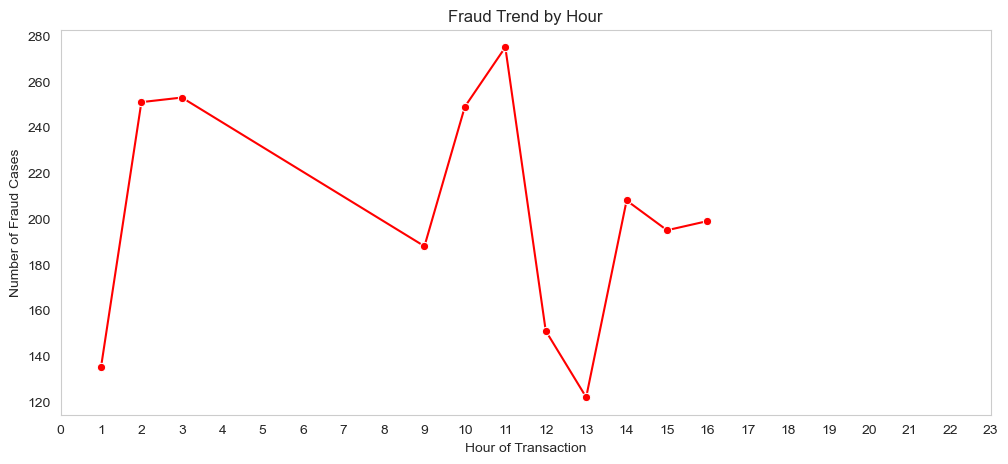

In [765]:
# Extract transaction hour
loanFraud_dataset['TransactionHour'] = loanFraud_dataset.index.hour  

# Count fraud cases per hour
fraud_by_hour = loanFraud_dataset.groupby('TransactionHour')['IsFraud'].sum()

# Plot fraud trend by hour
plt.figure(figsize=(12,5))
sns.lineplot(x=fraud_by_hour.index, y=fraud_by_hour.values, marker='o', color='red')
plt.xlabel("Hour of Transaction")
plt.ylabel("Number of Fraud Cases")
plt.title("Fraud Trend by Hour")
plt.xticks(range(0, 24))
plt.grid()
plt.show()

#Dataset only consist of records from a timing of 1am to 4pm

In [766]:
from itertools import cycle

# Define date range
start_date = '2024-12-01'
end_date = '2025-03-02'  # Adjust as needed

# Calculate how many unique days we need
num_days = (pd.to_datetime(end_date) - pd.to_datetime(start_date)).days + 1

# Create an evenly distributed list of dates
# This will cycle through the date range if there are more records than days
all_dates = pd.date_range(start=start_date, periods=num_days).tolist()
date_cycle = cycle(all_dates)

# Assign a date to each row
loanFraud_dataset['BaseDate'] = [next(date_cycle) for _ in range(len(loanFraud_dataset))]

# Add the hour component
loanFraud_dataset['DummyDate'] = loanFraud_dataset['BaseDate'] + pd.to_timedelta(loanFraud_dataset['TransactionHour'], unit='h')

# Set DummyDate as index
loanFraud_dataset.set_index('DummyDate', inplace=True)

# Remove BaseDate column (since it's now redundant)
loanFraud_dataset.drop('BaseDate', axis=1, inplace=True)

# Display the first 5 rows
loanFraud_dataset.head(5)

loanFraud_dataset.head(5)

Age  Occupation  MaritalStatus  Dependents  \
DummyDate                                                         
2024-12-01 10:00:00   56          16              0           4   
2024-12-02 16:00:00   40           7              2           0   
2024-12-03 03:00:00   25           4              1           0   
2024-12-04 16:00:00   34          18              2           0   
2024-12-05 12:00:00   47          14              2           0   

                     ResidentialStatus  AddressDuration  CreditScore  \
DummyDate                                                              
2024-12-01 10:00:00                  1                1          827   
2024-12-02 16:00:00                  2                1          830   
2024-12-03 03:00:00                  0              360          809   
2024-12-04 16:00:00                  2               92          630   
2024-12-05 12:00:00                  2               26          733   

                     IncomeLevel  LoanAmountRequested  LoanTerm  ...  \
DummyDate                                                        ...   
2024-12-01 10:00:00        52033               300000        25  ...   
2024-12-02 16:00:00        42893                 8105         3  ...   
2024-12-03 03:00:00       141233                75734        19  ...   
2024-12-04 16:00:00         9217                 2000         1  ...   
2024-12-05 12:00:00        47979                67767         1  ...   

                     PaymentBehavior  Blacklists  EmploymentVerification  \
DummyDate                                                                  
2024-12-01 10:00:00                2           0                       1   
2024-12-02 16:00:00                2           0                       1   
2024-12-03 03:00:00                2           1                       1   
2024-12-04 16:00:00                0           0                       0   
2024-12-05 12:00:00                2           0                       1   

                     PastFinancialMalpractices  DeviceInformation  \
DummyDate                                                           
2024-12-01 10:00:00                          0                  3   
2024-12-02 16:00:00                          0                  1   
2024-12-03 03:00:00                          0                  1   
2024-12-04 16:00:00                          1                  2   
2024-12-05 12:00:00                          0                  1   

                     SocialMediaFootprint  ConsistencyinData  Referral  \
DummyDate                                                                
2024-12-01 10:00:00                     1                  0         1   
2024-12-02 16:00:00                     0                  0         0   
2024-12-03 03:00:00                     0                  0         1   
2024-12-04 16:00:00                     0                  1         0   
2024-12-05 12:00:00                     0                  0         0   

                     IsFraud  TransactionHour  
DummyDate                                      
2024-12-01 10:00:00        0               10  
2024-12-02 16:00:00        0               16  
2024-12-03 03:00:00        0                3  
2024-12-04 16:00:00        1               16  
2024-12-05 12:00:00        0               12  

[5 rows x 29 columns]

In [767]:
# Aggregate fraud cases per hour
fraud_trend = loanFraud_dataset.resample('D')['IsFraud'].sum()

auto_arima_model = auto_arima(fraud_trend, seasonal=False, trace=True)
print(auto_arima_model.summary())

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0]             : AIC=inf, Time=0.14 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=852.613, Time=0.01 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=613.479, Time=0.01 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=767.174, Time=0.03 sec
 ARIMA(2,0,0)(0,0,0)[0]             : AIC=inf, Time=0.02 sec
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=inf, Time=0.09 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=inf, Time=0.10 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=548.010, Time=0.01 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=546.056, Time=0.00 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=548.016, Time=0.02 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=550.036, Time=0.02 sec

Best model:  ARIMA(0,0,0)(0,0,0)[0] intercept
Total fit time: 0.454 seconds
                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                   92
Model:                 

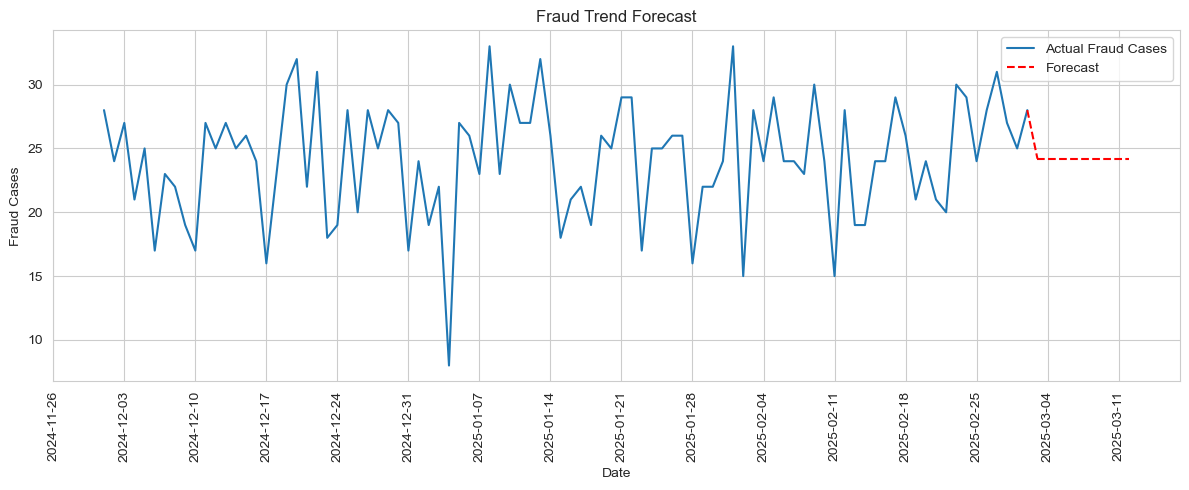

In [768]:
# Fit ARIMA Model
model = ARIMA(fraud_trend, order=(0,0,0))  # (p,d,q) values need tuning
model_fit = model.fit()

# Predict next 7 days
forecast = model_fit.forecast(steps=10)



# Plot the results
plt.figure(figsize=(12,5))
plt.plot(fraud_trend, label="Actual Fraud Cases")

# Create forecast dates starting from the day AFTER the last data point
forecast_dates = pd.date_range(start=fraud_trend.index[-1] + pd.Timedelta(days=1), periods=10, freq='D')

# Plot forecast with the correct date range
plt.plot(forecast_dates, forecast, label="Forecast", linestyle="dashed", color="red")

# Connect the last actual point to the first forecast point
plt.plot([fraud_trend.index[-1], forecast_dates[0]], 
         [fraud_trend.iloc[-1], forecast[0]], 
         linestyle="dashed", color="red")


plt.gca().xaxis.set_major_locator(mdates.WeekdayLocator(interval=1))
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
plt.xticks(rotation=90)
plt.xlabel("Date")
plt.ylabel("Fraud Cases")
plt.title("Fraud Trend Forecast")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()



In [769]:
loanFraud_dataset.head()

Age  Occupation  MaritalStatus  Dependents  \
DummyDate                                                         
2024-12-01 10:00:00   56          16              0           4   
2024-12-02 16:00:00   40           7              2           0   
2024-12-03 03:00:00   25           4              1           0   
2024-12-04 16:00:00   34          18              2           0   
2024-12-05 12:00:00   47          14              2           0   

                     ResidentialStatus  AddressDuration  CreditScore  \
DummyDate                                                              
2024-12-01 10:00:00                  1                1          827   
2024-12-02 16:00:00                  2                1          830   
2024-12-03 03:00:00                  0              360          809   
2024-12-04 16:00:00                  2               92          630   
2024-12-05 12:00:00                  2               26          733   

                     IncomeLevel  LoanAmountRequested  LoanTerm  ...  \
DummyDate                                                        ...   
2024-12-01 10:00:00        52033               300000        25  ...   
2024-12-02 16:00:00        42893                 8105         3  ...   
2024-12-03 03:00:00       141233                75734        19  ...   
2024-12-04 16:00:00         9217                 2000         1  ...   
2024-12-05 12:00:00        47979                67767         1  ...   

                     PaymentBehavior  Blacklists  EmploymentVerification  \
DummyDate                                                                  
2024-12-01 10:00:00                2           0                       1   
2024-12-02 16:00:00                2           0                       1   
2024-12-03 03:00:00                2           1                       1   
2024-12-04 16:00:00                0           0                       0   
2024-12-05 12:00:00                2           0                       1   

                     PastFinancialMalpractices  DeviceInformation  \
DummyDate                                                           
2024-12-01 10:00:00                          0                  3   
2024-12-02 16:00:00                          0                  1   
2024-12-03 03:00:00                          0                  1   
2024-12-04 16:00:00                          1                  2   
2024-12-05 12:00:00                          0                  1   

                     SocialMediaFootprint  ConsistencyinData  Referral  \
DummyDate                                                                
2024-12-01 10:00:00                     1                  0         1   
2024-12-02 16:00:00                     0                  0         0   
2024-12-03 03:00:00                     0                  0         1   
2024-12-04 16:00:00                     0                  1         0   
2024-12-05 12:00:00                     0                  0         0   

                     IsFraud  TransactionHour  
DummyDate                                      
2024-12-01 10:00:00        0               10  
2024-12-02 16:00:00        0               16  
2024-12-03 03:00:00        0                3  
2024-12-04 16:00:00        1               16  
2024-12-05 12:00:00        0               12  

[5 rows x 29 columns]

In [770]:
loanFraud_dataset.columns

Index(['Age', 'Occupation', 'MaritalStatus', 'Dependents', 'ResidentialStatus',
       'AddressDuration', 'CreditScore', 'IncomeLevel', 'LoanAmountRequested',
       'LoanTerm', 'PurposeoftheLoan', 'Collateral', 'InterestRate',
       'PreviousLoans', 'ExistingLiabilities', 'ApplicationBehavior',
       'LocationofApplication', 'ChangeinBehavior', 'AccountActivity',
       'PaymentBehavior', 'Blacklists', 'EmploymentVerification',
       'PastFinancialMalpractices', 'DeviceInformation',
       'SocialMediaFootprint', 'ConsistencyinData', 'Referral', 'IsFraud',
       'TransactionHour'],
      dtype='object')

In [771]:
#Binning time into time category

# # Convert the 'TimeofTransaction' column values to integers --> KIV this
# loanFraud_dataset.replace({'TimeofTransaction': {'Morning': 0, 'Afternoon': 1, 'Evening': 2, 'Night': 3}}, inplace=True)
# loanFraud_dataset['TimeofTransaction'] = loanFraud_dataset['TimeofTransaction'].astype(int)

# loanFraud_dataset.info()
loanFraud_dataset['TransactionHour'] = loanFraud_dataset['TransactionHour'].astype(str) + ':00'
loanFraud_dataset['TransactionHour'] = pd.to_datetime(loanFraud_dataset['TransactionHour'], format='%H:%M')

# Define a function to categorize the time
def categorize_time(hour):
    if 5 <= hour < 12:  # Morning
        return 1
    elif 12 <= hour < 18:  # Afternoon
        return 2
    elif 18 <= hour < 22:  # Evening
        return 3
    else:  # Night
        return 4

# Apply the function to categorize times
loanFraud_dataset['TimeCategory'] = loanFraud_dataset['TransactionHour'].dt.hour.apply(categorize_time)
loanFraud_dataset.drop(['TransactionHour'], axis=1, inplace=True)
loanFraud_dataset.head()


Age  Occupation  MaritalStatus  Dependents  \
DummyDate                                                         
2024-12-01 10:00:00   56          16              0           4   
2024-12-02 16:00:00   40           7              2           0   
2024-12-03 03:00:00   25           4              1           0   
2024-12-04 16:00:00   34          18              2           0   
2024-12-05 12:00:00   47          14              2           0   

                     ResidentialStatus  AddressDuration  CreditScore  \
DummyDate                                                              
2024-12-01 10:00:00                  1                1          827   
2024-12-02 16:00:00                  2                1          830   
2024-12-03 03:00:00                  0              360          809   
2024-12-04 16:00:00                  2               92          630   
2024-12-05 12:00:00                  2               26          733   

                     IncomeLevel  LoanAmountRequested  LoanTerm  ...  \
DummyDate                                                        ...   
2024-12-01 10:00:00        52033               300000        25  ...   
2024-12-02 16:00:00        42893                 8105         3  ...   
2024-12-03 03:00:00       141233                75734        19  ...   
2024-12-04 16:00:00         9217                 2000         1  ...   
2024-12-05 12:00:00        47979                67767         1  ...   

                     PaymentBehavior  Blacklists  EmploymentVerification  \
DummyDate                                                                  
2024-12-01 10:00:00                2           0                       1   
2024-12-02 16:00:00                2           0                       1   
2024-12-03 03:00:00                2           1                       1   
2024-12-04 16:00:00                0           0                       0   
2024-12-05 12:00:00                2           0                       1   

                     PastFinancialMalpractices  DeviceInformation  \
DummyDate                                                           
2024-12-01 10:00:00                          0                  3   
2024-12-02 16:00:00                          0                  1   
2024-12-03 03:00:00                          0                  1   
2024-12-04 16:00:00                          1                  2   
2024-12-05 12:00:00                          0                  1   

                     SocialMediaFootprint  ConsistencyinData  Referral  \
DummyDate                                                                
2024-12-01 10:00:00                     1                  0         1   
2024-12-02 16:00:00                     0                  0         0   
2024-12-03 03:00:00                     0                  0         1   
2024-12-04 16:00:00                     0                  1         0   
2024-12-05 12:00:00                     0                  0         0   

                     IsFraud  TimeCategory  
DummyDate                                   
2024-12-01 10:00:00        0             1  
2024-12-02 16:00:00        0             2  
2024-12-03 03:00:00        0             4  
2024-12-04 16:00:00        1             2  
2024-12-05 12:00:00        0             2  

[5 rows x 29 columns]

In [772]:
loanFraud_dataset.describe()

Age    Occupation  MaritalStatus    Dependents  \
count  10000.000000  10000.000000   10000.000000  10000.000000   
mean      34.837900      8.652700       1.309400      1.323400   
std       12.631048      4.948225       0.839727      1.506399   
min       22.000000      0.000000       0.000000      0.000000   
25%       22.000000      5.000000       1.000000      0.000000   
50%       31.000000      8.000000       2.000000      1.000000   
75%       45.000000     12.000000       2.000000      2.000000   
max       56.000000     18.000000       2.000000      4.000000   

       ResidentialStatus  AddressDuration   CreditScore    IncomeLevel  \
count       10000.000000     10000.000000  10000.000000   10000.000000   
mean            1.411300        69.087400    768.701300   45994.615600   
std             0.570232        84.854114     74.280933   44648.184654   
min             0.000000         1.000000    580.000000       0.000000   
25%             1.000000         1.000000    721.000000    8277.500000   
50%             1.000000        50.000000    801.000000   32791.000000   
75%             2.000000        86.000000    830.000000   71698.000000   
max             2.000000       360.000000    830.000000  150000.000000   

       LoanAmountRequested      LoanTerm  ...  PaymentBehavior    Blacklists  \
count         10000.000000  10000.000000  ...     10000.000000  10000.000000   
mean          57218.915600     13.847700  ...         1.669700      0.079000   
std           72897.716564     10.923508  ...         0.602028      0.269752   
min            2000.000000      1.000000  ...         0.000000      0.000000   
25%           10555.000000      2.000000  ...         1.000000      0.000000   
50%           44008.500000     13.000000  ...         2.000000      0.000000   
75%           68073.750000     24.000000  ...         2.000000      0.000000   
max          300000.000000     30.000000  ...         2.000000      1.000000   

       EmploymentVerification  PastFinancialMalpractices  DeviceInformation  \
count            10000.000000               10000.000000       10000.000000   
mean                 0.756700                   0.030700           1.166700   
std                  0.429096                   0.172512           1.115632   
min                  0.000000                   0.000000           0.000000   
25%                  1.000000                   0.000000           0.000000   
50%                  1.000000                   0.000000           1.000000   
75%                  1.000000                   0.000000           2.000000   
max                  1.000000                   1.000000           3.000000   

       SocialMediaFootprint  ConsistencyinData      Referral       IsFraud  \
count          10000.000000       10000.000000  10000.000000  10000.000000   
mean               0.192000           0.319300      0.412800      0.222600   
std                0.393893           0.466229      0.492362      0.416013   
min                0.000000           0.000000      0.000000      0.000000   
25%                0.000000           0.000000      0.000000      0.000000   
50%                0.000000           0.000000      0.000000      0.000000   
75%                0.000000           1.000000      1.000000      0.000000   
max                1.000000           1.000000      1.000000      1.000000   

       TimeCategory  
count  10000.000000  
mean       1.893500  
std        0.952076  
min        1.000000  
25%        1.000000  
50%        2.000000  
75%        2.000000  
max        4.000000  

[8 rows x 29 columns]

<h2>Correlation Heatmap for Loan Fraud</h2>

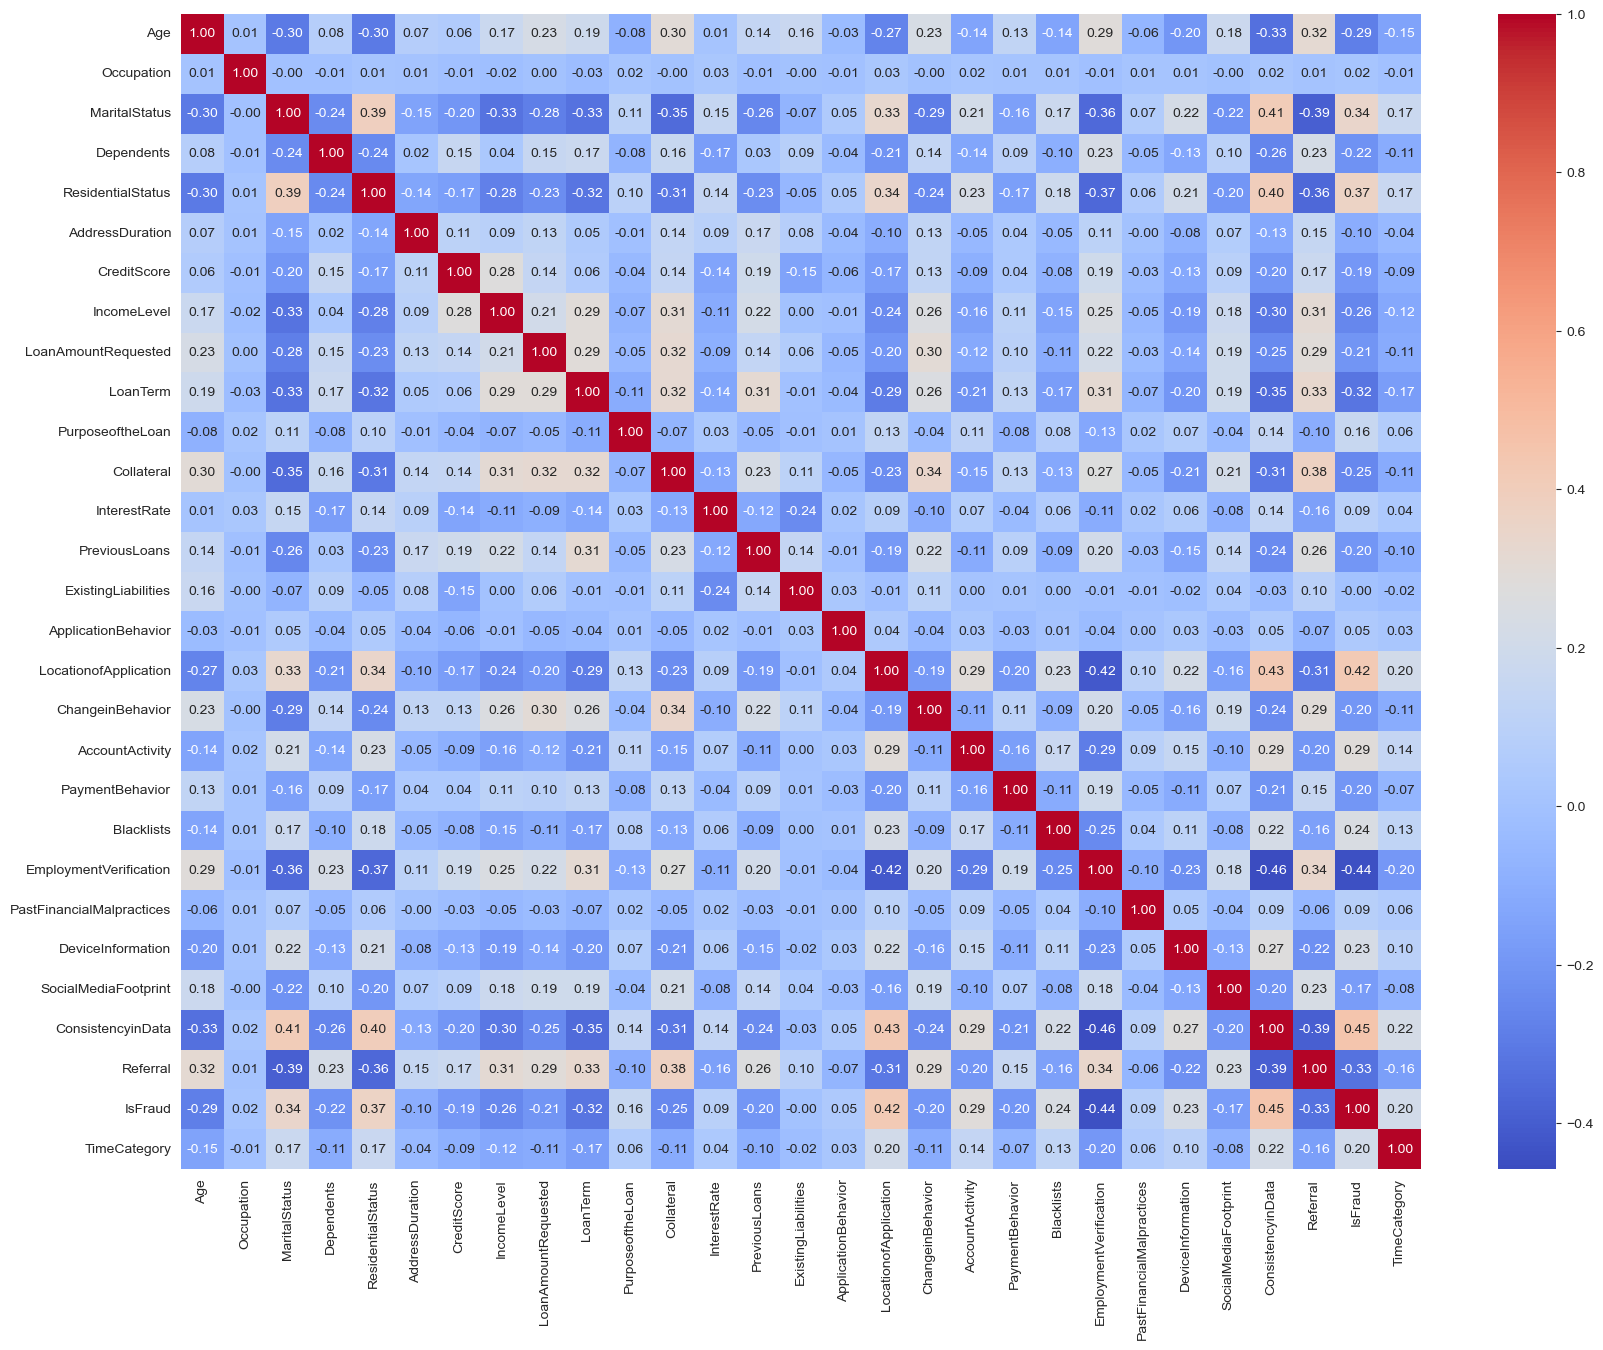

In [773]:
plt.figure(figsize=(20, 15))
sns.heatmap(loanFraud_dataset.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.show()

# columns_to_retain = ['LoanAmountRequested', 'LoanTerm', 'ExistingLiabilities', 'PreviousLoans', 'Dependents', 'Occupation', 'IncomeLevel', 'ResidentialStatus', 'CreditScore', 'IsFraud']

<h2>Base Model Prediction</h2>

In [774]:
Xacc = loanFraud_dataset.drop(['IsFraud'], axis=1)
Yacc = loanFraud_dataset['IsFraud']

Xacc_train, Xacc_test, Yacc_train, Yacc_test = train_test_split(Xacc, Yacc, test_size=0.3, random_state=1)

In [775]:
sc = StandardScaler()
Xacc_train_scaled = sc.fit_transform(Xacc_train)
Xacc_test_scaled = sc.transform(Xacc_test)
#print(Xacc_train)

LogReg = LogisticRegression()
DTClassifier = DecisionTreeClassifier()
RFClassifier = RandomForestClassifier()
SVMClassifier = SVC()
KNNClassifier = KNeighborsClassifier()
GBClassifier = GradientBoostingClassifier()
xgb_loan = XGBClassifier()

# xk updates (START)
LogReg.fit(Xacc_train_scaled, Yacc_train)
Yacc_log = LogReg.predict(Xacc_test_scaled)
DTClassifier.fit(Xacc_train_scaled, Yacc_train)
Yacc_dt = DTClassifier.predict(Xacc_test_scaled)
RFClassifier.fit(Xacc_train_scaled, Yacc_train)
Yacc_rf = RFClassifier.predict(Xacc_test_scaled)
SVMClassifier.fit(Xacc_train_scaled, Yacc_train)
Yacc_svm = SVMClassifier.predict(Xacc_test_scaled)
KNNClassifier.fit(Xacc_train_scaled, Yacc_train)
Yacc_knn = KNNClassifier.predict(Xacc_test_scaled)
GBClassifier.fit(Xacc_train_scaled, Yacc_train)
Yacc_gb = GBClassifier.predict(Xacc_test_scaled)
xgb_loan.fit(Xacc_train_scaled, Yacc_train)
Yacc_xgb = xgb_loan.predict(Xacc_test_scaled)
# xk updates (END)

In [776]:
Xacc_test_df = pd.DataFrame(Xacc_test)
Xacc_test_df.describe()

Age   Occupation  MaritalStatus   Dependents  \
count  3000.000000  3000.000000    3000.000000  3000.000000   
mean     34.881667     8.621000       1.312333     1.318333   
std      12.383757     4.962953       0.834474     1.499249   
min      22.000000     0.000000       0.000000     0.000000   
25%      22.000000     5.000000       1.000000     0.000000   
50%      32.000000     8.000000       2.000000     1.000000   
75%      45.000000    12.000000       2.000000     2.000000   
max      56.000000    18.000000       2.000000     4.000000   

       ResidentialStatus  AddressDuration  CreditScore    IncomeLevel  \
count        3000.000000      3000.000000  3000.000000    3000.000000   
mean            1.427000        69.462333   767.895333   45324.583333   
std             0.563421        84.601145    73.403000   44207.712133   
min             0.000000         1.000000   580.000000       0.000000   
25%             1.000000         1.000000   718.000000    7811.000000   
50%             1.000000        51.000000   799.000000   32519.500000   
75%             2.000000        86.000000   830.000000   70338.500000   
max             2.000000       360.000000   830.000000  150000.000000   

       LoanAmountRequested     LoanTerm  ...  AccountActivity  \
count          3000.000000  3000.000000  ...      3000.000000   
mean          57480.260000    13.883667  ...         0.101000   
std           72563.692942    10.918724  ...         0.301379   
min            2000.000000     1.000000  ...         0.000000   
25%           11019.750000     2.000000  ...         0.000000   
50%           44463.000000    13.000000  ...         0.000000   
75%           68462.250000    24.000000  ...         0.000000   
max          300000.000000    30.000000  ...         1.000000   

       PaymentBehavior   Blacklists  EmploymentVerification  \
count      3000.000000  3000.000000             3000.000000   
mean          1.659667     0.081000                0.756333   
std           0.604948     0.272881                0.429365   
min           0.000000     0.000000                0.000000   
25%           1.000000     0.000000                1.000000   
50%           2.000000     0.000000                1.000000   
75%           2.000000     0.000000                1.000000   
max           2.000000     1.000000                1.000000   

       PastFinancialMalpractices  DeviceInformation  SocialMediaFootprint  \
count                3000.000000        3000.000000           3000.000000   
mean                    0.031000           1.186667              0.190333   
std                     0.173347           1.120822              0.392630   
min                     0.000000           0.000000              0.000000   
25%                     0.000000           0.000000              0.000000   
50%                     0.000000           1.000000              0.000000   
75%                     0.000000           2.000000              0.000000   
max                     1.000000           3.000000              1.000000   

       ConsistencyinData     Referral  TimeCategory  
count        3000.000000  3000.000000   3000.000000  
mean            0.318333     0.408667      1.902333  
std             0.465907     0.491669      0.959393  
min             0.000000     0.000000      1.000000  
25%             0.000000     0.000000      1.000000  
50%             0.000000     0.000000      2.000000  
75%             1.000000     1.000000      2.000000  
max             1.000000     1.000000      4.000000  

[8 rows x 28 columns]

In [777]:
models = {
    "Logistic Regression": Yacc_log,
    "Decision Tree": Yacc_dt,
    "Random Forest": Yacc_rf,
    "SVM": Yacc_svm,
    "KNN": Yacc_knn,
    "Gradient Boosting": Yacc_gb,
    "XGB": Yacc_xgb
}

# xk updates (START)
models_proba = {
    "Logistic Regression": LogReg.predict_proba(Xacc_test_scaled)[:, 1],
    "Decision Tree": DTClassifier.predict_proba(Xacc_test_scaled)[:, 1],
    "Random Forest": RFClassifier.predict_proba(Xacc_test_scaled)[:, 1],
#     "SVM": SVMClassifier.predict_proba(Xacc_test_scaled)[:, 1],  
    "KNN": KNNClassifier.predict_proba(Xacc_test_scaled)[:, 1],
    "Gradient Boosting": GBClassifier.predict_proba(Xacc_test_scaled)[:, 1],
    "XGB": xgb_loan.predict_proba(Xacc_test_scaled)[:, 1]
}
# xk updates (END)

for model_name, y_pred in models.items():
    accuracy = accuracy_score(Yacc_test, y_pred)
    report = classification_report(Yacc_test, y_pred)
    conf_matrix = confusion_matrix(Yacc_test, y_pred)
    f1 = f1_score(Yacc_test, y_pred)

    print(f"\nModel: {model_name}")
    print(f"Validation Accuracy: {accuracy:.4f}")
    print("F1 Score: ", f1)
    print("\nClassification Report:\n", report)
    print("\nConfusion Matrix:\n", conf_matrix)
    print("=" * 50)  # Separator for better readability



Model: Logistic Regression
Validation Accuracy: 0.8450
F1 Score:  0.6166529266281945

Classification Report:
               precision    recall  f1-score   support

           0       0.87      0.94      0.90      2307
           1       0.72      0.54      0.62       693

    accuracy                           0.84      3000
   macro avg       0.80      0.74      0.76      3000
weighted avg       0.84      0.84      0.84      3000


Confusion Matrix:
 [[2161  146]
 [ 319  374]]

Model: Decision Tree
Validation Accuracy: 0.7663
F1 Score:  0.49604601006470167

Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.85      0.85      2307
           1       0.49      0.50      0.50       693

    accuracy                           0.77      3000
   macro avg       0.67      0.67      0.67      3000
weighted avg       0.77      0.77      0.77      3000


Confusion Matrix:
 [[1954  353]
 [ 348  345]]

Model: Random Forest
Validation Ac

<h2>ROC-AUC (Loan Fraud):</h2>

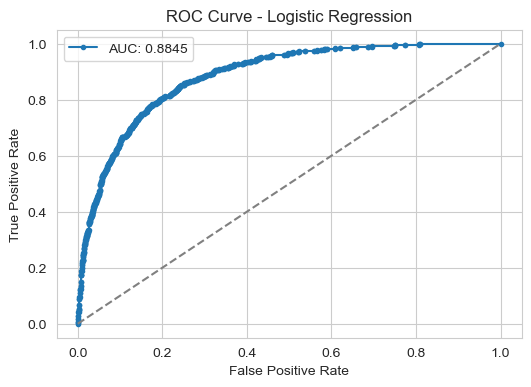

AUC for Logistic Regression: 0.8845


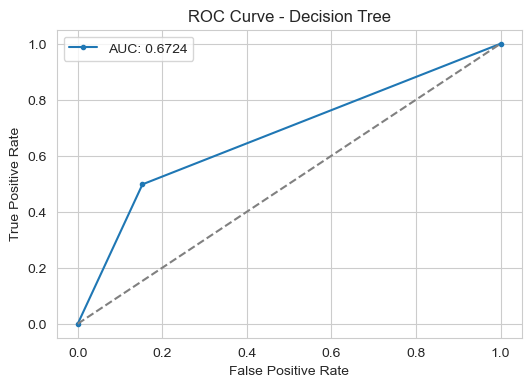

AUC for Decision Tree: 0.6724


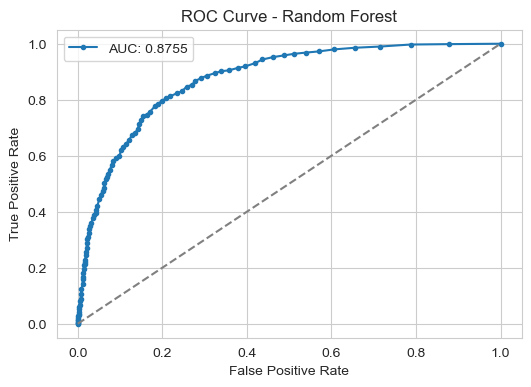

AUC for Random Forest: 0.8755


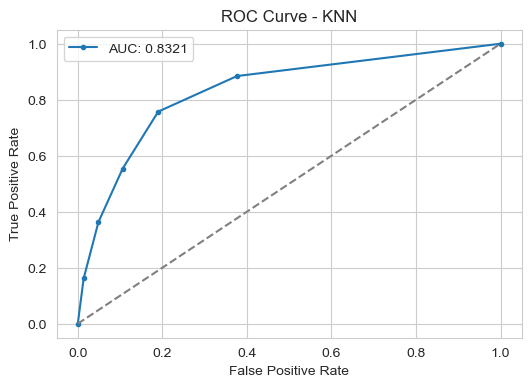

AUC for KNN: 0.8321


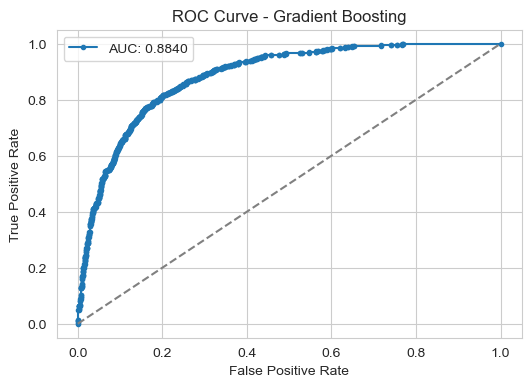

AUC for Gradient Boosting: 0.8840


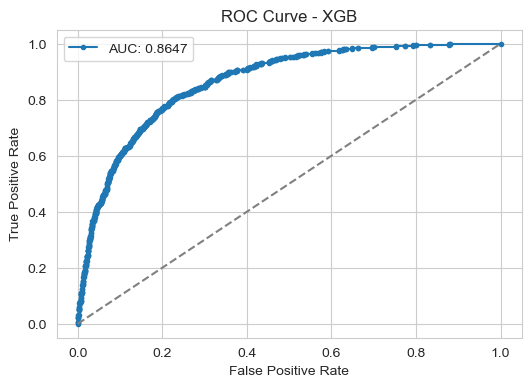

AUC for XGB: 0.8647


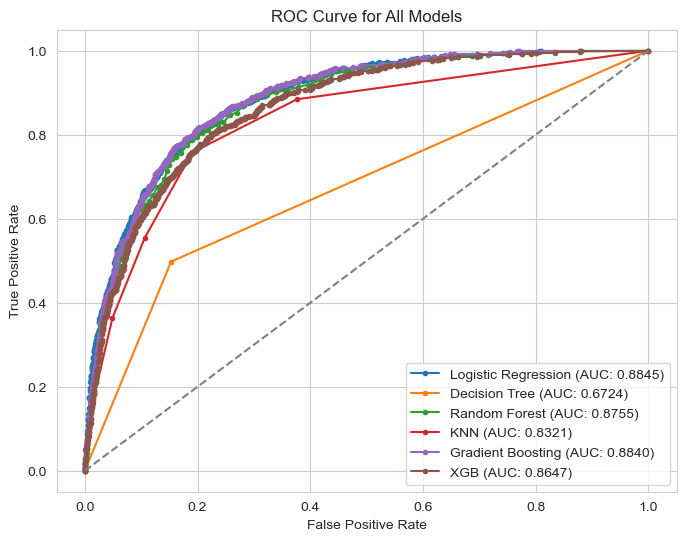

In [778]:
# xk updates (START)

# Plot individual ROC graph
for model_name, y_pred_proba in models_proba.items():
    fpr, tpr, thresholds = roc_curve(Yacc_test, y_pred_proba)  
    auc_value = auc(fpr, tpr)

    # Plot ROC curve
    plt.figure(figsize=(6, 4))
    plt.plot(fpr, tpr, marker='.', label=f"AUC: {auc_value:.4f}")
    plt.plot([0, 1], [0, 1], linestyle='--', color='gray') 
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'ROC Curve - {model_name}')
    plt.legend()
    plt.show()
    
     # Print AUC value
    print(f"AUC for {model_name}: {auc_value:.4f}") 

# Plot combined ROC curve for all models
plt.figure(figsize=(8, 6)) 
for model_name, y_pred_proba in models_proba.items():
    fpr, tpr, thresholds = roc_curve(Yacc_test, y_pred_proba)
    auc_value = auc(fpr, tpr)
    plt.plot(fpr, tpr, marker='.', label=f"{model_name} (AUC: {auc_value:.4f})")

plt.plot([0, 1], [0, 1], linestyle='--', color='gray')  # Diagonal reference
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for All Models')
plt.legend()
plt.show()

# xk updates (END)

<h2>Record Sampling</h2>

Testing with 70/30 split (70% Non Fraud | 30% Fraud) <br>
AND <br> Testing with 50/50 split (50% Non Fraud | 50% Fraud)

In [779]:
# # 70/30 split
# from imblearn.over_sampling import SMOTE
# from imblearn.under_sampling import RandomUnderSampler
# from imblearn.combine import SMOTETomek, SMOTEENN

# Xacc_train, Xacc_test, Yacc_train, Yacc_test = model_selection.train_test_split(Xacc, Yacc, test_size=0.3, random_state=1)

# sc = StandardScaler()
# Xacc_train = sc.fit_transform(Xacc_train)
# Xacc_test = sc.transform(Xacc_test)


# # Resample only to the training data
# # Setting sampling_strategy=0.43 will give roughly 70:30 ratio (non-fraud:fraud)

# # 1. Undersampling
# undersampler = RandomUnderSampler(sampling_strategy=0.43, random_state=42)
# X_under, y_under = undersampler.fit_resample(Xacc_train, Yacc_train)

# # 2. SMOTE only
# smote = SMOTE(sampling_strategy=0.43, random_state=42)
# X_smote, y_smote = smote.fit_resample(Xacc_train, Yacc_train)

# # 3. SMOTETomek (SMOTE + Tomek Links)
# smotetomek = SMOTETomek(sampling_strategy=0.43, random_state=42)
# X_smotetomek, y_smotetomek = smotetomek.fit_resample(Xacc_train, Yacc_train)

# # 4. SMOTEENN (SMOTE + Edited Nearest Neighbors)
# smoteenn = SMOTEENN(sampling_strategy=0.43, random_state=42)
# X_smoteenn, y_smoteenn = smoteenn.fit_resample(Xacc_train, Yacc_train)

# # Print distributions for comparison
# print("Original distribution:")
# print(pd.Series(Yacc_train).value_counts(normalize=True))
# print("\nUndersampling distribution:")
# print(pd.Series(y_under).value_counts(normalize=True))
# print("\nSMOTE distribution:")
# print(pd.Series(y_smote).value_counts(normalize=True))
# print("\nSMOTETomek distribution:")
# print(pd.Series(y_smotetomek).value_counts(normalize=True))
# print("\nSMOTEENN distribution:")
# print(pd.Series(y_smoteenn).value_counts(normalize=True))

# # Visualize distributions
# plt.figure(figsize=(15, 5))

# # Create DataFrames for each distribution to be plotted
# df_original = pd.DataFrame({'Class': Yacc_train})
# df_under = pd.DataFrame({'Class': y_under})
# df_smote = pd.DataFrame({'Class': y_smote})
# df_smotetomek = pd.DataFrame({'Class': y_smotetomek})
# df_smoteenn = pd.DataFrame({'Class': y_smoteenn})

# # Original
# plt.subplot(151)
# sns.countplot(data=df_original, x='Class')
# plt.title('Original')

# # Undersampling
# plt.subplot(152)
# sns.countplot(data=df_under, x='Class')
# plt.title('Undersampling')

# # SMOTE
# plt.subplot(153)
# sns.countplot(data=df_smote, x='Class')
# plt.title('SMOTE')

# # SMOTETomek
# plt.subplot(154)
# sns.countplot(data=df_smotetomek, x='Class')
# plt.title('SMOTETomek')

# # SMOTEENN
# plt.subplot(155)
# sns.countplot(data=df_smoteenn, x='Class')
# plt.title('SMOTEENN')

# plt.tight_layout()
# plt.show()

In [780]:
# resampled_sets = {
#     'Original': (Xacc_train, Yacc_train),
#     'Undersampling': (X_under, y_under),
#     'SMOTE': (X_smote, y_smote),
#     'SMOTETomek': (X_smotetomek, y_smotetomek),
#     'SMOTEENN': (X_smoteenn, y_smoteenn)
# }

# for resample_name, (X_res, y_res) in resampled_sets.items():
#     print(f"\nResults for {resample_name}:")
#     # Train
#     LogReg.fit(X_res, y_res)
#     # Predict
#     y_pred = LogReg.predict(Xacc_test)
#     # Get accuracy
#     acc = accuracy_score(Yacc_test, y_pred)
#     print(f"{LogReg} Accuracy: {acc:.3f}")
#     print(classification_report(Yacc_test, y_pred))

In [781]:
# # 50/50 split
# Xacc_train, Xacc_test, Yacc_train, Yacc_test = model_selection.train_test_split(Xacc, Yacc, test_size=0.3, random_state=1)

# sc = StandardScaler()
# Xacc_train = sc.fit_transform(Xacc_train)
# Xacc_test = sc.transform(Xacc_test)


# # Resample only to the training data
# # Setting sampling_strategy=1.0 will give 50:50 ratio (non-fraud:fraud)

# # 1. Undersampling
# undersampler = RandomUnderSampler(sampling_strategy=1.0, random_state=42)
# X_under, y_under = undersampler.fit_resample(Xacc_train, Yacc_train)

# # 2. SMOTE only
# smote = SMOTE(sampling_strategy=1.0, random_state=42)
# X_smote, y_smote = smote.fit_resample(Xacc_train, Yacc_train)

# # 3. SMOTETomek (SMOTE + Tomek Links)
# smotetomek = SMOTETomek(sampling_strategy=1.0, random_state=42)
# X_smotetomek, y_smotetomek = smotetomek.fit_resample(Xacc_train, Yacc_train)

# # 4. SMOTEENN (SMOTE + Edited Nearest Neighbors)
# smoteenn = SMOTEENN(sampling_strategy=1.0, random_state=42)
# X_smoteenn, y_smoteenn = smoteenn.fit_resample(Xacc_train, Yacc_train)

# # Print distributions for comparison
# print("Original distribution:")
# print(pd.Series(Yacc_train).value_counts(normalize=True))
# print("\nUndersampling distribution:")
# print(pd.Series(y_under).value_counts(normalize=True))
# print("\nSMOTE distribution:")
# print(pd.Series(y_smote).value_counts(normalize=True))
# print("\nSMOTETomek distribution:")
# print(pd.Series(y_smotetomek).value_counts(normalize=True))
# print("\nSMOTEENN distribution:")
# print(pd.Series(y_smoteenn).value_counts(normalize=True))

# # Visualize distributions
# plt.figure(figsize=(15, 5))

# # Create DataFrames for each distribution to be plotted
# df_original = pd.DataFrame({'Class': Yacc_train})
# df_under = pd.DataFrame({'Class': y_under})
# df_smote = pd.DataFrame({'Class': y_smote})
# df_smotetomek = pd.DataFrame({'Class': y_smotetomek})
# df_smoteenn = pd.DataFrame({'Class': y_smoteenn})

# # Original
# plt.subplot(151)
# sns.countplot(data=df_original, x='Class')
# plt.title('Original')

# # Undersampling
# plt.subplot(152)
# sns.countplot(data=df_under, x='Class')
# plt.title('Undersampling')

# # SMOTE
# plt.subplot(153)
# sns.countplot(data=df_smote, x='Class')
# plt.title('SMOTE')

# # SMOTETomek
# plt.subplot(154)
# sns.countplot(data=df_smotetomek, x='Class')
# plt.title('SMOTETomek')

# # SMOTEENN
# plt.subplot(155)
# sns.countplot(data=df_smoteenn, x='Class')
# plt.title('SMOTEENN')

# plt.tight_layout()
# plt.show()

In [782]:
# resampled_sets = {
#     'Original': (Xacc_train, Yacc_train),
#     'Undersampling': (X_under, y_under),
#     'SMOTE': (X_smote, y_smote),
#     'SMOTETomek': (X_smotetomek, y_smotetomek),
#     'SMOTEENN': (X_smoteenn, y_smoteenn)
# }

# for resample_name, (X_res, y_res) in resampled_sets.items():
#     print(f"\nResults for {resample_name}:")
#     # Train
#     LogReg.fit(X_res, y_res)
#     # Predict
#     y_pred = LogReg.predict(Xacc_test)
#     # Get accuracy
#     acc = accuracy_score(Yacc_test, y_pred)
#     print(f"{LogReg} Accuracy: {acc:.3f}")
#     print(classification_report(Yacc_test, y_pred))

In [783]:
# Xacc_train, Xacc_test, Yacc_train, Yacc_test = train_test_split(Xacc, Yacc, test_size=0.3, random_state=1)



# # Define your samplers (use None for the Original data)
# samplers = {
#     'Original': None,
#     'Undersampling (70:30)': RandomUnderSampler(sampling_strategy=0.43, random_state=42),
#     'SMOTE (70:30)': SMOTE(sampling_strategy=0.43, random_state=42),
#     'SMOTETomek (70:30)': SMOTETomek(sampling_strategy=0.43, random_state=42),
#     'SMOTEENN (70:30)': SMOTEENN(sampling_strategy=0.43, random_state=42),
#     'Undersampling (50:50)': RandomUnderSampler(sampling_strategy=1.0, random_state=42),
#     'SMOTE (50:50)': SMOTE(sampling_strategy=1.0, random_state=42),
#     'SMOTETomek (50:50)': SMOTETomek(sampling_strategy=1.0, random_state=42),
#     'SMOTEENN (50:50)': SMOTEENN(sampling_strategy=1.0, random_state=42)
# }

# # Define your models
# models = {
#     "Logistic Regression": LogReg,
#     "Decision Tree": DTClassifier,
#     "Random Forest": RFClassifier,
#     "SVM": SVMClassifier,
#     "KNN": KNNClassifier,
#     "Gradient Boosting": GBClassifier,
#     "XGB": XGBClassifier
# }

# # Loop over each sampler and model combination
# for sampler_name, sampler in samplers.items():
#     print(f"\nResampling Method: {sampler_name}")
#     for model_name, model_instance in models.items():
#         # Build a pipeline: if no sampler, only include the classifier.
#         if sampler is not None:
#             pipe = Pipeline([
#                 ('sampler', sampler),
#                 ('classifier', model_instance)
#             ])
#         else:
#             pipe = Pipeline([
#                 ('classifier', model_instance)
#             ])
        
        
#         # Scale the data
#         sc = StandardScaler()
#         Xacc_train = sc.fit_transform(Xacc_train)
#         Xacc_test = sc.transform(Xacc_test)    
    
#         # Train on the (resampled) training data
#         pipe.fit(Xacc_train, Yacc_train)
#         # Predict on the test data (test set remains unchanged)
#         y_pred = pipe.predict(Xacc_test)
#         acc = accuracy_score(Yacc_test, y_pred)
#         print(f"Model: {model_name} Accuracy: {acc:.3f}")
#         print(classification_report(Yacc_test, y_pred))
#         print("=" * 50)
        
#         #Loan Fraud Dataset
#         #SMOTEENN (70/30) 
#         #Model: Random Forest Accuracy: 0.842

In [784]:
results = []

# Define samplers (use None for the Original data)
samplers = {
    'Undersampling (70:30)': RandomUnderSampler(sampling_strategy=0.43, random_state=1),
    'SMOTE (70:30)': SMOTE(sampling_strategy=0.43, random_state=1),
    'SMOTETomek (70:30)': SMOTETomek(sampling_strategy=0.43, random_state=1),
    'SMOTEENN (70:30)': SMOTEENN(sampling_strategy=0.43, random_state=1),
    # 'Undersampling (50:50)': RandomUnderSampler(sampling_strategy=1.0, random_state=42),
    # 'SMOTE (50:50)': SMOTE(sampling_strategy=1.0, random_state=42),
    # 'SMOTETomek (50:50)': SMOTETomek(sampling_strategy=1.0, random_state=42),
    # 'SMOTEENN (50:50)': SMOTEENN(sampling_strategy=1.0, random_state=42)
}


# Define models
models = {
    "Logistic Regression": LogReg,
    "Decision Tree": DTClassifier,
    "Random Forest": RFClassifier,
    "SVM": SVMClassifier,
    "KNN": KNNClassifier,
    "Gradient Boosting": GBClassifier,
    "XGB": xgb_loan
}

# Loop over each sampler and model combination
for sampler_name, sampler in samplers.items():
    for model_name, model_instance in models.items():
        # Build a pipeline: if no sampler, only include classifier
        if sampler is not None:
            pipe = Pipeline([
                ('sampler', sampler),
                ('classifier', model_instance)
            ])
        else:
            pipe = Pipeline([
                ('classifier', model_instance)
            ])
            
        # Scale the data
        sc = StandardScaler()
        Xacc_train_scaled = sc.fit_transform(Xacc_train)
        Xacc_test_scaled = sc.transform(Xacc_test)    
            
        # Train on the (resampled) training data
        pipe.fit(Xacc_train_scaled, Yacc_train)
        # Predict on the test data (test set remains unchanged)
        y_pred = pipe.predict(Xacc_test_scaled)
        acc = accuracy_score(Yacc_test, y_pred)
        f1 = f1_score(Yacc_test, y_pred, average='binary')

        results.append({
            'Resampling': sampler_name,
            'Model': model_name,
            'Accuracy': acc,
            'F1': f1,
            'Pipeline': pipe  # Saving the pipeline might be useful later
        })

# Convert the results into a DataFrame
results_df = pd.DataFrame(results)

# To get the best model based on accuracy
best_pipeline = results_df.sort_values(by=['Accuracy'], ascending=False).head(1)
print("\nBest performing model:")
print(best_pipeline)

# best_df = best_pipeline['Pipeline'].values[0]
# print(best_df)


 #Loan Fraud Dataset
        #SMOTEENN (70/30) 
        #Model: Gradient Boosting Accuracy: 0.841333



Best performing model:
       Resampling              Model  Accuracy        F1  \
12  SMOTE (70:30)  Gradient Boosting     0.844  0.631496   

                                             Pipeline  
12  (SMOTE(random_state=1, sampling_strategy=0.43)...  


In [785]:
#Utilising sampled data for prediction

best_sample = SMOTE(sampling_strategy=0.43, random_state=42)
Xacc_samp, Yacc_samp = best_sample.fit_resample(Xacc, Yacc)

Xacc_samp_train, Xacc_samp_test, Yacc_samp_train, Yacc_samp_test = train_test_split(Xacc_samp, Yacc_samp, test_size=0.3, random_state=1)

Xacc_samp_train_scaled = sc.fit_transform(Xacc_samp_train)
Xacc_samp_test_scaled = sc.transform(Xacc_samp_test)

GBClassifier.fit(Xacc_samp_train_scaled, Yacc_samp_train)
Yacc_samp_gbr = GBClassifier.predict(Xacc_samp_test_scaled)

pd.DataFrame({'Actual': Yacc_samp_test, 'Predicted': Yacc_samp_gbr})




Actual  Predicted
5013        1          1
4512        0          0
9937        0          0
6249        0          0
2981        1          0
...       ...        ...
6182        0          0
9557        0          0
10130       1          1
1423        0          0
7612        1          1

[3335 rows x 2 columns]

c:\Users\xuanw\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


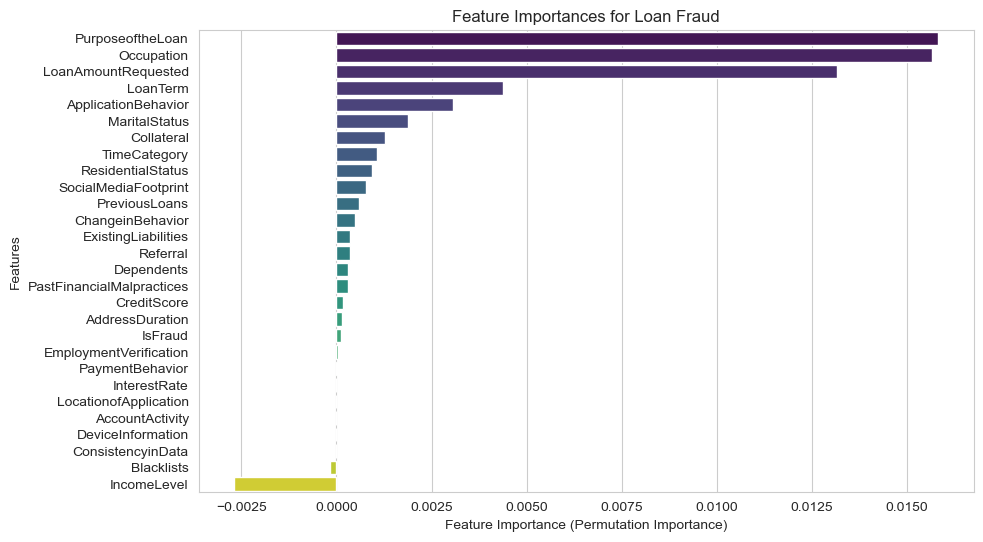

In [786]:
LR_featimpt = LogReg.fit(Xacc_train, Yacc_train)

# Calculate feature importances using permutation importance
perm_importance = permutation_importance(LR_featimpt, Xacc_test, Yacc_test, n_repeats=30, random_state=1)

# Extract and store feature importances
importance_scores = perm_importance.importances_mean
feature_names = loanFraud_dataset.columns[1:]  # Assuming processedDf contains your data with column names
feature_importances = dict(zip(feature_names, importance_scores))

# Sort feature importances
sorted_feature_importances = dict(sorted(feature_importances.items(), key=lambda x: x[1], reverse=True))

# Create a bar plot of feature importances
plt.figure(figsize=(10, 6))
sns.barplot(x=list(sorted_feature_importances.values()), y=list(sorted_feature_importances.keys()), palette='viridis')
plt.xlabel('Feature Importance (Permutation Importance)')
plt.ylabel('Features')
plt.title('Feature Importances for Loan Fraud')
plt.show()

#Results show negative correlation for existing liabilities
#Results also show little to no correlation on device information and location of application

In [787]:
loanFraud_dataset_featureImpt = loanFraud_dataset.drop(['DeviceInformation', 'LocationofApplication', 'ExistingLiabilities'], axis=1) #consider adding blacklist
loanFraud_dataset_featureImpt.head()

Age  Occupation  MaritalStatus  Dependents  \
DummyDate                                                         
2024-12-01 10:00:00   56          16              0           4   
2024-12-02 16:00:00   40           7              2           0   
2024-12-03 03:00:00   25           4              1           0   
2024-12-04 16:00:00   34          18              2           0   
2024-12-05 12:00:00   47          14              2           0   

                     ResidentialStatus  AddressDuration  CreditScore  \
DummyDate                                                              
2024-12-01 10:00:00                  1                1          827   
2024-12-02 16:00:00                  2                1          830   
2024-12-03 03:00:00                  0              360          809   
2024-12-04 16:00:00                  2               92          630   
2024-12-05 12:00:00                  2               26          733   

                     IncomeLevel  LoanAmountRequested  LoanTerm  ...  \
DummyDate                                                        ...   
2024-12-01 10:00:00        52033               300000        25  ...   
2024-12-02 16:00:00        42893                 8105         3  ...   
2024-12-03 03:00:00       141233                75734        19  ...   
2024-12-04 16:00:00         9217                 2000         1  ...   
2024-12-05 12:00:00        47979                67767         1  ...   

                     AccountActivity  PaymentBehavior  Blacklists  \
DummyDate                                                           
2024-12-01 10:00:00                0                2           0   
2024-12-02 16:00:00                0                2           0   
2024-12-03 03:00:00                0                2           1   
2024-12-04 16:00:00                1                0           0   
2024-12-05 12:00:00                0                2           0   

                     EmploymentVerification  PastFinancialMalpractices  \
DummyDate                                                                
2024-12-01 10:00:00                       1                          0   
2024-12-02 16:00:00                       1                          0   
2024-12-03 03:00:00                       1                          0   
2024-12-04 16:00:00                       0                          1   
2024-12-05 12:00:00                       1                          0   

                     SocialMediaFootprint  ConsistencyinData  Referral  \
DummyDate                                                                
2024-12-01 10:00:00                     1                  0         1   
2024-12-02 16:00:00                     0                  0         0   
2024-12-03 03:00:00                     0                  0         1   
2024-12-04 16:00:00                     0                  1         0   
2024-12-05 12:00:00                     0                  0         0   

                     IsFraud  TimeCategory  
DummyDate                                   
2024-12-01 10:00:00        0             1  
2024-12-02 16:00:00        0             2  
2024-12-03 03:00:00        0             4  
2024-12-04 16:00:00        1             2  
2024-12-05 12:00:00        0             2  

[5 rows x 26 columns]

In [788]:
Xfeat = loanFraud_dataset_featureImpt.drop(['IsFraud'], axis=1)
Yfeat = loanFraud_dataset_featureImpt['IsFraud']

Xfeat_train, Xfeat_test, Yfeat_train, Yfeat_test = train_test_split(Xfeat, Yfeat, test_size=0.3, random_state=1)

In [789]:
sc = StandardScaler()
Xfeat_train_scaled = sc.fit_transform(Xfeat_train)
Xfeat_test_scaled = sc.transform(Xfeat_test)

LR_featimpt.fit(Xfeat_train_scaled, Yfeat_train)
Yfeat_gb = LR_featimpt.predict(Xfeat_train_scaled)

# For evaluating the model

# accuracy = accuracy_score(Yfeat_train, Yfeat_gb)
# print(f"Accuracy: {accuracy:.2f}")

# #Classification Report
# print("Classification Report:")
# print(confusion_matrix(Yfeat_train, Yfeat_gb))

accuracy_feat = accuracy_score(Yfeat_train, Yfeat_gb) # Accuracy classification score
report_feat = classification_report(Yfeat_train, Yfeat_gb) # Build a text report showing the main classification metrics
conf_matrix_feat = confusion_matrix(Yfeat_train, Yfeat_gb) # Compute confusion matrix to evaluate the accuracy of a classification
f1 = f1_score(Yfeat_test, y_pred)
    
print("Validation Accuracy:", accuracy_feat)
print("F1 Score: ", f1)
print("\nClassification Report:\n", report_feat)
print("\nConfusion Matrix:\n", conf_matrix_feat)


Validation Accuracy: 0.8465714285714285
F1 Score:  0.6419420094403235

Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.93      0.90      5467
           1       0.69      0.54      0.61      1533

    accuracy                           0.85      7000
   macro avg       0.78      0.74      0.76      7000
weighted avg       0.84      0.85      0.84      7000


Confusion Matrix:
 [[5096  371]
 [ 703  830]]


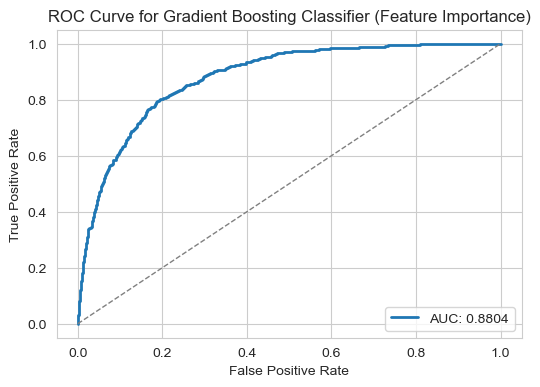

AUC for [0.00920835 0.00669293 0.00260665 ... 0.80534699 0.39008802 0.67290579]: 0.8804


In [790]:
# xk updates (START)

featimpt_LRprob = LogReg.predict_proba(Xfeat_test_scaled)[:, 1]

# Compute False Positive Rate (FPR) and True Positive Rate (TPR)
fpr, tpr, _ = roc_curve(Yfeat_test, featimpt_LRprob)
auc_value = auc(fpr, tpr)

# Plot ROC Curve
plt.figure(figsize=(6, 4))
plt.plot(fpr, tpr, label=f"AUC: {auc_value:.4f}", linewidth=2)
plt.plot([0, 1], [0, 1], linestyle='--', color='gray', linewidth=1)  # Reference Line
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title(f'ROC Curve for Gradient Boosting Classifier (Feature Importance)')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

# Print AUC value
print(f"AUC for {featimpt_LRprob}: {auc_value:.4f}")

# xk updates (END)

In [791]:
# DTClassifier.fit(Xacc_train, Yacc_train)
# Yacc_dt = DTClassifier.predict(Xacc_test)

In [792]:
# accuracy = accuracy_score(Yacc_test, Yacc_log) # Accuracy classification score
# report = classification_report(Yacc_test, Yacc_log) # Build a text report showing the main classification metrics
# conf_matrix = confusion_matrix(Yacc_test, Yacc_log) # Compute confusion matrix to evaluate the accuracy of a classification

# print("Validation Accuracy:", accuracy) 
# print("\nClassification Report:\n", report)
# print("\nConfusion Matrix:\n", conf_matrix)

# # Define labels for the heatmap
# labels = ['Not Fraud', 'Fraud']

# # Create the heatmap
# plt.figure(figsize=(8, 6))
# sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)

# # Add titles and labels
# plt.title('Confusion Matrix')
# plt.xlabel('Predicted Labels')
# plt.ylabel('True Labels')
# plt.show()

In [793]:
#X

In [794]:
Xacc.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 10000 entries, 2024-12-01 10:00:00 to 2025-02-02 10:00:00
Data columns (total 28 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Age                        10000 non-null  int64  
 1   Occupation                 10000 non-null  int32  
 2   MaritalStatus              10000 non-null  int32  
 3   Dependents                 10000 non-null  int64  
 4   ResidentialStatus          10000 non-null  int32  
 5   AddressDuration            10000 non-null  int64  
 6   CreditScore                10000 non-null  int64  
 7   IncomeLevel                10000 non-null  int64  
 8   LoanAmountRequested        10000 non-null  int64  
 9   LoanTerm                   10000 non-null  int64  
 10  PurposeoftheLoan           10000 non-null  int32  
 11  Collateral                 10000 non-null  int32  
 12  InterestRate               10000 non-null  float64
 13  PreviousLoa

<h3>Hyperparameter Tuning</h3>

In [795]:
param_grid = {
    'n_estimators': [100, 200, 300, 500],
    'learning_rate': [0.01, 0.05, 0.1, 0.2],
    'max_depth': [3, 5, 7, 9],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'subsample': [0.8, 0.9, 1.0],
    'max_features': ['sqrt', 'log2', None]
}

random_search = RandomizedSearchCV(estimator=GBClassifier,
                                 param_distributions=param_grid,
                                 n_iter=20,
                                 cv=5,
                                 n_jobs=-1,
                                 verbose=2,
                                 random_state=42,
                                 scoring='f1')

random_search.fit(Xacc_samp_train_scaled, Yacc_samp_train)

print("Best parameters found:", random_search.best_params_)

best_model_loan = random_search.best_estimator_

y_pred = best_model_loan.predict(Xacc_samp_test_scaled)
print("\nBest Model Results:")
print("Accuracy:", accuracy_score(Yacc_samp_test, y_pred))
print("F1 Score:", f1_score(Yacc_samp_test, y_pred))
print("\nClassification Report:")
print(classification_report(Yacc_samp_test, y_pred))
joblib.dump(best_model_loan, 'loan_fraud.pkl')
# Best Model Results:
# Accuracy: 0.8500749625187406
# F1 Score: 0.7357293868921777

Fitting 5 folds for each of 20 candidates, totalling 100 fits


c:\Users\xuanw\anaconda3\Lib\site-packages\joblib\externals\loky\process_executor.py:700: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


Best parameters found: {'subsample': 0.8, 'n_estimators': 500, 'min_samples_split': 5, 'min_samples_leaf': 2, 'max_features': 'log2', 'max_depth': 9, 'learning_rate': 0.05}

Best Model Results:
Accuracy: 0.8530734632683659
F1 Score: 0.7407407407407408

Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.91      0.90      2347
           1       0.78      0.71      0.74       988

    accuracy                           0.85      3335
   macro avg       0.83      0.81      0.82      3335
weighted avg       0.85      0.85      0.85      3335



['loan_fraud.pkl']

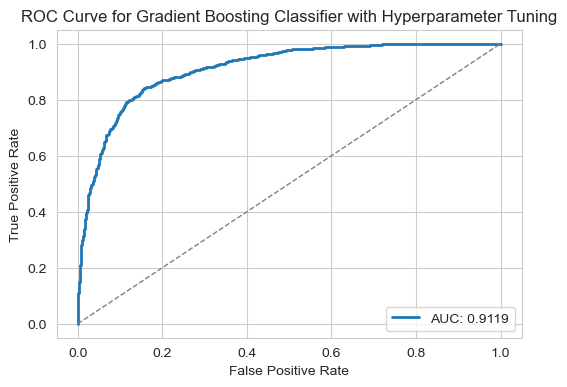

AUC for [0.78918807 0.00667541 0.0016424  ... 0.99687713 0.22032963 0.50436292]: 0.9119


In [796]:
# xk updates (START)

hyperparam_gbrprob = best_model_loan.predict_proba(Xacc_samp_test_scaled)[:, 1]

# Compute False Positive Rate (FPR) and True Positive Rate (TPR)
fpr, tpr, _ = roc_curve(Yacc_samp_test, hyperparam_gbrprob)
auc_value = auc(fpr, tpr)

# Plot ROC Curve
plt.figure(figsize=(6, 4))
plt.plot(fpr, tpr, label=f"AUC: {auc_value:.4f}", linewidth=2)
plt.plot([0, 1], [0, 1], linestyle='--', color='gray', linewidth=1)  # Reference Line
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title(f'ROC Curve for Gradient Boosting Classifier with Hyperparameter Tuning')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

# Print AUC value
print(f"AUC for {hyperparam_gbrprob}: {auc_value:.4f}")

# xk updates (END)

<h2>Input Prediction</h2>

Mapping 


Mappings for Occupation:
Accountant -> 0
Architect -> 1
Artist -> 2
Chef -> 3
Clerk -> 4
Designer -> 5
Doctor -> 6
Engineer -> 7
Entrepreneur -> 8
Lawyer -> 9
Manager -> 10
Musician -> 11
Retired -> 12
Self-employed -> 13
Software Developer -> 14
Student -> 15
Teacher -> 16
Technician -> 17
Unemployed -> 18

Mappings for MaritalStatus:
Divorced -> 0
Married -> 1
Single -> 2

Mappings for ResidentialStatus:
Live with Parents -> 0
Own -> 1
Rent -> 2

Mappings for PurposeoftheLoan:
auto -> 0
education -> 1
home -> 2
medical -> 3
personal -> 4
travel -> 5

Mappings for Collateral:
No -> 0
Yes -> 1

Mappings for ApplicationBehavior:
Normal -> 0
Rapid -> 1

Mappings for LocationofApplication:
Local -> 0
Unusual -> 1

Mappings for ChangeinBehavior:
No -> 0
Yes -> 1

Mappings for AccountActivity:
Normal -> 0
Unusual -> 1

Mappings for PaymentBehavior:
Defaulted -> 0
Late -> 1
On-time -> 2

Mappings for Blacklists:
No -> 0
Yes -> 1

Mappings for EmploymentVerification:
Not Verified -> 0
Verified -> 1

Mappings for PastFinancialMalpractices:
No -> 0
Yes -> 1

Mappings for DeviceInformation:
Desktop -> 0
Laptop -> 1
Mobile -> 2
Tablet -> 3

Mappings for SocialMediaFootprint:
No -> 0
Yes -> 1

Mappings for ConsistencyinData:
Consistent -> 0
Inconsistent -> 1

Mappings for Referral:
Online -> 0
Referral -> 1


In [797]:
loanCustomer_info = [[
    35,    # Age
    2,     # Occupation (Encoded categorical)
    1,     # MaritalStatus (Encoded categorical)
    3,     # Dependents
    0,     # ResidentialStatus (Encoded categorical)
    5,     # AddressDuration
    750,   # CreditScore
    50000, # IncomeLevel
    100000,# LoanAmountRequested
    10,    # LoanTerm
    2,     # PurposeoftheLoan (Encoded categorical)
    1,     # Collateral (Encoded categorical)
    6.5,   # InterestRate
    2,     # PreviousLoans
    1,     # ExistingLiabilities
    5000,  # ApplicationBehavior
    2000,  # LocationofApplication
    2,     # ChangeinBehavior
    3,     # AccountActivity
    1,     # PaymentBehavior
    1,     # Blacklists (Encoded categorical)
    0,     # EmploymentVerification (Encoded categorical)
    1,     # PastFinancialMalpractices (Encoded categorical)
    0,     # DeviceInformation (Encoded categorical)
    1,     # SocialMediaFootprint (Encoded categorical)
    0,     # ConsistencyinData (Encoded categorical)
    1,     # Referral (Encoded categorical)
    2      # TimeCategory (Encoded categorical)
]]

# loanCustomer_info = [[ # Sample fraud customer information
#     34,    # Age
#     18,     # Occupation (Encoded categorical)
#     2,     # MaritalStatus (Encoded categorical)
#     0,     # Dependents
#     2,     # ResidentialStatus (Encoded categorical)
#     92,     # AddressDuration
#     630,   # CreditScore
#     9217, # IncomeLevel
#     2000,# LoanAmountRequested
#     1,    # LoanTerm
#     4,     # PurposeoftheLoan (Encoded categorical)
#     0,     # Collateral (Encoded categorical)
#     4.7,   # InterestRate
#     1,     # PreviousLoans
#     4373,     # ExistingLiabilities
#     1,  # ApplicationBehavior
#     1,  # LocationofApplication
#     0,     # ChangeinBehavior
#     1,     # AccountActivity
#     0,     # PaymentBehavior
#     0,     # Blacklists (Encoded categorical)
#     0,     # EmploymentVerification (Encoded categorical)
#     1,     # PastFinancialMalpractices (Encoded categorical)
#     2,     # DeviceInformation (Encoded categorical)
#     0,     # SocialMediaFootprint (Encoded categorical)
#     1,     # ConsistencyinData (Encoded categorical)
#     0,     # Referral (Encoded categorical)
#     3      # TimeCategory (Encoded categorical)
# ]]



In [798]:
# from sklearn.ensemble import GradientBoostingClassifier

sc = StandardScaler()
Xacc_samp_train_scaled = sc.fit_transform(Xacc_samp_train)
loanCustomer_info_scaled = sc.transform(loanCustomer_info)
joblib.dump(sc, 'loan_scaler.pkl')
# gbc_loaninput = GradientBoostingClassifier()
# gbc_loaninput.fit(Xacc_samp_train_scaled, Yacc_samp_train)

predictedFraud = best_model_loan.predict(loanCustomer_info_scaled)

pd.DataFrame({'Predicted': predictedFraud})

print("Customer is predicted to be:", "Fraud" if predictedFraud[0] == 1 else "Not Fraud")



Customer is predicted to be: Not Fraud


c:\Users\xuanw\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


<h3>Anomaly Detection</h3>

In [799]:
isoForest = IsolationForest(contamination=0.01, random_state=42)
isoForest.fit(Xacc)
loanFraud_dataset["Anomaly_Score"] = isoForest.decision_function(Xacc)
loanFraud_dataset["Anomaly"] = isoForest.predict(Xacc)

pd.DataFrame({'Anomaly Score': loanFraud_dataset["Anomaly_Score"], 'Anomaly': loanFraud_dataset["Anomaly"]})


Anomaly Score  Anomaly
DummyDate                                  
2024-12-01 10:00:00       0.020650        1
2024-12-02 16:00:00       0.160030        1
2024-12-03 03:00:00       0.006534        1
2024-12-04 16:00:00       0.021515        1
2024-12-05 12:00:00       0.124973        1
...                            ...      ...
2025-01-29 10:00:00       0.107864        1
2025-01-30 15:00:00       0.134355        1
2025-01-31 14:00:00       0.085887        1
2025-02-01 12:00:00       0.067186        1
2025-02-02 10:00:00       0.040066        1

[10000 rows x 2 columns]

Inliers (Normal) Statistics:
Count: 9900
Average Credit Score: 768.88
Average Income: $46157.04

Outliers (Anomaly) Statistics:
Count: 100
Average Credit Score: 751.05
Average Income: $29914.93


<Figure size 1000x600 with 0 Axes>

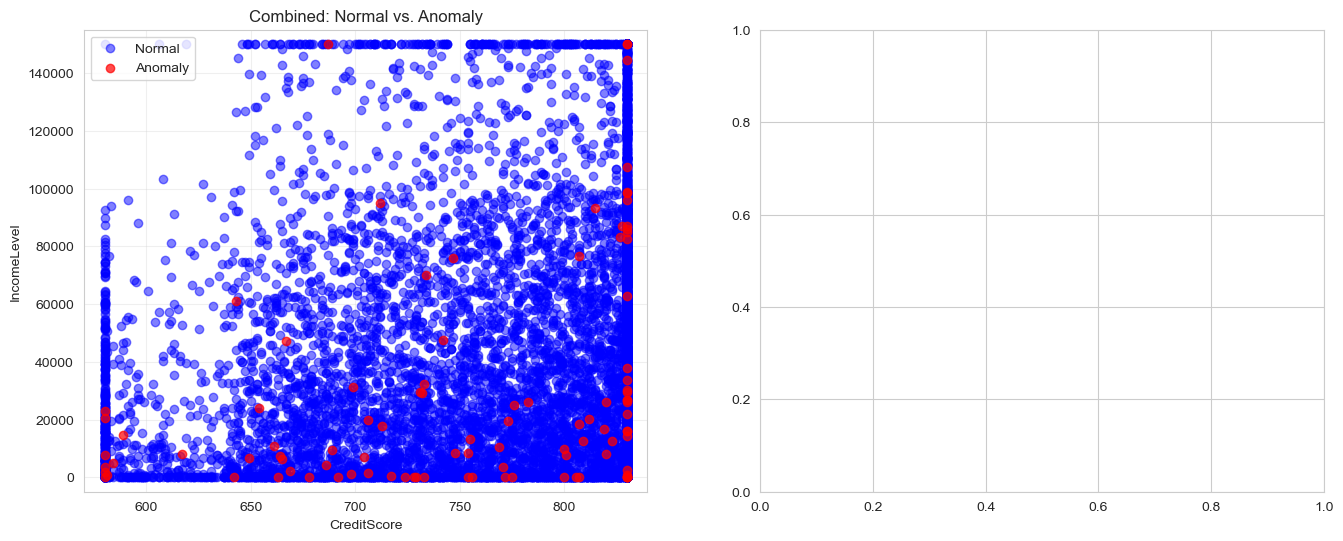

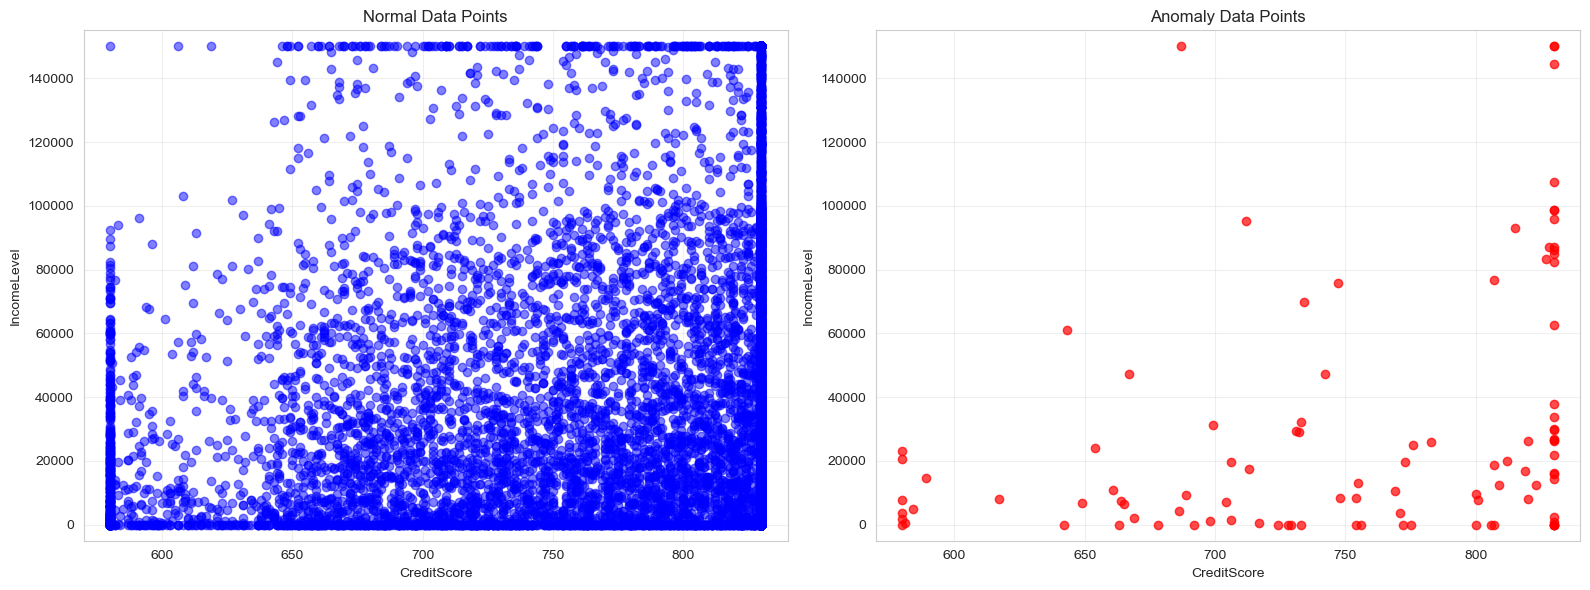

In [800]:
# Create a scatter plot with colors based on the anomaly detection
plt.figure(figsize=(10, 6))

# Convert the anomaly predictions to a more interpretable format
# In Isolation Forest, -1 indicates outliers and 1 indicates inliers
outliers = (loanFraud_dataset["Anomaly"] == -1)

# Choose features to plot
feature1 = 'CreditScore'
feature2 = 'IncomeLevel'

# Create a figure with two subplots side by side
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

# Plot 1: Combined view (similar to your original image)
# Plot inliers in blue
ax1.scatter(
    loanFraud_dataset.loc[~outliers, feature1],
    loanFraud_dataset.loc[~outliers, feature2],
    c='blue', label='Normal', alpha=0.5
)
# Plot outliers in red
ax1.scatter(
    loanFraud_dataset.loc[outliers, feature1],
    loanFraud_dataset.loc[outliers, feature2],
    c='red', label='Anomaly', alpha=0.7
)
ax1.set_xlabel(feature1)
ax1.set_ylabel(feature2)
ax1.set_title('Combined: Normal vs. Anomaly')
ax1.legend()
ax1.grid(True, alpha=0.3)

# Create separate figure for side-by-side visualization
fig2, (ax3, ax4) = plt.subplots(1, 2, figsize=(16, 6))

# Plot 2: Only inliers (normal data)
ax3.scatter(
    loanFraud_dataset.loc[~outliers, feature1],
    loanFraud_dataset.loc[~outliers, feature2],
    c='blue', alpha=0.5
)
ax3.set_xlabel(feature1)
ax3.set_ylabel(feature2)
ax3.set_title('Normal Data Points')
ax3.grid(True, alpha=0.3)

# Plot 3: Only outliers (anomalies)
ax4.scatter(
    loanFraud_dataset.loc[outliers, feature1],
    loanFraud_dataset.loc[outliers, feature2],
    c='red', alpha=0.7
)
ax4.set_xlabel(feature1)
ax4.set_ylabel(feature2)
ax4.set_title('Anomaly Data Points')
ax4.grid(True, alpha=0.3)

# Make sure both plots use the same scale for fair comparison
x_min = loanFraud_dataset[feature1].min() - 10
x_max = loanFraud_dataset[feature1].max() + 10
y_min = loanFraud_dataset[feature2].min() - 5000
y_max = loanFraud_dataset[feature2].max() + 5000

for ax in [ax1, ax3, ax4]:
    ax.set_xlim(x_min, x_max)
    ax.set_ylim(y_min, y_max)

# Add summary statistics as text
anomaly_stats = loanFraud_dataset[outliers].describe().round(2)
normal_stats = loanFraud_dataset[~outliers].describe().round(2)

# Print summary statistics 
print("Inliers (Normal) Statistics:")
print(f"Count: {sum(~outliers)}")
print(f"Average Credit Score: {normal_stats.loc['mean', 'CreditScore']}")
print(f"Average Income: ${normal_stats.loc['mean', 'IncomeLevel']:.2f}")

print("\nOutliers (Anomaly) Statistics:")
print(f"Count: {sum(outliers)}")
print(f"Average Credit Score: {anomaly_stats.loc['mean', 'CreditScore']}")
print(f"Average Income: ${anomaly_stats.loc['mean', 'IncomeLevel']:.2f}")

# Show the plots
plt.tight_layout()
plt.show()

<h1>Credit Card Attrition and Fraud</h1>

In [801]:
creditcard_dataset = creditcard_dataset.dropna()
creditcard_dataset.isnull().sum()

CLIENTNUM                                                                                                                             0
Attrition_Flag                                                                                                                        0
Customer_Age                                                                                                                          0
Gender                                                                                                                                0
Dependent_count                                                                                                                       0
Education_Level                                                                                                                       0
Marital_Status                                                                                                                        0
Income_Category                                 

In [802]:
creditcard_dataset.drop(['Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1'], axis=1, inplace=True)
creditcard_dataset.drop(['Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2'], axis=1, inplace=True)
creditcard_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 21 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   CLIENTNUM                 10127 non-null  int64  
 1   Attrition_Flag            10127 non-null  object 
 2   Customer_Age              10127 non-null  int64  
 3   Gender                    10127 non-null  object 
 4   Dependent_count           10127 non-null  int64  
 5   Education_Level           10127 non-null  object 
 6   Marital_Status            10127 non-null  object 
 7   Income_Category           10127 non-null  object 
 8   Card_Category             10127 non-null  object 
 9   Months_on_book            10127 non-null  int64  
 10  Total_Relationship_Count  10127 non-null  int64  
 11  Months_Inactive_12_mon    10127 non-null  int64  
 12  Contacts_Count_12_mon     10127 non-null  int64  
 13  Credit_Limit              10127 non-null  float64
 14  Total_

In [803]:
#Drop any unknown values from identified Columns
creditcard_dataset = creditcard_dataset[~creditcard_dataset['Income_Category'].str.contains('Unknown')]
creditcard_dataset = creditcard_dataset[~creditcard_dataset['Education_Level'].str.contains('Unknown')]
creditcard_dataset = creditcard_dataset[~creditcard_dataset['Marital_Status'].str.contains('Unknown')]


Income = creditcard_dataset['Income_Category']

# Add another column for the randomized Income value based on their category
income_generator = []
income_Range_in_Value = {
    'Less than $40K': (0, 39999),
    '$40K - $60K': (40000, 59999),
    '$60K - $80K': (60000, 79999),
    '$80K - $120K': (80000, 119999),
    '$120K +': (120000, 200000),
}

for i in Income:
    income_generator.append(random.randint(*income_Range_in_Value.get(i, (0, 39999))))

creditcard_dataset['Income'] = income_generator

creditcard_dataset.head()
    

CLIENTNUM     Attrition_Flag  Customer_Age Gender  Dependent_count  \
0  768805383  Existing Customer            45      M                3   
1  818770008  Existing Customer            49      F                5   
2  713982108  Existing Customer            51      M                3   
4  709106358  Existing Customer            40      M                3   
5  713061558  Existing Customer            44      M                2   

  Education_Level Marital_Status Income_Category Card_Category  \
0     High School        Married     $60K - $80K          Blue   
1        Graduate         Single  Less than $40K          Blue   
2        Graduate        Married    $80K - $120K          Blue   
4      Uneducated        Married     $60K - $80K          Blue   
5        Graduate        Married     $40K - $60K          Blue   

   Months_on_book  ...  Contacts_Count_12_mon  Credit_Limit  \
0              39  ...                      3       12691.0   
1              44  ...                      2        8256.0   
2              36  ...                      0        3418.0   
4              21  ...                      0        4716.0   
5              36  ...                      2        4010.0   

   Total_Revolving_Bal  Avg_Open_To_Buy  Total_Amt_Chng_Q4_Q1  \
0                  777          11914.0                 1.335   
1                  864           7392.0                 1.541   
2                    0           3418.0                 2.594   
4                    0           4716.0                 2.175   
5                 1247           2763.0                 1.376   

   Total_Trans_Amt  Total_Trans_Ct  Total_Ct_Chng_Q4_Q1  \
0             1144              42                1.625   
1             1291              33                3.714   
2             1887              20                2.333   
4              816              28                2.500   
5             1088              24                0.846   

   Avg_Utilization_Ratio  Income  
0                  0.061   64507  
1                  0.105   19424  
2                  0.000   81518  
4                  0.000   62606  
5                  0.311   53383  

[5 rows x 22 columns]

In [804]:
#Reset index as index didnt auto increment after dropping
creditcard_dataset = creditcard_dataset.reset_index()

percentageExpend = []
AvgSpentPerTrans = []

#Calculate percentage of Income Spent & Average Expenditure Per Transaction Count
for i in range(len(creditcard_dataset)):
    expendPercentage = (creditcard_dataset['Total_Trans_Amt'][i]/creditcard_dataset['Income'][i]) * 100
    AvgSpent = creditcard_dataset['Total_Trans_Amt'][i]/creditcard_dataset['Total_Trans_Ct'][i]
    percentageExpend.insert(i, expendPercentage)
    AvgSpentPerTrans.insert(i, AvgSpent)

#Added column percentage of income expenditure
creditcard_dataset['percentage_expenditure'] = percentageExpend
#Added average spent per transaction
creditcard_dataset['average_spent_per_transaction'] = AvgSpentPerTrans


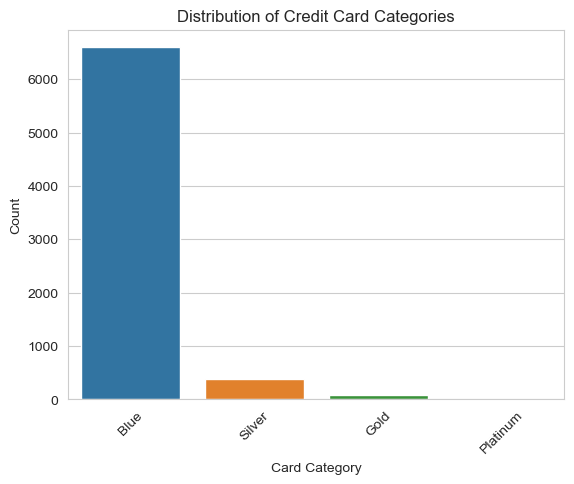

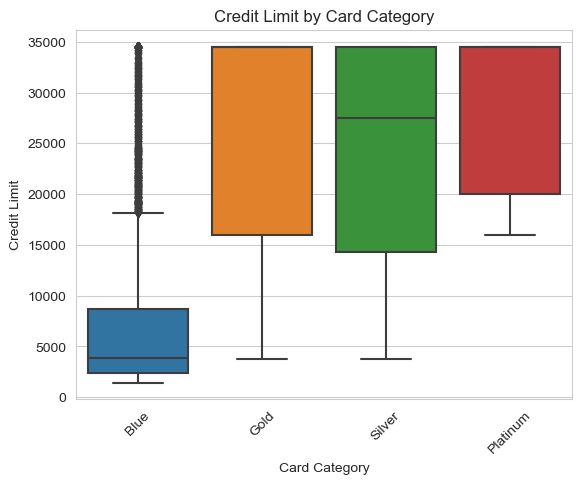

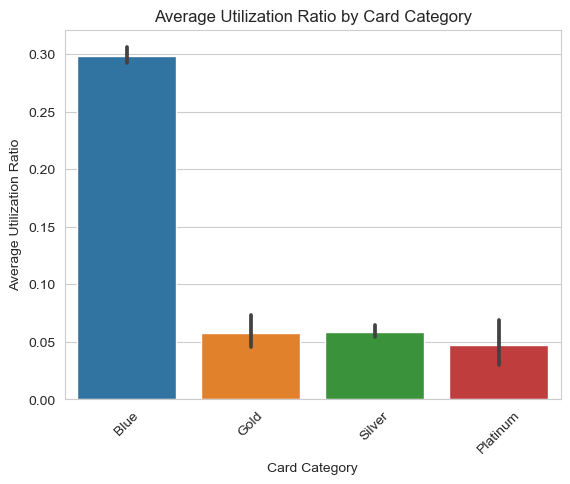

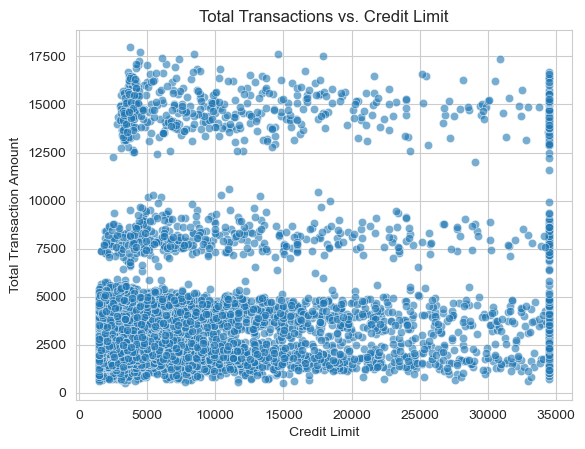

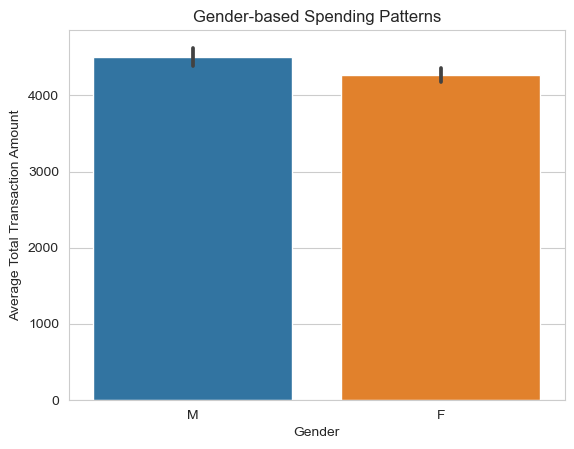

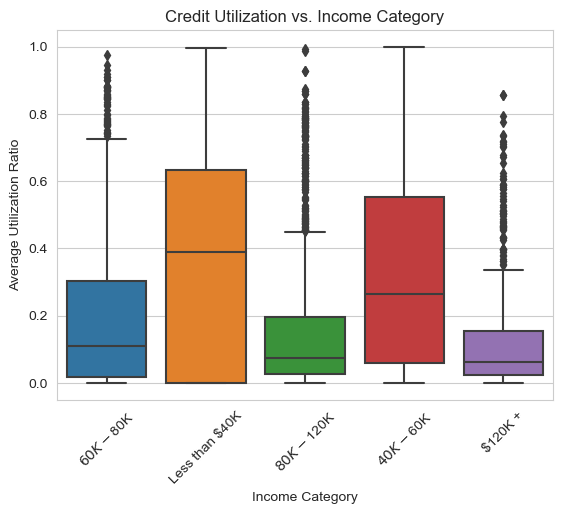

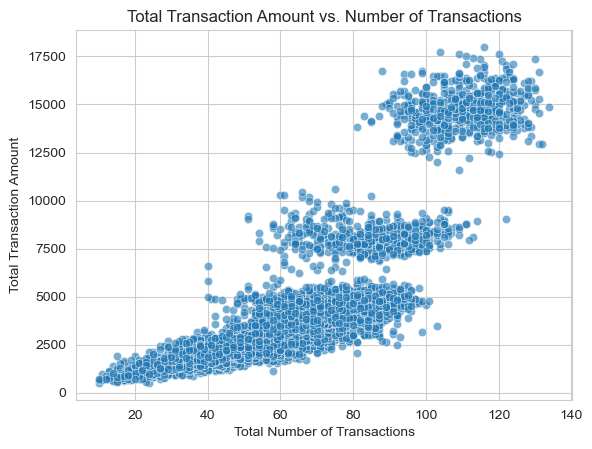

In [805]:
#Distribution of Credit Card Categories
sns.countplot(data=creditcard_dataset, x="Card_Category", order=creditcard_dataset["Card_Category"].value_counts().index)
plt.title("Distribution of Credit Card Categories")
plt.xlabel("Card Category")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()

#Credit Limit by Card Category
sns.boxplot(data=creditcard_dataset, x="Card_Category", y="Credit_Limit")
plt.title("Credit Limit by Card Category")
plt.xlabel("Card Category")
plt.ylabel("Credit Limit")
plt.xticks(rotation=45)
plt.show()

#Average Utilization Ratio by Card Category
sns.barplot(data=creditcard_dataset, x="Card_Category", y="Avg_Utilization_Ratio", estimator=lambda x: x.mean())
plt.title("Average Utilization Ratio by Card Category")
plt.xlabel("Card Category")
plt.ylabel("Average Utilization Ratio")
plt.xticks(rotation=45)
plt.show()

#Total Transactions vs. Credit Limit
sns.scatterplot(data=creditcard_dataset, x="Credit_Limit", y="Total_Trans_Amt", alpha=0.6)
plt.title("Total Transactions vs. Credit Limit")
plt.xlabel("Credit Limit")
plt.ylabel("Total Transaction Amount")
plt.show()

#Gender-based Spending Patterns 
sns.barplot(data=creditcard_dataset, x="Gender", y="Total_Trans_Amt", estimator=lambda x: x.mean())
plt.title("Gender-based Spending Patterns")
plt.xlabel("Gender")
plt.ylabel("Average Total Transaction Amount")
plt.show()

#Credit Utilization vs. Income Category
sns.boxplot(data=creditcard_dataset, x="Income_Category", y="Avg_Utilization_Ratio")
plt.title("Credit Utilization vs. Income Category")
plt.xlabel("Income Category")
plt.ylabel("Average Utilization Ratio")
plt.xticks(rotation=45)
plt.show()

#Total Transaction Amount vs. Number of Transactions
sns.scatterplot(data=creditcard_dataset, x="Total_Trans_Ct", y="Total_Trans_Amt", alpha=0.6)
plt.title("Total Transaction Amount vs. Number of Transactions")
plt.xlabel("Total Number of Transactions")
plt.ylabel("Total Transaction Amount")
plt.show()


In [806]:
#Data Transformation for the churn dataset

categorical_columns = creditcard_dataset.select_dtypes(include=['object']).columns

#Transform the categorical columns into numerical values
label_encoders = {}
for column in categorical_columns:
    label_encoder = LabelEncoder()
    creditcard_dataset[column] = label_encoder.fit_transform(creditcard_dataset[column])
    label_encoders[column] = label_encoder

#Put values in a dictionary to compare and see what is the transformed value and original value
for column, encoder in label_encoders.items():
    print(f"\nMappings for {column}:")
    for original_value, encoded_value in zip(encoder.classes_, range(len(encoder.classes_))):
        print(f"{original_value} -> {encoded_value}")


Mappings for Attrition_Flag:
Attrited Customer -> 0
Existing Customer -> 1

Mappings for Gender:
F -> 0
M -> 1

Mappings for Education_Level:
College -> 0
Doctorate -> 1
Graduate -> 2
High School -> 3
Post-Graduate -> 4
Uneducated -> 5

Mappings for Marital_Status:
Divorced -> 0
Married -> 1
Single -> 2

Mappings for Income_Category:
$120K + -> 0
$40K - $60K -> 1
$60K - $80K -> 2
$80K - $120K -> 3
Less than $40K -> 4

Mappings for Card_Category:
Blue -> 0
Gold -> 1
Platinum -> 2
Silver -> 3


In [807]:
creditcard_dataset['Total_Revolving_Bal_Range'] = pd.cut(creditcard_dataset['Total_Revolving_Bal']
                                                  , [-1, 500, 1000, 1500, 2000, 2500, 3000, 3500, 4000], labels=[8, 7, 6, 5, 4, 3, 2, 1])

creditcard_dataset['Avg_Open_To_Buy_Range'] = pd.cut(creditcard_dataset['Avg_Open_To_Buy']
                                                  , [-1, 5000, 10000, 15000, 20000, 25000, 30000, 35000, 40000], labels=[8, 7, 6, 5, 4, 3, 2, 1])


In [808]:
creditcard_dataset['Total_Revolving_Bal_Range'] = creditcard_dataset['Total_Revolving_Bal_Range'].astype(int)
creditcard_dataset['Avg_Open_To_Buy_Range'] = creditcard_dataset['Avg_Open_To_Buy_Range'].astype(int)
print(creditcard_dataset[['Total_Revolving_Bal_Range', 'Avg_Open_To_Buy_Range']].isnull().sum())


Total_Revolving_Bal_Range    0
Avg_Open_To_Buy_Range        0
dtype: int64


In [809]:
creditcard_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7081 entries, 0 to 7080
Data columns (total 27 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   index                          7081 non-null   int64  
 1   CLIENTNUM                      7081 non-null   int64  
 2   Attrition_Flag                 7081 non-null   int32  
 3   Customer_Age                   7081 non-null   int64  
 4   Gender                         7081 non-null   int32  
 5   Dependent_count                7081 non-null   int64  
 6   Education_Level                7081 non-null   int32  
 7   Marital_Status                 7081 non-null   int32  
 8   Income_Category                7081 non-null   int32  
 9   Card_Category                  7081 non-null   int32  
 10  Months_on_book                 7081 non-null   int64  
 11  Total_Relationship_Count       7081 non-null   int64  
 12  Months_Inactive_12_mon         7081 non-null   i

In [810]:
GeneratedCreditScore = []
for i in range(len(creditcard_dataset)):
    score = (creditcard_dataset['Card_Category'][i] * 0.30) + (creditcard_dataset['Total_Revolving_Bal_Range'][i] * 0.30) + (creditcard_dataset['Months_on_book'][i] * 0.15) + (creditcard_dataset['Total_Relationship_Count'][i] * 0.15) + (creditcard_dataset['Avg_Open_To_Buy_Range'][i] * 0.10)
    score = score * 100
    score.astype(int)
    GeneratedCreditScore.append(score)
    
    
creditcard_dataset['Pseudo_Credit_Score'] = GeneratedCreditScore

In [811]:
creditcard_dataset.drop(['index'], axis=1, inplace=True)
creditcard_dataset.head(10)

CLIENTNUM  Attrition_Flag  Customer_Age  Gender  Dependent_count  \
0  768805383               1            45       1                3   
1  818770008               1            49       0                5   
2  713982108               1            51       1                3   
3  709106358               1            40       1                3   
4  713061558               1            44       1                2   
5  710930508               1            37       1                3   
6  719661558               1            48       1                2   
7  710599683               1            56       1                1   
8  712396908               1            57       0                2   
9  709967358               1            48       1                4   

   Education_Level  Marital_Status  Income_Category  Card_Category  \
0                3               1                2              0   
1                2               2                4              0   
2                2               1                3              0   
3                5               1                2              0   
4                2               1                1              0   
5                5               2                2              0   
6                2               2                3              0   
7                0               2                3              0   
8                2               1                4              0   
9                4               2                3              0   

   Months_on_book  ...  Total_Trans_Amt  Total_Trans_Ct  Total_Ct_Chng_Q4_Q1  \
0              39  ...             1144              42                1.625   
1              44  ...             1291              33                3.714   
2              36  ...             1887              20                2.333   
3              21  ...              816              28                2.500   
4              36  ...             1088              24                0.846   
5              36  ...             1350              24                1.182   
6              36  ...             1441              32                0.882   
7              36  ...             1539              17                3.250   
8              48  ...             1570              29                0.611   
9              36  ...             1671              27                0.929   

   Avg_Utilization_Ratio  Income  percentage_expenditure  \
0                  0.061   64507                1.773451   
1                  0.105   19424                6.646417   
2                  0.000   81518                2.314826   
3                  0.000   62606                1.303389   
4                  0.311   53383                2.038102   
5                  0.113   63948                2.111090   
6                  0.144   88326                1.631456   
7                  0.000  116423                1.321904   
8                  0.279   30573                5.135250   
9                  0.078  113286                1.475028   

   average_spent_per_transaction  Total_Revolving_Bal_Range  \
0                      27.238095                          7   
1                      39.121212                          7   
2                      94.350000                          8   
3                      29.142857                          8   
4                      45.333333                          6   
5                      56.250000                          3   
6                      45.031250                          5   
7                      90.529412                          8   
8                      54.137931                          7   
9                      61.888889                          4   

   Avg_Open_To_Buy_Range  Pseudo_Credit_Score  
0                      6                930.0  
1                      7               1030.0  
2                      8                920.0  
3                     

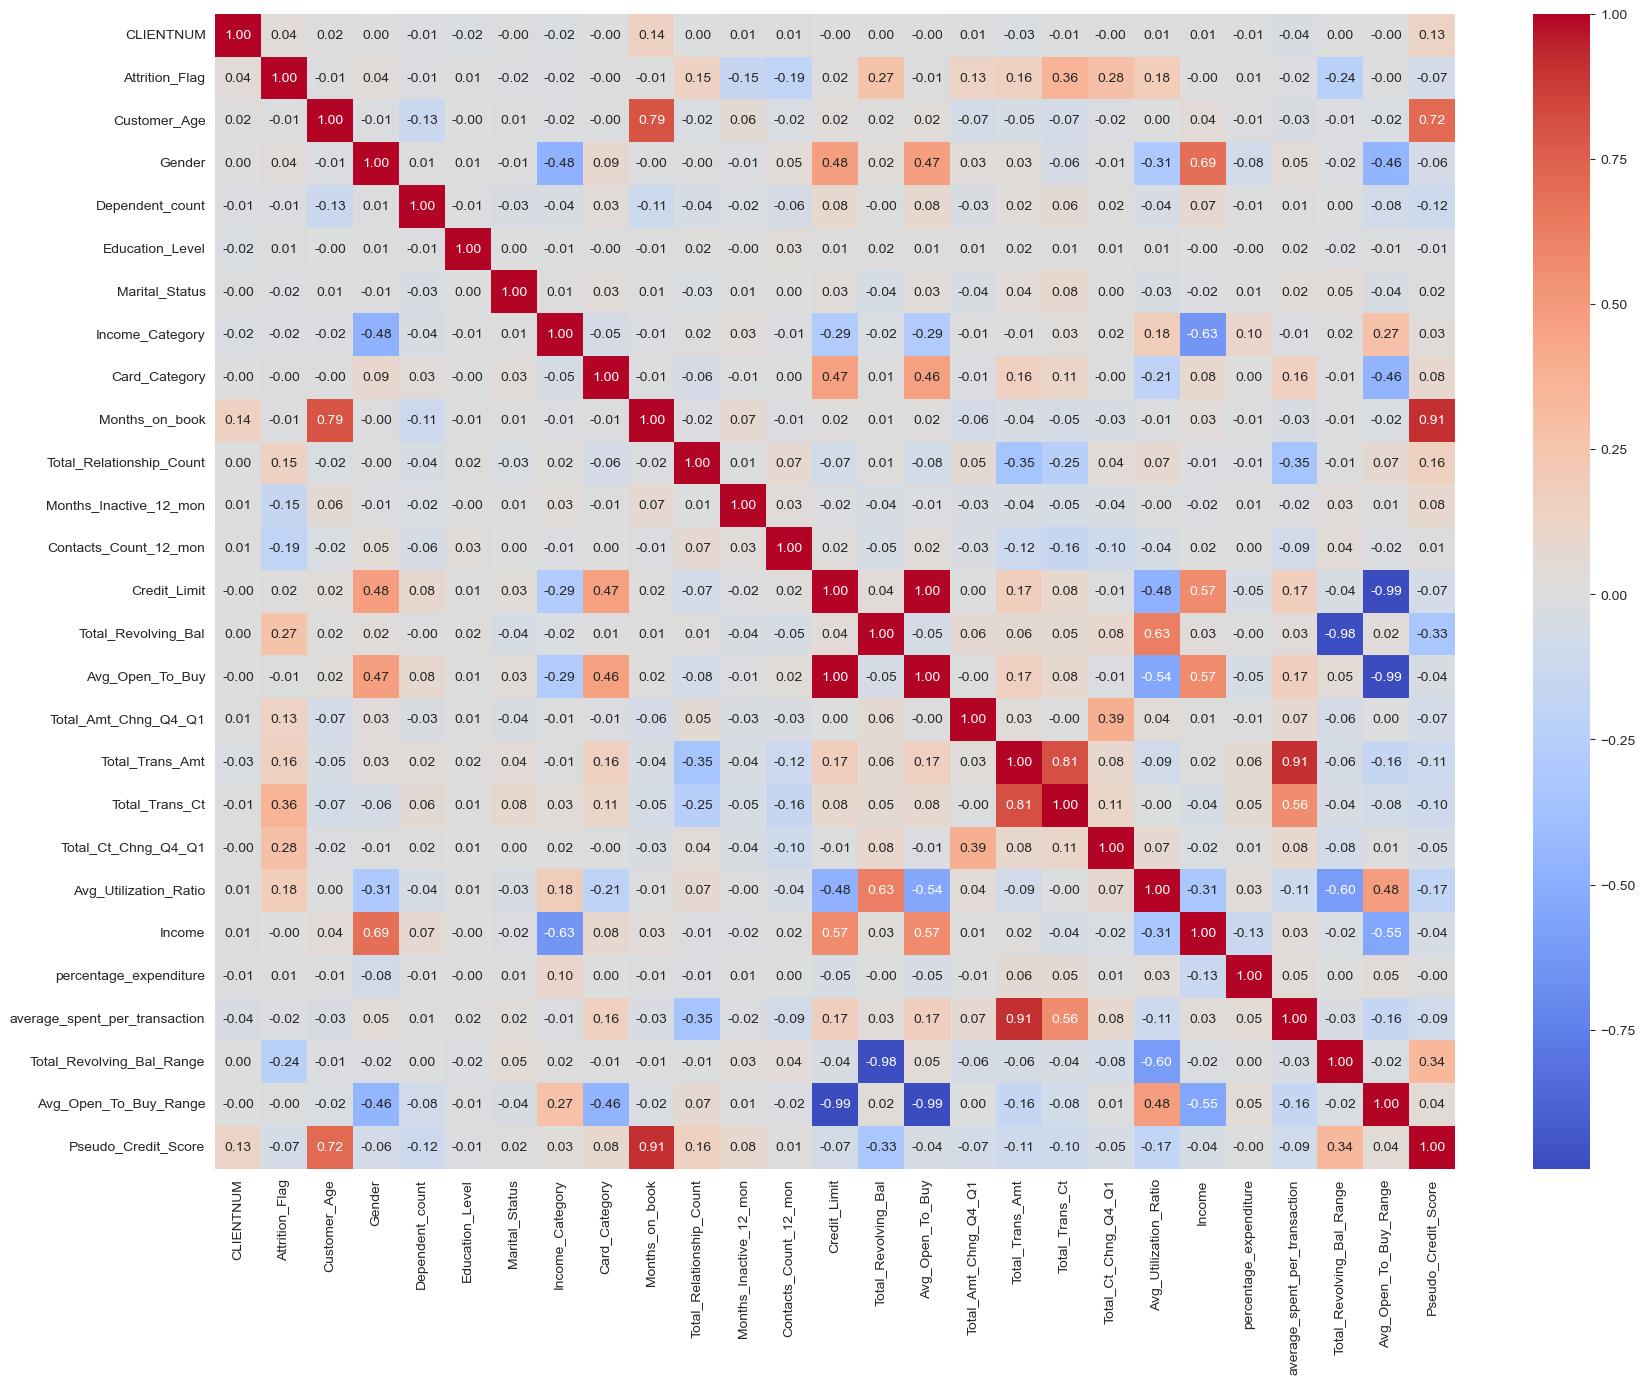

In [812]:
plt.figure(figsize=(20, 15))
sns.heatmap(creditcard_dataset.corr('pearson'), annot=True, cmap='coolwarm', fmt='.2f')
plt.show()

<h1>CLUSTERING</h1>

In [813]:
#selected features based on heatmap

selected_features = [
    'Total_Trans_Ct', 'Total_Trans_Amt', 'Total_Relationship_Count',
    'Credit_Limit', 'Avg_Open_To_Buy', 'Avg_Utilization_Ratio', 'Total_Revolving_Bal'
] #removed

#double check if colum is in the data
missing_cols = [col for col in selected_features if col not in creditcard_dataset.columns]
if missing_cols:
    print(f"Missing columns: {missing_cols}")
else:
    print("All required columns exist!")

# Normalize the selected features
scaler = MinMaxScaler()
scaled_features = creditcard_dataset[selected_features].copy()
scaled_features[selected_features] = scaler.fit_transform(scaled_features[selected_features])




All required columns exist!


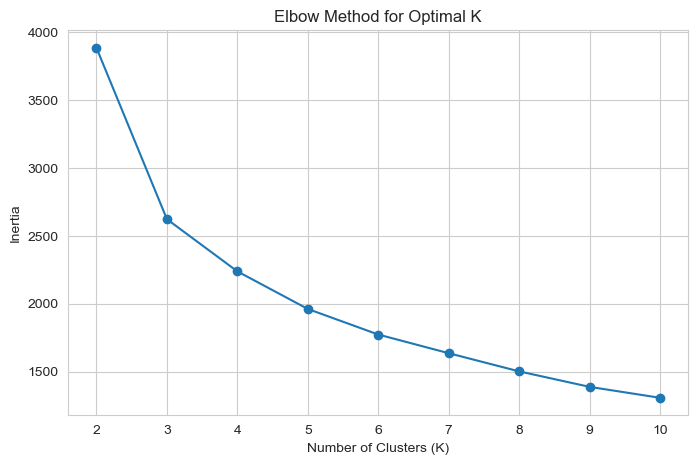

In [814]:
# Apply PCA to reduce dimensions to 2D for visualization
pca = PCA(n_components=2)
pca_transformed = pca.fit_transform(scaled_features[selected_features])
scaled_features['PCA1'] = pca_transformed[:, 0]
scaled_features['PCA2'] = pca_transformed[:, 1]

# Finding optimal K using Elbow Method
inertia = []
k_range = range(2, 11)
for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(scaled_features)
    inertia.append(kmeans.inertia_)

# Plot Elbow Curve
plt.figure(figsize=(8, 5))
plt.plot(k_range, inertia, marker='o', linestyle='-')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal K')
plt.show()

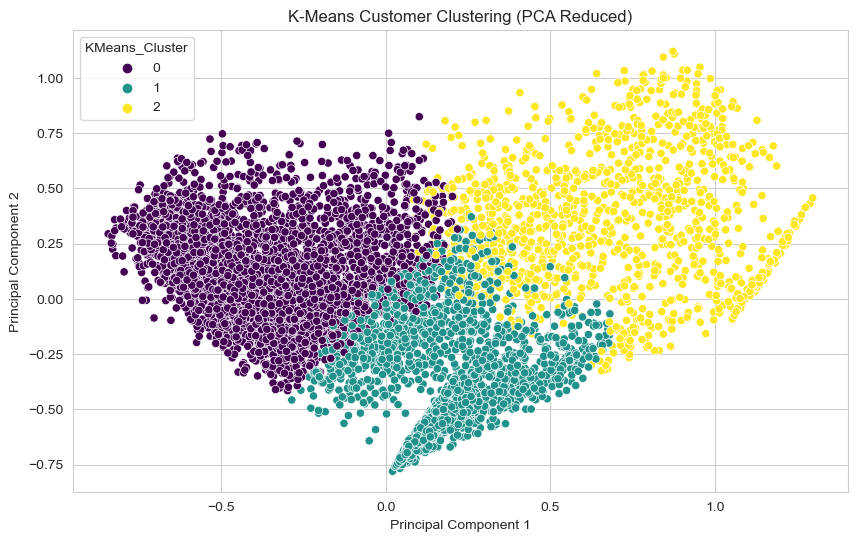

In [815]:
# Apply K-Means Clustering with the optimal K (choose based on elbow curve)
k_optimal = 3  # trying 3 or 4 
kmeans = KMeans(n_clusters=k_optimal, random_state=42, n_init=10)
scaled_features['KMeans_Cluster'] = kmeans.fit_predict(scaled_features[selected_features])

# Visualizing K-Means clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(x=scaled_features['PCA1'], y=scaled_features['PCA2'], hue=scaled_features['KMeans_Cluster'], palette='viridis')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('K-Means Customer Clustering (PCA Reduced)')
plt.show()

In [816]:
# Assign risk levels based on cluster analysis
cluster_labels = scaled_features['KMeans_Cluster'].unique()
risk_mapping = {cluster_labels[0]: 'Low Risk', cluster_labels[1]: 'Medium Risk', cluster_labels[2]: 'High Risk'}  # Dynamically assign risk levels  # Adjust based on analysis
scaled_features['Attrition_Risk'] = scaled_features['KMeans_Cluster'].replace(risk_mapping).astype(str)

# Convert categorical labels to numeric for classification
label_encoder = LabelEncoder()
scaled_features['Attrition_Risk'] = label_encoder.fit_transform(scaled_features['Attrition_Risk'])
print("Unique Attrition Risk Labels:", scaled_features['Attrition_Risk'].unique())

Unique Attrition Risk Labels: [1 2 0]


<h3>DBSCAN</h3>

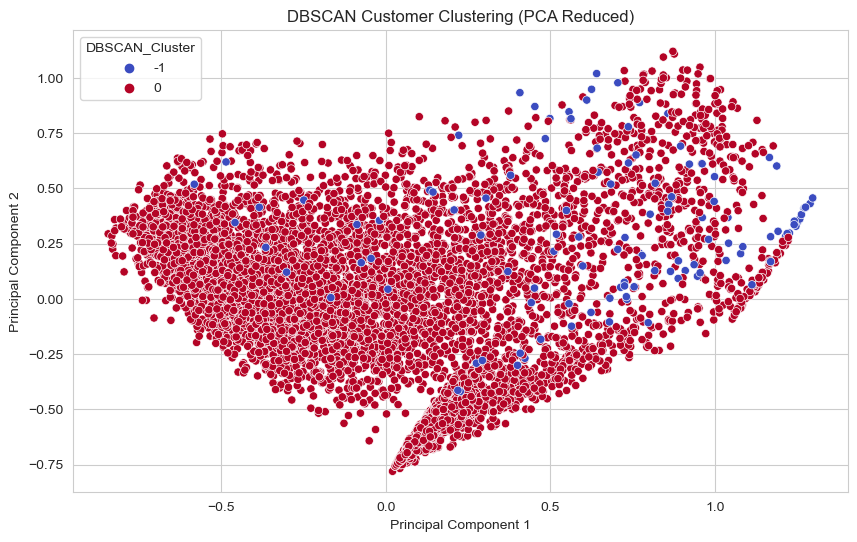

In [817]:
# Apply DBSCAN Clustering
dbscan = DBSCAN(eps=0.3, min_samples=30)  # Adjust parameters as needed
scaled_features['DBSCAN_Cluster'] = dbscan.fit_predict(scaled_features[selected_features])

# Visualizing DBSCAN clusters using PCA components
plt.figure(figsize=(10, 6))
sns.scatterplot(x=scaled_features['PCA1'], y=scaled_features['PCA2'], hue=scaled_features['DBSCAN_Cluster'], palette='coolwarm')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('DBSCAN Customer Clustering (PCA Reduced)')
plt.show()

In [818]:
creditcard_dataset["Predicted_Attrition_Risk"] = scaled_features["KMeans_Cluster"]
creditcard_dataset.head()

CLIENTNUM  Attrition_Flag  Customer_Age  Gender  Dependent_count  \
0  768805383               1            45       1                3   
1  818770008               1            49       0                5   
2  713982108               1            51       1                3   
3  709106358               1            40       1                3   
4  713061558               1            44       1                2   

   Education_Level  Marital_Status  Income_Category  Card_Category  \
0                3               1                2              0   
1                2               2                4              0   
2                2               1                3              0   
3                5               1                2              0   
4                2               1                1              0   

   Months_on_book  ...  Total_Trans_Ct  Total_Ct_Chng_Q4_Q1  \
0              39  ...              42                1.625   
1              44  ...              33                3.714   
2              36  ...              20                2.333   
3              21  ...              28                2.500   
4              36  ...              24                0.846   

   Avg_Utilization_Ratio  Income  percentage_expenditure  \
0                  0.061   64507                1.773451   
1                  0.105   19424                6.646417   
2                  0.000   81518                2.314826   
3                  0.000   62606                1.303389   
4                  0.311   53383                2.038102   

   average_spent_per_transaction  Total_Revolving_Bal_Range  \
0                      27.238095                          7   
1                      39.121212                          7   
2                      94.350000                          8   
3                      29.142857                          8   
4                      45.333333                          6   

   Avg_Open_To_Buy_Range  Pseudo_Credit_Score  Predicted_Attrition_Risk  
0                      6                930.0                         1  
1                      7               1030.0                         1  
2                      8                920.0                         1  
3                      8                710.0                         1  
4                      8                845.0                         0  

[5 rows x 28 columns]

<h1>Base Prediction for Credit Card Attrition</h1>

In [819]:
Xcredit = creditcard_dataset.drop(['Attrition_Flag', 'CLIENTNUM', 'Predicted_Attrition_Risk'], axis=1)
Ycredit = creditcard_dataset['Attrition_Flag']

Xcredit_train, Xcredit_test, Ycredit_train, Ycredit_test = train_test_split(Xcredit, Ycredit, test_size=0.3, random_state=1)

In [820]:
sc = StandardScaler()
Xcredit_train_scaled = sc.fit_transform(Xcredit_train)
Xcredit_test_scaled = sc.transform(Xcredit_test)

# Models used declared earlier for classification
LogReg = LogisticRegression()
DTClassifier = DecisionTreeClassifier()
RFClassifier = RandomForestClassifier()
SVMClassifier = SVC()
KNNClassifier = KNeighborsClassifier()
GBClassifier = GradientBoostingClassifier()
xgb_creditcard = XGBClassifier()

LogReg.fit(Xcredit_train_scaled, Ycredit_train)
Ycredit_log = LogReg.predict(Xcredit_test_scaled)
DTClassifier.fit(Xcredit_train_scaled, Ycredit_train)
Ycredit_dt = DTClassifier.predict(Xcredit_test_scaled)
RFClassifier.fit(Xcredit_train_scaled, Ycredit_train)
Ycredit_rf = RFClassifier.predict(Xcredit_test_scaled)
SVMClassifier.fit(Xcredit_train_scaled, Ycredit_train)
Ycredit_svm = SVMClassifier.predict(Xcredit_test_scaled)
KNNClassifier.fit(Xcredit_train_scaled, Ycredit_train)
Ycredit_knn = KNNClassifier.predict(Xcredit_test_scaled)
GBClassifier.fit(Xcredit_train_scaled, Ycredit_train)
Ycredit_gb = GBClassifier.predict(Xcredit_test_scaled)
xgb_creditcard.fit(Xcredit_train_scaled, Ycredit_train)
Ycredit_xgb = xgb_creditcard.predict(Xcredit_test_scaled)


In [821]:
models = {
    "Logistic Regression": Ycredit_log,
    "Decision Tree": Ycredit_dt,
    "Random Forest": Ycredit_rf,
    "SVM": Ycredit_svm,
    "KNN": Ycredit_knn,
    "Gradient Boosting": Ycredit_gb,
    "XGB": Ycredit_xgb
}


# xk updates (START)
models_proba = {
    "Logistic Regression": LogReg.predict_proba(Xcredit_test_scaled)[:, 1],
    "Decision Tree": DTClassifier.predict_proba(Xcredit_test_scaled)[:, 1],
    "Random Forest": RFClassifier.predict_proba(Xcredit_test_scaled)[:, 1],
#     "SVM": SVMClassifier.predict_proba(Xcredit_test_scaled)[:, 1],  
    "KNN": KNNClassifier.predict_proba(Xcredit_test_scaled)[:, 1],
    "Gradient Boosting": GBClassifier.predict_proba(Xcredit_test_scaled)[:, 1],
    "XGB": xgb_creditcard.predict_proba(Xcredit_test_scaled)[:, 1]
}
# xk updates (END)


for model_name, y_pred in models.items():
    accuracy = accuracy_score(Ycredit_test, y_pred)
    report = classification_report(Ycredit_test, y_pred)
    conf_matrix = confusion_matrix(Ycredit_test, y_pred)
    f1 = f1_score(Ycredit_test, y_pred)

    print(f"\nModel: {model_name}")
    print(f"Validation Accuracy: {accuracy:.4f}")
    print("F1 Score: ", f1)    
    print("\nClassification Report:\n", report)
    print("\nConfusion Matrix:\n", conf_matrix)
    print("=" * 50)  # Separator for better readability


#XGBoost Classifier has the highest accuracy score


Model: Logistic Regression
Validation Accuracy: 0.9068
F1 Score:  0.9459016393442623

Classification Report:
               precision    recall  f1-score   support

           0       0.76      0.59      0.66       331
           1       0.93      0.96      0.95      1794

    accuracy                           0.91      2125
   macro avg       0.84      0.78      0.81      2125
weighted avg       0.90      0.91      0.90      2125


Confusion Matrix:
 [[ 196  135]
 [  63 1731]]

Model: Decision Tree
Validation Accuracy: 0.9252
F1 Score:  0.9555989946942195

Classification Report:
               precision    recall  f1-score   support

           0       0.75      0.77      0.76       331
           1       0.96      0.95      0.96      1794

    accuracy                           0.93      2125
   macro avg       0.86      0.86      0.86      2125
weighted avg       0.93      0.93      0.93      2125


Confusion Matrix:
 [[ 255   76]
 [  83 1711]]

Model: Random Forest
Validation Acc

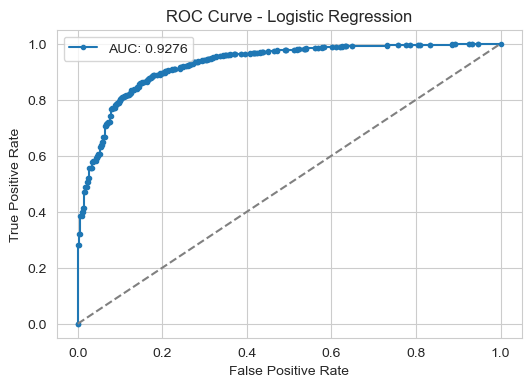

AUC for Logistic Regression: 0.9276


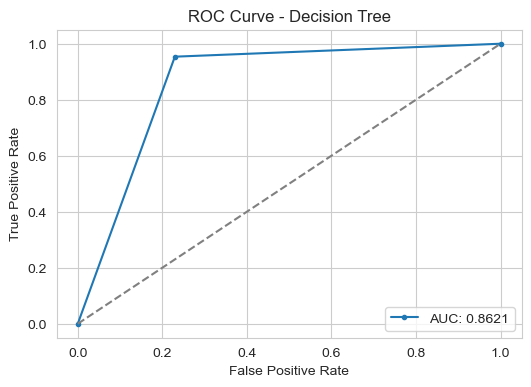

AUC for Decision Tree: 0.8621


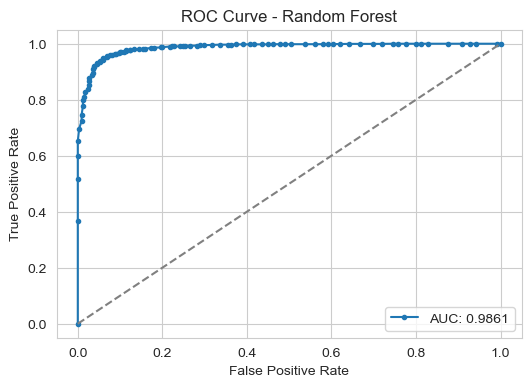

AUC for Random Forest: 0.9861


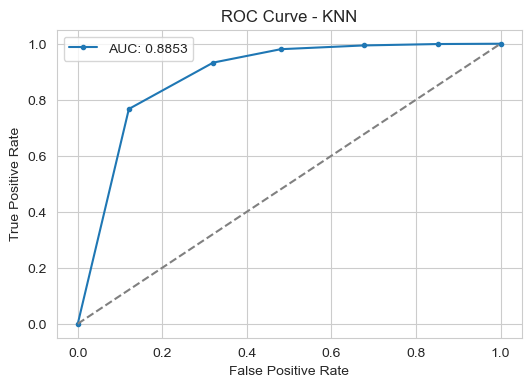

AUC for KNN: 0.8853


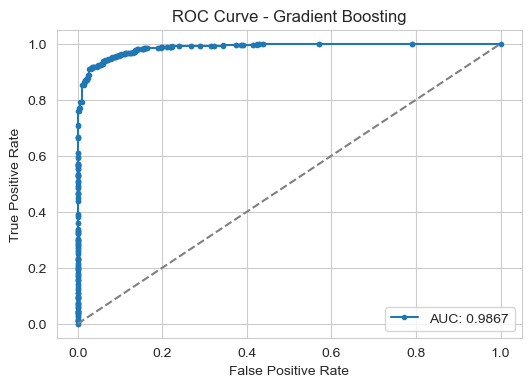

AUC for Gradient Boosting: 0.9867


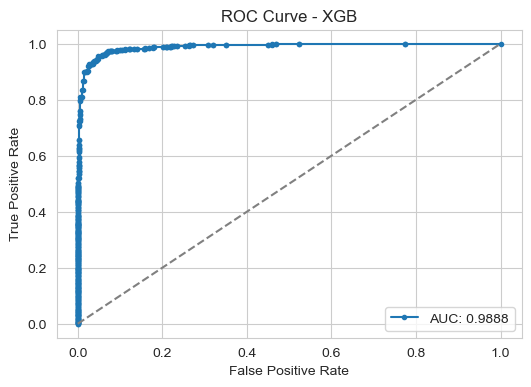

AUC for XGB: 0.9888


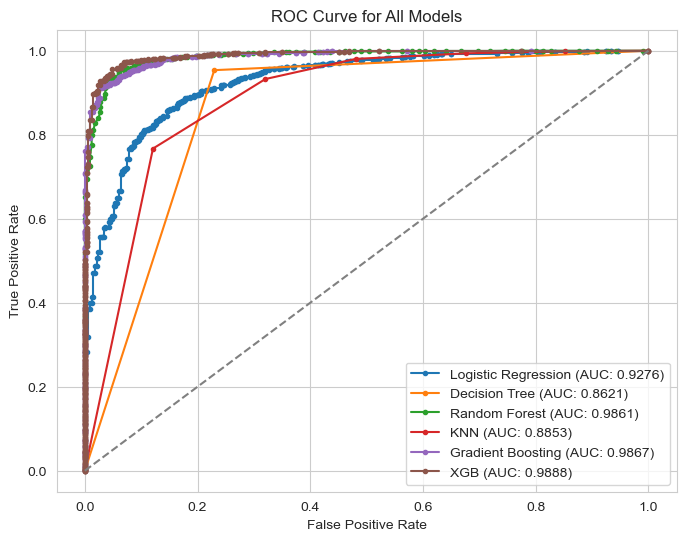

In [822]:
# Plot individual ROC graph
for model_name, y_pred_proba in models_proba.items():
    fpr, tpr, thresholds = roc_curve(Ycredit_test, y_pred_proba)  
    auc_value = auc(fpr, tpr)

    # Plot ROC curve
    plt.figure(figsize=(6, 4))
    plt.plot(fpr, tpr, marker='.', label=f"AUC: {auc_value:.4f}")
    plt.plot([0, 1], [0, 1], linestyle='--', color='gray') 
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'ROC Curve - {model_name}')
    plt.legend()
    plt.show()
    
     # Print AUC value
    print(f"AUC for {model_name}: {auc_value:.4f}") 

# Plot combined ROC curve for all models
plt.figure(figsize=(8, 6)) 
for model_name, y_pred_proba in models_proba.items():
    fpr, tpr, thresholds = roc_curve(Ycredit_test, y_pred_proba)
    auc_value = auc(fpr, tpr)
    plt.plot(fpr, tpr, marker='.', label=f"{model_name} (AUC: {auc_value:.4f})")

plt.plot([0, 1], [0, 1], linestyle='--', color='gray')  # Diagonal reference
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for All Models')
plt.legend()
plt.show()


In [823]:
# # Xcredit_train, Xcredit_test, Ycredit_train, Ycredit_test = train_test_split(Xcredit, Ycredit, test_size=0.3, random_state=1)



# print("CREDIT CARD ATTRITION DATASET")

# # Define your samplers (use None for the Original data)
# samplers = {
#     'Original': None,
#     'Undersampling (70:30)': RandomUnderSampler(sampling_strategy=0.43, random_state=42),
#     'SMOTE (70:30)': SMOTE(sampling_strategy=0.43, random_state=42),
#     'SMOTETomek (70:30)': SMOTETomek(sampling_strategy=0.43, random_state=42),
#     'SMOTEENN (70:30)': SMOTEENN(sampling_strategy=0.43, random_state=42),
#     'Undersampling (50:50)': RandomUnderSampler(sampling_strategy=1.0, random_state=42),
#     'SMOTE (50:50)': SMOTE(sampling_strategy=1.0, random_state=42),
#     'SMOTETomek (50:50)': SMOTETomek(sampling_strategy=1.0, random_state=42),
#     'SMOTEENN (50:50)': SMOTEENN(sampling_strategy=1.0, random_state=42)
# }

# # Define your models
# models = {
#     "Logistic Regression": LogReg,
#     "Decision Tree": DTClassifier,
#     "Random Forest": RFClassifier,
#     "SVM": SVMClassifier,
#     "KNN": KNNClassifier,
#     "Gradient Boosting": GBClassifier,
#     "XGB": xgb_creditcard
# }

# # Loop over each sampler and model combination
# for sampler_name, sampler in samplers.items():
#     print(f"\nResampling Method: {sampler_name}")
#     for model_name, model_instance in models.items():
#         # Build a pipeline: if no sampler, only include the classifier.
#         if sampler is not None:
#             pipe = Pipeline([
#                 ('sampler', sampler),
#                 ('classifier', model_instance)
#             ])
#         else:
#             pipe = Pipeline([
#                 ('classifier', model_instance)
#             ])
        
#         #Scale the data    
#         sc = StandardScaler()
#         Xcredit_train = sc.fit_transform(Xcredit_train)
#         Xcredit_test = sc.transform(Xcredit_test)    
        
#         # Train on the (resampled) training data
#         pipe.fit(Xcredit_train, Ycredit_train)
        
#         # Predict on the test data (test set remains unchanged)
#         y_pred = pipe.predict(Xcredit_test)
#         acc = accuracy_score(Ycredit_test, y_pred)
#         print(f"Model: {model_name} Accuracy: {acc:.3f}")
#         print(classification_report(Ycredit_test, y_pred))
#         print("=" * 50)
        
#         #Credit Card Attrition Dataset
#         #Resampling Method: SMOTETomek (70:30)
#         #XGBoost Classifier has the highest accuracy score

In [824]:
results = []

# Define samplers (use None for the Original data)
samplers = {
    'Undersampling (70:30)': RandomUnderSampler(sampling_strategy=0.43, random_state=1),
    'SMOTE (70:30)': SMOTE(sampling_strategy=0.43, random_state=1),
    'SMOTETomek (70:30)': SMOTETomek(sampling_strategy=0.43, random_state=1),
    'SMOTEENN (70:30)': SMOTEENN(sampling_strategy=0.43, random_state=1),
    # 'Undersampling (50:50)': RandomUnderSampler(sampling_strategy=1.0, random_state=42),
    # 'SMOTE (50:50)': SMOTE(sampling_strategy=1.0, random_state=42),
    # 'SMOTETomek (50:50)': SMOTETomek(sampling_strategy=1.0, random_state=42),
    # 'SMOTEENN (50:50)': SMOTEENN(sampling_strategy=1.0, random_state=42)
}


# Define models
models = {
    "Logistic Regression": LogReg,
    "Decision Tree": DTClassifier,
    "Random Forest": RFClassifier,
    "SVM": SVMClassifier,
    "KNN": KNNClassifier,
    "Gradient Boosting": GBClassifier,
    "XGB": xgb_creditcard
}


# Loop over each sampler and model combination
for sampler_name, sampler in samplers.items():
    for model_name, model_instance in models.items():
        # Build a pipeline: if no sampler, only include classifier
        if sampler is not None:
            pipe = Pipeline([
                ('sampler', sampler),
                ('classifier', model_instance)
            ])
        else:
            pipe = Pipeline([
                ('classifier', model_instance)
            ])
            
        # Scale the data
        sc = StandardScaler()
        Xcredit_train_scaled = sc.fit_transform(Xcredit_train)
        Xcredit_test_scaled = sc.transform(Xcredit_test)    
            
        # Train on the (resampled) training data
        pipe.fit(Xcredit_train_scaled, Ycredit_train)
        # Predict on the test data (test set remains unchanged)
        y_pred = pipe.predict(Xcredit_test_scaled)
        acc = accuracy_score(Ycredit_test, y_pred)
        f1 = f1_score(Ycredit_test, y_pred, average='binary')

        results.append({
            'Resampling': sampler_name,
            'Model': model_name,
            'Accuracy': acc,
            'F1': f1,
            'Pipeline': pipe  # Saving the pipeline might be useful later
        })

# Convert the results into a DataFrame
results_df = pd.DataFrame(results)

# To get the best model based on accuracy
best_pipeline = results_df.sort_values(by=['Accuracy'], ascending=False).head(1)
print("\nBest performing model:")
print(best_pipeline)

# best_df = best_pipeline['Pipeline'].values[0]
# print(best_df)


 #Loan Fraud Dataset
        #SMOTEENN (70/30) 
        #Model: Gradient Boosting Accuracy: 0.841333



Best performing model:
            Resampling Model  Accuracy        F1  \
20  SMOTETomek (70:30)   XGB  0.965647  0.979739   

                                             Pipeline  
20  (SMOTETomek(random_state=1, sampling_strategy=...  


In [825]:
#Utilising sampled data for prediction

best_sample = SMOTETomek(sampling_strategy=0.43, random_state=42)
Xcredit_samp, Ycredit_samp = best_sample.fit_resample(Xcredit, Ycredit)

Xcredit_samp_train, Xcredit_samp_test, Ycredit_samp_train, Ycredit_samp_test = train_test_split(Xcredit_samp, Ycredit_samp, test_size=0.3, random_state=1)

Xcredit_samp_train_scaled = sc.fit_transform(Xcredit_samp_train)
Xcredit_samp_test_scaled = sc.transform(Xcredit_samp_test)

xgb_creditcard.fit(Xcredit_samp_train_scaled, Ycredit_samp_train)
Ycredit_samp_xgb = xgb_creditcard.predict(Xcredit_samp_test_scaled)

pd.DataFrame({'Actual': Ycredit_samp_test, 'Predicted': Ycredit_samp_xgb})


# #Since XGBoost Classifier has the highest accuracy score, we will use it for the resampled dataset
# XGBClassifier.fit(Xcredit_samp_train, Ycredit_samp_train)




Actual  Predicted
311        1          1
3925       1          1
7895       0          0
2421       1          1
4593       1          1
...      ...        ...
5586       1          1
1556       1          1
1577       1          1
453        1          1
694        1          1

[2445 rows x 2 columns]

In [826]:
sampleCredit_accuracy = accuracy_score(Ycredit_samp_test, Ycredit_samp_xgb)
sampleCredit_report = classification_report(Ycredit_samp_test, Ycredit_samp_xgb)
sampleCredit_conf_matrix = confusion_matrix(Ycredit_samp_test, Ycredit_samp_xgb)
f1 = f1_score(Ycredit_samp_test, Ycredit_samp_xgb)

print("Validation Accuracy:", sampleCredit_accuracy)
print("F1 Score: ", f1)
print("\nClassification Report:\n", sampleCredit_report)
print("\nConfusion Matrix:\n", sampleCredit_conf_matrix)

Validation Accuracy: 0.9697341513292433
F1 Score:  0.9787600459242249

Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.94      0.95       707
           1       0.98      0.98      0.98      1738

    accuracy                           0.97      2445
   macro avg       0.96      0.96      0.96      2445
weighted avg       0.97      0.97      0.97      2445


Confusion Matrix:
 [[ 666   41]
 [  33 1705]]


Index(['Gender', 'Dependent_count', 'Education_Level', 'Marital_Status',
       'Income_Category', 'Card_Category', 'Months_on_book',
       'Total_Relationship_Count', 'Months_Inactive_12_mon',
       'Contacts_Count_12_mon', 'Credit_Limit', 'Total_Revolving_Bal',
       'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt',
       'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio',
       'Income', 'percentage_expenditure', 'average_spent_per_transaction',
       'Total_Revolving_Bal_Range', 'Avg_Open_To_Buy_Range',
       'Pseudo_Credit_Score'],
      dtype='object')
{'Gender': 0.004549019607843185, 'Dependent_count': -0.00040784313725488185, 'Education_Level': -0.001458823529411742, 'Marital_Status': -0.0013647058823529124, 'Income_Category': -0.0002980392156862373, 'Card_Category': -0.0006274509803921413, 'Months_on_book': 3.1372549019618536e-05, 'Total_Relationship_Count': 0.0005647058823530041, 'Months_Inactive_12_mon': 0.01709803921568633, 'Contacts_Count_1

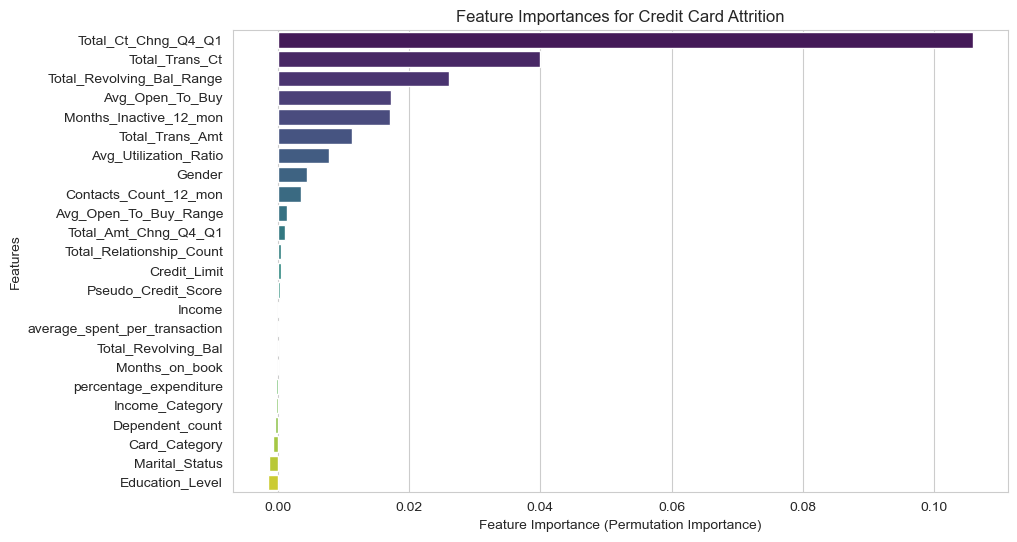

In [827]:
xgbCredit_featimpt = xgb_creditcard.fit(Xcredit_train, Ycredit_train)

# Calculate feature importances using permutation importance
perm_importance = permutation_importance(xgbCredit_featimpt, Xcredit_test, Ycredit_test, n_repeats=30, random_state=1)
#print(perm_importance)

# Extract and store feature importances
importance_scores = perm_importance.importances_mean
feature_names = Xcredit_train.columns[1:]  # Assuming processedDf contains your data with column names
feature_importances = dict(zip(feature_names, importance_scores))

# Sort feature importances
sorted_feature_importances = dict(sorted(feature_importances.items(), key=lambda x: x[1], reverse=True))
print(feature_names)
print(feature_importances)
print(sorted_feature_importances)

# Create a bar plot of feature importances
plt.figure(figsize=(10, 6))
sns.barplot(x=list(sorted_feature_importances.values()), y=list(sorted_feature_importances.keys()), palette='viridis')
plt.xlabel('Feature Importance (Permutation Importance)')
plt.ylabel('Features')
plt.title('Feature Importances for Credit Card Attrition')
plt.show()

#Results show negative correlation for existing liabilities
#Results also show little to no correlation on device information and location of application

In [828]:
Xcredit_feat = creditcard_dataset.drop(['Card_Category', 'Marital_Status', 'Months_on_book', 'Pseudo_Credit_Score', 'Education_Level', 'Attrition_Flag'], axis=1) 
Ycredit_feat = creditcard_dataset['Attrition_Flag']

Xcredit_feat_train, Xcredit_feat_test, Ycredit_feat_train, Ycredit_feat_test = train_test_split(Xcredit_feat, Ycredit_feat, test_size=0.3, random_state=1)

In [829]:
sc = StandardScaler()
Xcredit_feat_train_scaled = sc.fit_transform(Xcredit_feat_train)
Xcredit_feat_test_scaled = sc.transform(Xcredit_feat_test)

xgb_creditcard.fit(Xcredit_feat_train_scaled, Ycredit_feat_train)
Ycredit_feat_xgb = xgb_creditcard.predict(Xcredit_feat_test_scaled)

In [830]:
accuracy = accuracy_score(Ycredit_feat_test, Ycredit_feat_xgb) # Accuracy classification score
report = classification_report(Ycredit_feat_test, Ycredit_feat_xgb)
conf_matrix = confusion_matrix(Ycredit_feat_test, Ycredit_feat_xgb)
f1 = f1_score(Ycredit_feat_test, Ycredit_feat_xgb)

print("Accuracy: ", accuracy)
print("F1 Score: ", f1)
print(report)
print(conf_matrix)

Accuracy:  0.9642352941176471
F1 Score:  0.9789240155296728
              precision    recall  f1-score   support

           0       0.91      0.86      0.88       331
           1       0.97      0.98      0.98      1794

    accuracy                           0.96      2125
   macro avg       0.94      0.92      0.93      2125
weighted avg       0.96      0.96      0.96      2125

[[ 284   47]
 [  29 1765]]


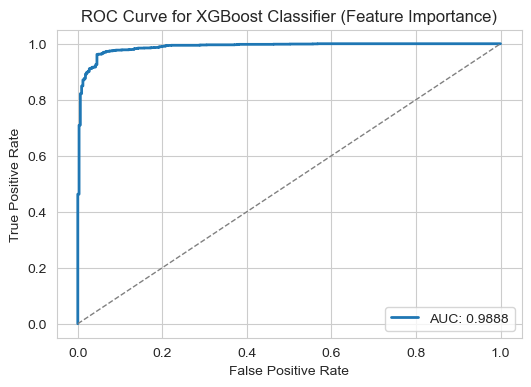

AUC for [0.9930627  0.996338   0.07373835 ... 0.9999242  0.9989599  0.9994916 ]: 0.9888


In [831]:
# xk updates (START)

cred_featimpt_xgbprob = xgb_creditcard.predict_proba(Xcredit_feat_test_scaled)[:, 1]

# Compute False Positive Rate (FPR) and True Positive Rate (TPR)
fpr, tpr, _ = roc_curve(Ycredit_feat_test, cred_featimpt_xgbprob)
auc_value = auc(fpr, tpr)

# Plot ROC Curve
plt.figure(figsize=(6, 4))
plt.plot(fpr, tpr, label=f"AUC: {auc_value:.4f}", linewidth=2)
plt.plot([0, 1], [0, 1], linestyle='--', color='gray', linewidth=1)  # Reference Line
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title(f'ROC Curve for XGBoost Classifier (Feature Importance)')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

# Print AUC value
print(f"AUC for {cred_featimpt_xgbprob}: {auc_value:.4f}")

# xk updates (END)

In [832]:
#So we have compared the base prediction model with the feature importance model and the feature importance model has a higher accuracy score, however, 
#since we are going for a more generalized model closely tied with in real life scenarios, we will use the base prediction model for the credit card attrition dataset
#on top of that, we have also used the SMOTETomek resampling method for the credit card attrition dataset to improve the accuracy score, beating that of feature importance as well
#which is why we will be doing hyperparameter tuning to the model and use it for our final prediction model to be used in our input prediction

In [833]:
#Hyperparameter Tuning for XGBClassifier for Credit Card

param_grid = {
    'n_estimators': [100, 200, 300, 500],
    'learning_rate': [0.01, 0.05, 0.1, 0.2],
    'max_depth': [3, 5, 7, 9],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'subsample': [0.8, 0.9, 1.0],
    'max_features': ['sqrt', 'log2', None]
}

random_search = RandomizedSearchCV(estimator=xgb_creditcard,
                                 param_distributions=param_grid,
                                 n_iter=20,
                                 cv=5,
                                 n_jobs=-1,
                                 verbose=2,
                                 random_state=42,
                                 scoring='f1')

random_search.fit(Xcredit_samp_train_scaled, Ycredit_samp_train)

print("Best parameters found:", random_search.best_params_)

best_model_credit = random_search.best_estimator_

y_pred = best_model_credit.predict(Xcredit_samp_test_scaled)
print("\nBest Model Results:")
print("Accuracy:", accuracy_score(Ycredit_samp_test, y_pred))
print("F1 Score:", f1_score(Ycredit_samp_test, y_pred))
print("\nClassification Report:")
print(classification_report(Ycredit_samp_test, y_pred))

# Best Model Results:
# Accuracy: 0.966588  
# F1 Score: 0.980272   

joblib.dump(best_model_credit, 'CreditCard_Attr.pkl')


Fitting 5 folds for each of 20 candidates, totalling 100 fits


c:\Users\xuanw\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:35:57] WARNING: C:\b\abs_0fh_d4x2ng\croot\xgboost-split_1713973188995\work\cpp_src\src\learner.cc:742: 
Parameters: { "max_features", "min_samples_leaf", "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)


Best parameters found: {'subsample': 0.9, 'n_estimators': 500, 'min_samples_split': 10, 'min_samples_leaf': 4, 'max_features': 'log2', 'max_depth': 5, 'learning_rate': 0.2}

Best Model Results:
Accuracy: 0.9734151329243353
F1 Score: 0.9813164702500718

Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.95      0.95       707
           1       0.98      0.98      0.98      1738

    accuracy                           0.97      2445
   macro avg       0.97      0.97      0.97      2445
weighted avg       0.97      0.97      0.97      2445



['CreditCard_Attr.pkl']

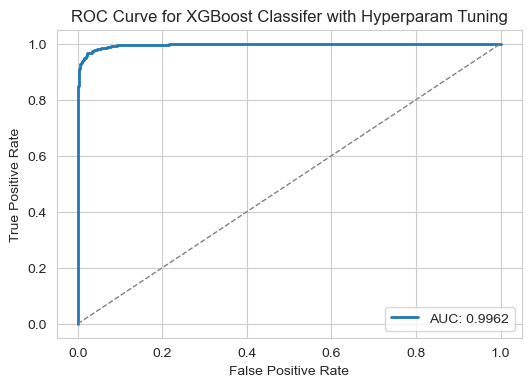

AUC for [0.9999474  0.9999672  0.00386185 ... 0.99500483 0.9999995  0.98537827]: 0.9962


In [834]:
# xk updates (START)

cred_hyperparam_xgbprob = best_model_credit.predict_proba(Xcredit_samp_test_scaled)[:, 1]

# Compute False Positive Rate (FPR) and True Positive Rate (TPR)
fpr, tpr, _ = roc_curve(Ycredit_samp_test, cred_hyperparam_xgbprob)
auc_value = auc(fpr, tpr)

# Plot ROC Curve
plt.figure(figsize=(6, 4))
plt.plot(fpr, tpr, label=f"AUC: {auc_value:.4f}", linewidth=2)
plt.plot([0, 1], [0, 1], linestyle='--', color='gray', linewidth=1)  # Reference Line
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title(f'ROC Curve for XGBoost Classifer with Hyperparam Tuning')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

# Print AUC value
print(f"AUC for {cred_hyperparam_xgbprob}: {auc_value:.4f}")

# xk updates (END)


Mappings for Attrition_Flag:
Attrited Customer -> 0
Existing Customer -> 1

Mappings for Gender:
F -> 0
M -> 1

Mappings for Education_Level:
College -> 0
Doctorate -> 1
Graduate -> 2
High School -> 3
Post-Graduate -> 4
Uneducated -> 5

Mappings for Marital_Status:
Divorced -> 0
Married -> 1
Single -> 2

Mappings for Income_Category:
$120K + -> 0
$40K - $60K -> 1
$60K - $80K -> 2
$80K - $120K -> 3
Less than $40K -> 4

Mappings for Card_Category:
Blue -> 0
Gold -> 1
Platinum -> 2
Silver -> 3

In [835]:
#Input Prediction Record

creditcard_customer = [[    
    45,   # Customer_Age
    1,    # Gender (assuming 1 = Male, 0 = Female)
    2,    # Dependent_count
    3,    # Education_Level (Encoded categorical)
    1,    # Marital_Status (Encoded categorical)
    4,    # Income_Category (Encoded categorical)
    2,    # Card_Category (Encoded categorical)
    24,   # Months_on_book
    3,    # Total_Relationship_Count
    1,    # Months_Inactive_12_mon
    3,    # Contacts_Count_12_mon
    12000.0,  # Credit_Limit
    2000, # Total_Revolving_Bal
    10000.0, # Avg_Open_To_Buy
    1.5,  # Total_Amt_Chng_Q4_Q1
    5000, # Total_Trans_Amt
    50,   # Total_Trans_Ct
    1.2,  # Total_Ct_Chng_Q4_Q1
    0.35, # Avg_Utilization_Ratio
    75000,  # Income
    0.25, # percentage_expenditure
    120.0, # average_spent_per_transaction
    2,    # Total_Revolving_Bal_Range (Encoded categorical)
    3,    # Avg_Open_To_Buy_Range (Encoded categorical)
    720.5, # Pseudo_Credit_Score
    ]]

In [836]:
# from sklearn.ensemble import GradientBoostingClassifier

sc = StandardScaler()
Xcredit_samp_train_scaled = sc.fit_transform(Xcredit_samp_train)
creditcard_customer_scaled = sc.transform(creditcard_customer)
joblib.dump(sc, 'credit_scaler.pkl')

# gbc_loaninput = GradientBoostingClassifier()
# gbc_loaninput.fit(Xacc_samp_train_scaled, Yacc_samp_train)

predictedFraud = best_model_credit.predict(creditcard_customer_scaled)
pd.DataFrame({'Predicted': predictedFraud})

print("Customer is predicted to be:", "Attrited" if predictedFraud[0] == 0 else "Not Attrited")

Customer is predicted to be: Not Attrited


c:\Users\xuanw\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


<h2>Card Recommendation</h2>

In [837]:
creditcard_dataset.head()

CLIENTNUM  Attrition_Flag  Customer_Age  Gender  Dependent_count  \
0  768805383               1            45       1                3   
1  818770008               1            49       0                5   
2  713982108               1            51       1                3   
3  709106358               1            40       1                3   
4  713061558               1            44       1                2   

   Education_Level  Marital_Status  Income_Category  Card_Category  \
0                3               1                2              0   
1                2               2                4              0   
2                2               1                3              0   
3                5               1                2              0   
4                2               1                1              0   

   Months_on_book  ...  Total_Trans_Ct  Total_Ct_Chng_Q4_Q1  \
0              39  ...              42                1.625   
1              44  ...              33                3.714   
2              36  ...              20                2.333   
3              21  ...              28                2.500   
4              36  ...              24                0.846   

   Avg_Utilization_Ratio  Income  percentage_expenditure  \
0                  0.061   64507                1.773451   
1                  0.105   19424                6.646417   
2                  0.000   81518                2.314826   
3                  0.000   62606                1.303389   
4                  0.311   53383                2.038102   

   average_spent_per_transaction  Total_Revolving_Bal_Range  \
0                      27.238095                          7   
1                      39.121212                          7   
2                      94.350000                          8   
3                      29.142857                          8   
4                      45.333333                          6   

   Avg_Open_To_Buy_Range  Pseudo_Credit_Score  Predicted_Attrition_Risk  
0                      6                930.0                         1  
1                      7               1030.0                         1  
2                      8                920.0                         1  
3                      8                710.0                         1  
4                      8                845.0                         0  

[5 rows x 28 columns]

In [838]:
Xcredit.head()

Customer_Age  Gender  Dependent_count  Education_Level  Marital_Status  \
0            45       1                3                3               1   
1            49       0                5                2               2   
2            51       1                3                2               1   
3            40       1                3                5               1   
4            44       1                2                2               1   

   Income_Category  Card_Category  Months_on_book  Total_Relationship_Count  \
0                2              0              39                         5   
1                4              0              44                         6   
2                3              0              36                         4   
3                2              0              21                         5   
4                1              0              36                         3   

   Months_Inactive_12_mon  ...  Total_Trans_Amt  Total_Trans_Ct  \
0                       1  ...             1144              42   
1                       1  ...             1291              33   
2                       1  ...             1887              20   
3                       1  ...              816              28   
4                       1  ...             1088              24   

   Total_Ct_Chng_Q4_Q1  Avg_Utilization_Ratio  Income  percentage_expenditure  \
0                1.625                  0.061   64507                1.773451   
1                3.714                  0.105   19424                6.646417   
2                2.333                  0.000   81518                2.314826   
3                2.500                  0.000   62606                1.303389   
4                0.846                  0.311   53383                2.038102   

   average_spent_per_transaction  Total_Revolving_Bal_Range  \
0                      27.238095                          7   
1                      39.121212                          7   
2                      94.350000                          8   
3                      29.142857                          8   
4                      45.333333                          6   

   Avg_Open_To_Buy_Range  Pseudo_Credit_Score  
0                      6                930.0  
1                      7               1030.0  
2                      8                920.0  
3                      8                710.0  
4                      8                845.0  

[5 rows x 25 columns]

In [839]:
Ycredit.head()

0    1
1    1
2    1
3    1
4    1
Name: Attrition_Flag, dtype: int32

There are no rows where Attrition_Flag == 0.


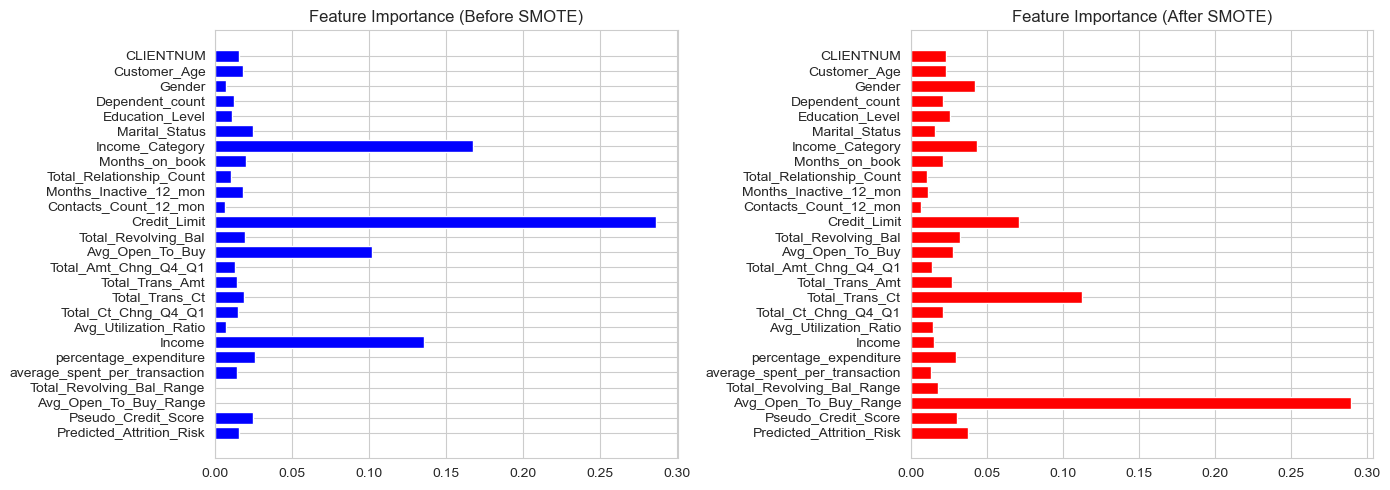

In [840]:

# #Do feature importance on og data set first
# creditcardReco_dataset = creditcard_dataset

# #Do smote to get the sample then feature importance
# creditcardReco_dataset = SMOTE(k_neighbors=3)

# Filter dataset to only include rows where Attrition_Flag == 1, this is done to learn from postive examples where cards given were correct as customers stayed
creditcard_dataset_filtered = creditcard_dataset[creditcard_dataset['Attrition_Flag'] == 1]

if (creditcard_dataset_filtered['Attrition_Flag'] == 0).any():
    print("There are still rows where Attrition_Flag == 0.")
else:
    print("There are no rows where Attrition_Flag == 0.")

# Now separate features (X) and target (y)
X = creditcard_dataset_filtered.drop(columns=["Card_Category", "Attrition_Flag"])  # Features
y = creditcard_dataset_filtered["Card_Category"]  # Target

# Split into train & test
X_credtrain, X_credtest, y_credtrain, y_credtest = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a model on the filtered data using XGBoost
xgb = XGBClassifier(random_state=42)
xgb.fit(X_credtrain, y_credtrain)

# Get feature importance (Before SMOTE)
feat_importance_before = xgb.feature_importances_

# Step 2: Apply SMOTE to balance dataset
smote = SMOTE(k_neighbors=3, random_state=42)
X_credresampled, y_credresampled = smote.fit_resample(X, y)

# Split resampled data
X_credtrain_res, X_credtest_res, y_credtrain_res, y_credtest_res = train_test_split(X_credresampled, y_credresampled, test_size=0.2, random_state=42)

# Train XGBoost model again on SMOTE dataset
xgb_resampled = XGBClassifier(random_state=42)
xgb_resampled.fit(X_credtrain_res, y_credtrain_res)

# Get feature importance (After SMOTE)
feat_importance_after = xgb_resampled.feature_importances_

# Step 3: Plot Feature Importance Before & After SMOTE
feature_names = X.columns
fig, ax = plt.subplots(1, 2, figsize=(14, 5))

# Before SMOTE
ax[0].barh(feature_names, feat_importance_before, color="blue")
ax[0].set_title("Feature Importance (Before SMOTE)")
ax[0].invert_yaxis()

# After SMOTE
ax[1].barh(feature_names, feat_importance_after, color="red")
ax[1].set_title("Feature Importance (After SMOTE)")
ax[1].invert_yaxis()

plt.tight_layout()
plt.show()


In [841]:

# Select the features from X_credtrain_res
X_train_selected = X_credtrain_res[['Customer_Age', 'Gender', 'Income_Category', 'Education_Level', 'Credit_Limit']]

# Display the selected features in the training data
print(X_train_selected.head())

# Select the features from X_credtest_res
X_test_selected = X_credtest_res[['Customer_Age', 'Gender', 'Income_Category', 'Education_Level', 'Credit_Limit']]

print("Unique values in 'Customer_Age':", X_credtrain_res['Customer_Age'].unique())
print("Unique values in 'Gender':", X_credtrain_res['Gender'].unique())
print("Unique values in 'Income_Category':", X_credtrain_res['Income_Category'].unique())
print("Unique values in 'Education_Level':", X_credtrain_res['Education_Level'].unique())
print("Unique values in 'Credit_Limit':", X_credtrain_res['Credit_Limit'].unique())

# Display the selected features in the test data
print(X_test_selected.head())

# Train XGBClassifier on the selected features
xgb_model = XGBClassifier(random_state=42)
xgb_model.fit(X_train_selected, y_credtrain_res)  # Train using the resampled training data

# Predict on the test data
y_pred = xgb_model.predict(X_test_selected)

# Print the classification report and accuracy score
print("Classification Report:")
print(classification_report(y_credtest_res, y_pred))
print("Accuracy Score:", accuracy_score(y_credtest_res, y_pred))

# Save the trained model
joblib.dump(xgb_model, 'Card_Reco_Sys.pkl')

       Customer_Age  Gender  Income_Category  Education_Level  Credit_Limit
6151             36       1                1                0  25097.865865
15491            44       0                3                2  22297.546659
16945            43       1                1                2  34516.000000
7834             40       1                1                0   5710.335788
21577            51       1                2                2  34516.000000
Unique values in 'Customer_Age': [36 44 43 40 51 47 48 58 42 39 41 54 46 56 52 45 49 50 27 53 61 37 55 38
 57 34 31 60 29 63 35 59 26 62 30 65 32 33 28 66 64 67 73 70]
Unique values in 'Gender': [1 0]
Unique values in 'Income_Category': [1 3 2 4 0]
Unique values in 'Education_Level': [0 2 4 3 1 5]
Unique values in 'Credit_Limit': [25097.86586483 22297.54665912 34516.         ... 21124.22131343
 11476.          5645.        ]
       Customer_Age  Gender  Income_Category  Education_Level  Credit_Limit
15245            43       1            

['Card_Reco_Sys.pkl']

In [842]:
# Mappings for categorical columns
gender_mapping = {'F': 0, 'M': 1}
income_category_mapping = {'$120K +': 0, '$40K - $60K': 1, '$60K - $80K': 2, '$80K - $120K': 3, 'Less than $40K': 4}
education_level_mapping = {'College': 0, 'Doctorate': 1, 'Graduate': 2, 'High School': 3, 'Post-Graduate': 4, 'Uneducated': 5}

# Function to load the model and predict card category
def predict_card_category(customer_age, gender, income_category, education_level, credit_limit):
    # Load the trained model
    model = joblib.load('Card_Reco_Sys.pkl')
    
    # Map the input categorical values to numeric values
    gender = gender_mapping.get(gender, -1)  # Use -1 or any other value for invalid inputs
    income_category = income_category_mapping.get(income_category, -1) #apparently -1 is a safety fallback incase nth comes bakc
    education_level = education_level_mapping.get(education_level, -1)

    # Create a DataFrame with the input values
    input_data = pd.DataFrame({
        'Customer_Age': [customer_age],
        'Gender': [gender],
        'Income_Category': [income_category],
        'Education_Level': [education_level],
        'Credit_Limit': [credit_limit]
    })
    
    # Predict the card category using the loaded model
    card_category = model.predict(input_data)
    
    # Return the predicted card category
    return card_category[0]

# Example usage
customer_age = 35
gender = '0'  # This should match the encoding used in training
income_category = '3'  # This should match the encoding used in training
education_level = '3'  # This should match the encoding used in training
credit_limit = 50000

# Predict the card category
predicted_category = predict_card_category(customer_age, gender, income_category, education_level, credit_limit)
print(f"Predicted Card Category: {predicted_category}")


Predicted Card Category: 3


In [843]:
creditrisk_dataset = creditcard_dataset.drop(['Attrition_Flag', 'CLIENTNUM'], axis=1)

[1 0 2]


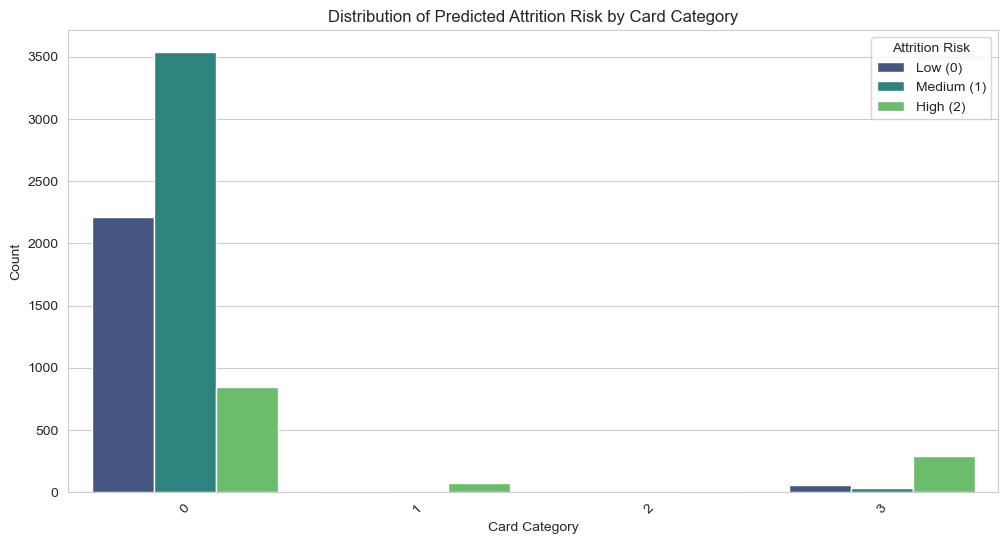

In [844]:
# #gLEN
print(creditrisk_dataset["Predicted_Attrition_Risk"].unique())
# Create the barplot
# Ensure "Predicted Attrition Risk" is categorical
creditrisk_dataset["Predicted_Attrition_Risk"] = creditrisk_dataset["Predicted_Attrition_Risk"].astype(str)

# Create the barplot
plt.figure(figsize=(12, 6))
sns.countplot(data=creditrisk_dataset, x="Card_Category", hue="Predicted_Attrition_Risk", palette="viridis")

# Labeling
plt.xlabel("Card Category")
plt.ylabel("Count")
plt.title("Distribution of Predicted Attrition Risk by Card Category")
plt.legend(title="Attrition Risk", labels=["Low (0)", "Medium (1)", "High (2)"])

# Rotate x-axis labels if needed
plt.xticks(rotation=45)

# Show plot
plt.show()

# Seems that as credit card category goes up the risk goes up?


In [845]:
# #gLEN
import statsmodels.api as sm

# Define independent (X) and dependent (Y) variables
X = sm.add_constant(creditrisk_dataset[["Card_Category"]])  # Add constant
Y = creditrisk_dataset["Predicted_Attrition_Risk"]  # Multinomial target (0, 1, 2)

# Fit multinomial logistic regression model
multi_logit_model = sm.MNLogit(Y, X).fit()

# Print summary
print(multi_logit_model.summary())

# Compute odds ratios properly
odds_ratios = np.exp(multi_logit_model.params)

print("\nOdds Ratios:\n", odds_ratios)


Optimization terminated successfully.
         Current function value: 0.953705
         Iterations 5
                             MNLogit Regression Results                             
Dep. Variable:     Predicted_Attrition_Risk   No. Observations:                 7081
Model:                              MNLogit   Df Residuals:                     7077
Method:                                 MLE   Df Model:                            2
Date:                      Wed, 19 Mar 2025   Pseudo R-squ.:                 0.05876
Time:                              18:36:03   Log-Likelihood:                -6753.2
converged:                             True   LL-Null:                       -7174.8
Covariance Type:                  nonrobust   LLR p-value:                7.919e-184
Predicted_Attrition_Risk=1       coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const                       

In [846]:
#gLEN
# From the above feature importance we have chosen Total_Ct_Chng_Q4_Q1 (0.119545)/Total_Trans_Ct (0.038604)/Total_Revolving_Bal_Range (0.024110)/Avg_Open_To_Buy (0.018306)/Months_Inactive_12_mon (0.015075)
import copy
creditcard_copy = copy.deepcopy(creditcard_dataset) # So i don't mess anything else?

# top 5 via feature importance
top_5_features = ['Total_Ct_Chng_Q4_Q1', 'Total_Trans_Ct', 'Total_Revolving_Bal_Range', 'Avg_Open_To_Buy', 'Months_Inactive_12_mon']

X = creditcard_copy[top_5_features]
Y = creditcard_copy['Card_Category']

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=30)

# XGBoost doesn't require normalization for tree-based models ????
xgb_model = XGBClassifier(random_state=42)

# Train the model
xgb_model.fit(X_train, Y_train)

# Make predictions
Y_pred = xgb_model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(Y_test, Y_pred)
print(f'Accuracy: {accuracy * 100:.2f}%')

# Display classification report
print(classification_report(Y_test, Y_pred))





Accuracy: 91.25%
              precision    recall  f1-score   support

           0       0.94      0.97      0.96      1976
           1       0.17      0.07      0.10        30
           2       0.00      0.00      0.00         3
           3       0.24      0.17      0.20       116

    accuracy                           0.91      2125
   macro avg       0.34      0.30      0.31      2125
weighted avg       0.89      0.91      0.90      2125



c:\Users\xuanw\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\xuanw\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\xuanw\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [847]:
# Check if there are any rows where Card_Category is 2
category_2_rows = creditcard_dataset[creditcard_dataset['Card_Category'] == 2]

# Display the count
print(f"Number of rows where Card_Category is 2: {len(category_2_rows)}")

# Display a few examples if any exist
if len(category_2_rows) > 0:
    print("\nExample rows with Card_Category = 2:")
    print(category_2_rows.head())
else:
    print("\nNo rows found with Card_Category = 2")

Number of rows where Card_Category is 2: 11

Example rows with Card_Category = 2:
      CLIENTNUM  Attrition_Flag  Customer_Age  Gender  Dependent_count  \
2799  708654933               0            51       0                2   
6013  714754533               1            51       1                0   
6169  714077583               0            43       1                3   
6198  709269708               1            45       1                4   
6348  770848308               1            45       1                2   

      Education_Level  Marital_Status  Income_Category  Card_Category  \
2799                1               1                4              2   
6013                1               2                0              2   
6169                4               1                1              2   
6198                2               2                0              2   
6348                2               1                2              2   

      Months_on_book  ...  Total_T

<h1>Isolation Forest Anomaly Detection</h1>

In [848]:
Xiso = creditcard_dataset[['Income_Category', 'percentage_expenditure', 'Total_Amt_Chng_Q4_Q1'
                                , 'Total_Ct_Chng_Q4_Q1', 'average_spent_per_transaction']]

isoForestCredit = IsolationForest(contamination=0.01, random_state=42)

isoForestCredit.fit(Xiso)
creditcard_dataset["Anomaly_Score"] = isoForestCredit.decision_function(Xiso)
creditcard_dataset["Anomaly"] = isoForestCredit.predict(Xiso)

pd.DataFrame({'Income': creditcard_dataset["Income"], 'Percentage Expenditure': creditcard_dataset["percentage_expenditure"],'Anomaly Score': creditcard_dataset["Anomaly_Score"], 'Anomaly': creditcard_dataset["Anomaly"]})

Income  Percentage Expenditure  Anomaly Score  Anomaly
0      64507                1.773451      -0.002292       -1
1      19424                6.646417      -0.039130       -1
2      81518                2.314826      -0.097115       -1
3      62606                1.303389      -0.080404       -1
4      53383                2.038102       0.104225        1
...      ...                     ...            ...      ...
7076   67405               23.109562       0.113344        1
7077   23989               60.844554       0.128675        1
7078   54712               28.286299       0.096572        1
7079   11123               92.520004       0.059538        1
7080   35865               28.702077       0.074195        1

[7081 rows x 4 columns]

Inliers (Normal) Statistics:
Count: 7010
Average Income: $58979.89
Average percentage_expenditure: 21.02%

Outliers (Anomaly) Statistics:
Count: 71
Average Income: $38295.01
Average percentage_expenditure: 938.58%


<Figure size 1000x600 with 0 Axes>

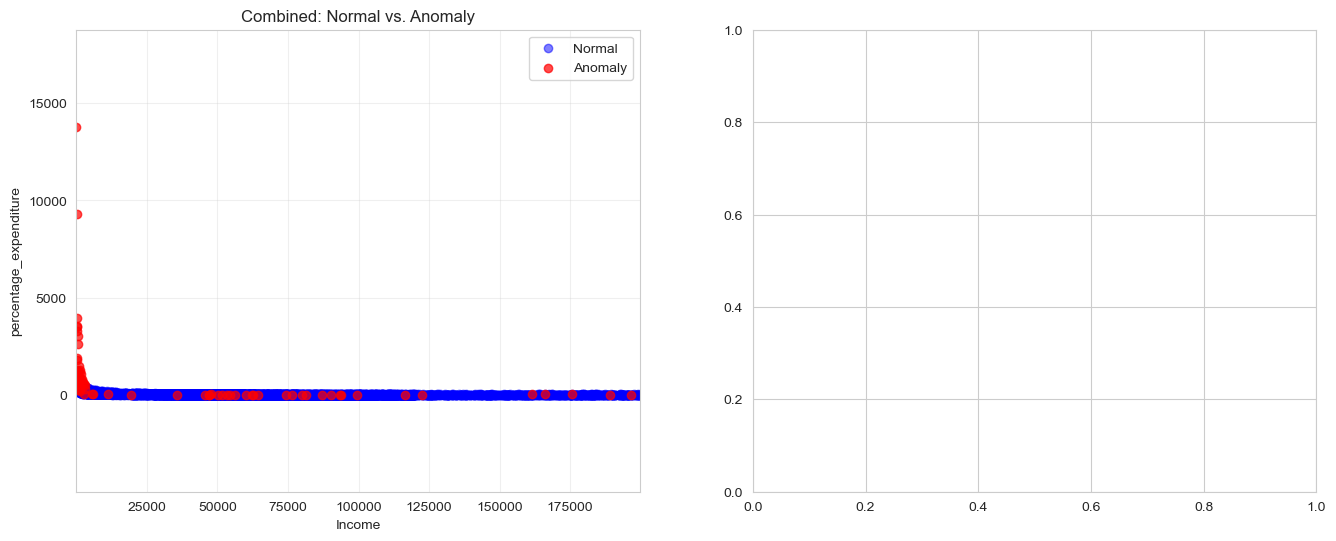

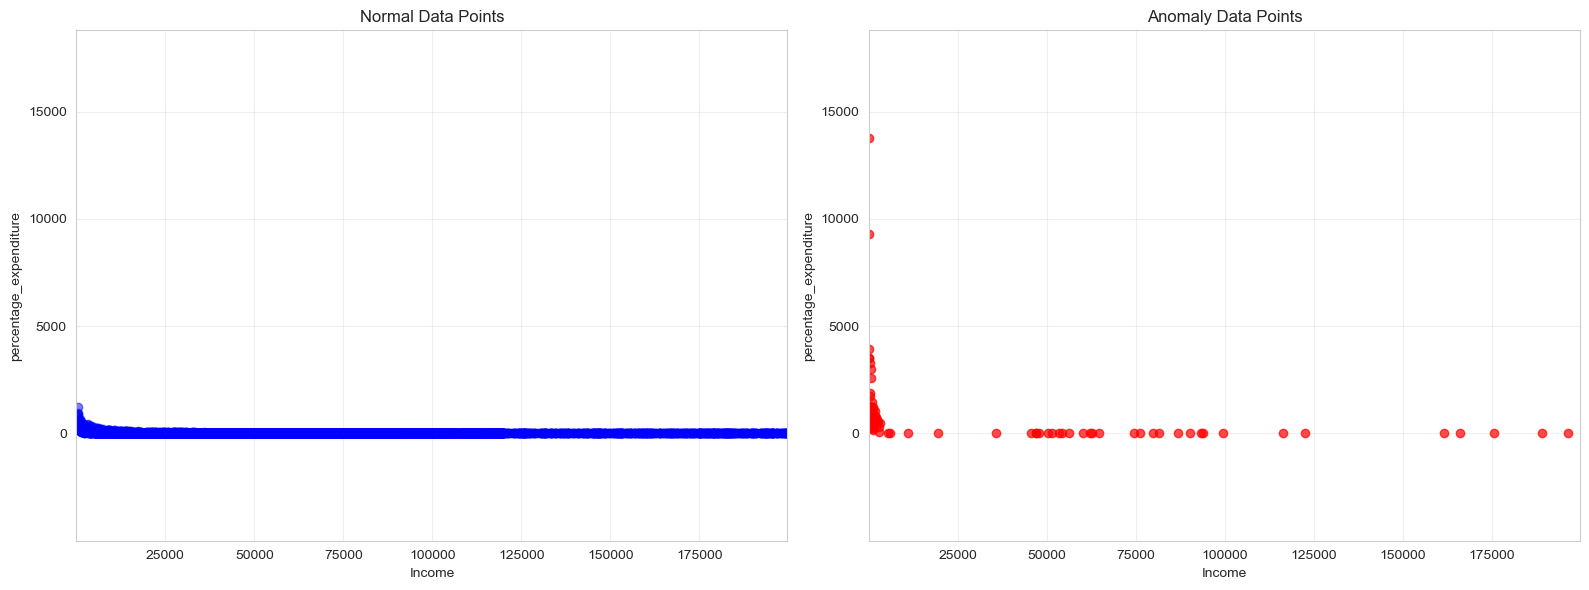

In [849]:
# Create a scatter plot with colors based on the anomaly detection
plt.figure(figsize=(10, 6))

# Convert the anomaly predictions to a more interpretable format
# In Isolation Forest, -1 indicates outliers and 1 indicates inliers
outliers = (creditcard_dataset["Anomaly"] == -1)

# Choose features to plot
feature1 = 'Income'
feature2 = 'percentage_expenditure'

# Create a figure with two subplots side by side
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

# Plot 1: Combined view (similar to your original image)
# Plot inliers in blue
ax1.scatter(
    creditcard_dataset.loc[~outliers, feature1],
    creditcard_dataset.loc[~outliers, feature2],
    c='blue', label='Normal', alpha=0.5
)
# Plot outliers in red
ax1.scatter(
    creditcard_dataset.loc[outliers, feature1],
    creditcard_dataset.loc[outliers, feature2],
    c='red', label='Anomaly', alpha=0.7
)
ax1.set_xlabel(feature1)
ax1.set_ylabel(feature2)
ax1.set_title('Combined: Normal vs. Anomaly')
ax1.legend()
ax1.grid(True, alpha=0.3)

# Create separate figure for side-by-side visualization
fig2, (ax3, ax4) = plt.subplots(1, 2, figsize=(16, 6))

# Plot 2: Only inliers (normal data)
ax3.scatter(
    creditcard_dataset.loc[~outliers, feature1],
    creditcard_dataset.loc[~outliers, feature2],
    c='blue', alpha=0.5
)
ax3.set_xlabel(feature1)
ax3.set_ylabel(feature2)
ax3.set_title('Normal Data Points')
ax3.grid(True, alpha=0.3)

# Plot 3: Only outliers (anomalies)
ax4.scatter(
    creditcard_dataset.loc[outliers, feature1],
    creditcard_dataset.loc[outliers, feature2],
    c='red', alpha=0.7
)
ax4.set_xlabel(feature1)
ax4.set_ylabel(feature2)
ax4.set_title('Anomaly Data Points')
ax4.grid(True, alpha=0.3)

# Make sure both plots use the same scale for fair comparison
x_min = creditcard_dataset[feature1].min() - 10
x_max = creditcard_dataset[feature1].max() + 10
y_min = creditcard_dataset[feature2].min() - 5000
y_max = creditcard_dataset[feature2].max() + 5000

for ax in [ax1, ax3, ax4]:
    ax.set_xlim(x_min, x_max)
    ax.set_ylim(y_min, y_max)

# Add summary statistics as text
anomaly_stats = creditcard_dataset[outliers].describe().round(2)
normal_stats = creditcard_dataset[~outliers].describe().round(2)

# Print summary statistics 
print("Inliers (Normal) Statistics:")
print(f"Count: {sum(~outliers)}")
print(f"Average Income: ${normal_stats.loc['mean', 'Income']}")
print(f"Average percentage_expenditure: {normal_stats.loc['mean', 'percentage_expenditure']:.2f}%")

print("\nOutliers (Anomaly) Statistics:")
print(f"Count: {sum(outliers)}")
print(f"Average Income: ${anomaly_stats.loc['mean', 'Income']}")
print(f"Average percentage_expenditure: {anomaly_stats.loc['mean', 'percentage_expenditure']:.2f}%")


# Show the plots
plt.tight_layout()
plt.show()